In [1]:

# import PSSE stuff
# Standard Libraries
import os
import sys
import time

import psse35

psse35.set_minor(3)
import psspy
import dyntools

psspy.psseinit(50)


_i = psspy.getdefaultint()
_f = psspy.getdefaultreal()
_s = psspy.getdefaultchar()

import matplotlib.pyplot as plt
import numpy as np
import dyntools

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.

 Could not find entry point runpy_add_to_sys_path

           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.5.2

             INITIATED ON SUN, MAY 11 2025  19

In [2]:
case_file = "../WecGrid/models/grid_models/Hawaii40_20231026.RAW"
psspy.read(1,case_file)



 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 37 records for Bus data
 Starting processing of Load data records
 Finished processing of 27 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 45 records for Generator data
 Starting processing of Branch data records
 Finished processing of 77 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 48 records for 12 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of 

0

In [3]:
psspy.fnsl()


 Ordering network...
 Diagonals = 36   Off-diagonals = 75   Maximum size = 106

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         2.7920(     35     )    0.1125(     37     )
                                                             0.00885(      2     )   0.10338(     35     )
   1         0.0198(      2     )    1.2329(      2     )
                                                             0.02179(     26     )   0.00573(      2     )
   2         0.0023(      2     )    0.0263(      2     )
                                                             0.00049(     26     )   0.00011(      2     )
   3         0.0000(      2     )    0.0000(      2     )


 Reached tolerance in 3 iterations

 Largest mismatch:     -0.00 MW      0.00 Mvar      0.00 MVA at bus 2 [ALOHA69     69.000]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    

0

In [13]:
ierr2, brnchs = psspy.abrncount()
brnchs

77

In [12]:
ierr2, brnchs = psspy.aflowcount() 
brnchs

178

In [26]:

# Machine/Generator level data
ierr1, carray = psspy.amachchar(string=["ID", "NAME"])
ierr2, machs = psspy.amachcount()
ierr3, xarray = psspy.amachcplx(string=["ZSORCE", "XTRAN","PQGEN"])
ierr4, iarray = psspy.amachint(string=["NUMBER", "STATUS"])
ierr5, rarray = psspy.amachreal(string=["PGEN", "QGEN", "MBASE", "MVA","GENTAP",'PERCENT'])


if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting machine data")
'''
    amachchar()
        id: Machine ID
        name: Machine name
    amachcount()
        return the number of machines on the grid
    amachcplx()
        zsource: Machine impedance (ZR + j ZX)
        xtran: step-up transformer impedance (RT + j XT)
        pqgen: Power output (MW and Mvar)
    amachint()
        number: Bus number
        status: machine status
    amachreal()
        pgen: Active power output, in MW
        qgen: Reactive power output, in Mvar
        mbase: Machine MVA base
        mva: abs(PGEN+jQGEN), in MVA
        gentap: Step-up transformer tap ratio
        percent: MVA loading as a percentage of machine MVA base, MBASE
'''

# Planet level and bus level data. not sure how to divide this up tbh
ierr1, carray = psspy.agenbuschar(string="NAME")
ierr2, buses = psspy.agenbuscount()
ierr, xarray = psspy.agenbuscplx(string=['VOLTAGE', 'PQGEN','MISMATCH'])
ierr3, iarray = psspy.agenbusint(string=["NUMBER", "STATUS","TYPE", ])
ierr4, rarray = psspy.agenbusreal(string=["BASE", "PU", "KV", "ANGLE", "ANGLED", "PERCENT", "MISMATCH", "PGEN", "QGEN",'IREGBASE', 'IREGPU', 'IREGKV', 'VSPU','VSKV',  'RMPCT','MVA' ])

if ierr1 or ierr2 or ierr3 or ierr4:
    print("Error in getting plant data")
    
'''
    agenbuschar()
        number: Bus name
        status: 0 = in service, 1 = out of service 
    agenbuscount() 
        return the number of plant buses, 
    agenbuscplx()
        voltage: Actual bus voltage,
        pqgen: Power output of in-service machines at this plant (returns MW and Mvar)
        mismatch: Bus mismatch (0.0 if bus type code > 3) (returns MW and Mvar)
    agenbusint()
        number: Bus number
        status: 0 = in service, 1 = out of service
        type: bus type code 
    agenbusreal()
        base: Bus base voltage in kV
        pu: Actual bus voltage magnitude, in pu
        kv: Actual bus voltage magnitude, in kV (in pu if base voltage is 0.0
        angle: Bus voltage phase angle, in radians
        angled: Bus voltage phase angle, in degrees
        percent: MVA loading as a percentage of total plant MVA base, MBASE
        mismatch: Bus mismatch (0.0 if bus type code > 3) (returns MW and Mvar)
        pgen: Active power output of in-service machines at this plant, in MW
        qgen: Reactive power output of in-service machines at this plant, in Mvar
        mva: bs(PGEN+jQGEN) of in-service machines at this plant, in MVA
        iregbase: Regulated bus base voltage, in kV
        iregpu: Actual regulated bus voltage magnitude, in pu
        iregkv: Actual regulated bus voltage magnitude, in kV (in pu if base voltage is 0.0)
        vspu: Regulated bus scheduled voltage magnitude, in pu
        vskv: Regulated bus scheduled voltage magnitude, in kV (in pu if base voltage is 0.0)
        rmpct: Percent of total Mvar to be contributed by this plant
    
'''


#Branch level data

ierr1, carray = psspy.abrnchar(string=["ID", "FROMNAME", "TONAME","BRANCHNAME"])
ierr2, brnchs = psspy.abrncount()
ierr3, xarray = psspy.abrncplx(string=["RX", "PQ", "PQLOSS","FROMSHNT", "TOSHNT"])
ierr4, iarray = psspy.abrnint(string=["FROMNUMBER", "TONUMBER", "STATUS"])
ierr5, rarray = psspy.abrnreal(string=["P", "Q", "PLOSS", "QLOSS", "MVA", "RATE", "RATEA", "AMPS", "MAXPCTRATE", "PCTCRPRATE",'PUCUR', 'PCTRATE'])

if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting branch data")
    
'''
    abrnchar()
        id:Circuit identifier 
        fromname: From bus name
        toname: To bus name
        branchname: Branch name
    abrncount()
        returns the number of branches on the grid
    abrncplx()
        rx: Branch impedance, in pu
        pq: P + j Q flow at from bus end (MW and Mvar)
        pqloss: Losses (MW and Mvar)
        fromshnt: Line shunt at from bus end, in pu
        toshnt: Line shunt at to bus end, in pu
    abrnint()
        fromnumber: From bus number
        tonumber: To bus number
        status: branch status
    abrnreal()
        p: Active power flow at from bus end, in MW
        q: Reactive power flow at from bus end, in Mvar
        ploss: Active power losses, in MW
        qloss: Reactive power losses, in Mvar
        mva: abs(P+jQ) at from bus end, in MVA
        rate: Rating from default rating set
        ratea: Rating from rating set A
        amps: Branch current, in amps (0.0 if bus base voltage is 0.0)
        maxpctrate: Larger of percent from/to bus current pf default rating set
        pctcrprate: Percent from bus current or MVA loading (according to the appropriate percent loading units program option setting) of default rating set
        pucur: Branch current, in pu
        pctrate: Percent from bus current of default rating set

'''

# branch flow data 

ierr1, carray = psspy.aflowchar(string=["ID","TONAME","FROMNAME"])
ierr2, brnchs = psspy.aflowcount()  
ierr3, xarray = psspy.aflowcplx(string=["PQ", "PQLOSS"])
ierr4, iarray = psspy.aflowint(string=["FROMNUMBER", "TONUMBER", "STATUS"])
ierr5, rarray = psspy.aflowreal(string=["P", "Q", "PLOSS", "QLOSS", "MVA", "RATE", "RATEA", "AMPS", "PCTCORPRATE","PCTRATE", 'PUCUR'])

if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting branch flow data")

'''
    aflowchar()
        id: Circuit identifier
        toname: To bus name
        fromname: From bus name
    aflowcount()
        returns the number of flows?? not sure tbh, this is more then the number of branches
    aflowcplx()
        pq: P + j Q flow at from bus end (MW and Mvar)
        pqloss: Losses (MW and Mvar)
    aflowint()
        fromnumber: From bus number
        tonumber: To bus number
        status: branch status
    aflowreal()
        p: Active power flow, in MW
        q: Reactive power flow, in Mvar
        ploss: Active power losses, in MW
        qloss: Reactive power losses, in Mvar
        mva: abs(P+jQ), in MVA
        rate: Rating from default rating set
        ratea: Rating from rating set A
        amps: Branch current, in amps (0.0 if bus base voltage is 0.0)
        pctcrprate: Percent from bus current or MVA loading (according to the appropriate percent loading units program option setting) of default rating set
        pctrate: Percent from bus current of default rating set
        pucur: Branch current, in pu

'''


# two-winding transformer data
ierr1, carray = psspy.atrnchar(string=["ID","TONAME","FROMNAME","METERNAME","XFRNAME", 'WIND1NAME','WIND2NAME' ])
ierr2, brnchs = psspy.atrncount()
ierr3, xarray = psspy.atrncplx(string=['RXACT','RXNOM', 'COMPRX', 'PQ', 'PQLOSS'])
ierr4, iarray = psspy.atrnint(string=["FROMNUMBER", "TONUMBER", "STATUS",'METERNUMBER', 'WIND1NUMBER','WIND2NUMBER'])
ierr5, rarray = psspy.atrnreal(string=["P", "Q", "PLOSS", "QLOSS", "MVA", "RATE", "RATEA", "AMPS","RATIO",'RATIO2',"ANGLE","STEP",'SBASE1', 'NOMV1','NOMV2', 'PCTCRPRATE','PUCUR', 'PCTRATE'])

if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting transformer data")
    
'''
    atrnchar()
        id: Circuit identifier
        toname: To bus name
        fromname: From bus name
        metername: Metered bus name
        xfrname: Transformer name
        wind1name: Winding 1 bus name
        wind2name: Winding 2 bus name
    atrncount()
        returns the number of 2 windings transformers on the grid
    atrncplx()
        rxact: Actual transformer impedance in pu
        rxnom: Nominal transformer impedance in pu
        comprx: Load drop compensation impedance in pu
        pq: P + j Q flow at from bus end
        pqloss: Losses (MW and Mvar)
    atrnint()
        fromnumber: From bus number
        tonumber: To bus number
        status: Transformer status
        meternumber: Metered end bus number
        wind1number: Winding 1 bus number
        wind2number: Winding 2 bus number
    atrnreal()
        p: Active power flow at from bus end, in MW
        q: Reactive power flow at from bus end, in Mvar
        ploss: Active power losses, in MW
        qloss: Reactive power losses, in Mvar
        mva: abs(P+jQ) at from bus end, in MVA
        rate: Rating from default rating set
        ratea: Rating from rating set A
        amps: Branch current, in amps (0.0 if bus base voltage is 0.0)
        ratio: Winding 1 tap ratio in pu
        ratio2: Winding 2 tap ratio in pu
        angle: Winding 1 phase shift angle in degrees
        step: Winding 1 ratio or angle step width (in pu if ratio)
        sbase1: Winding 1 base MVA
        nomv1: Winding 1 nominal voltage in kv (0.0 for bus base voltage)
        nomv2: Winding 2 nominal voltage in kv (0.0 for bus base voltage)
        pctcrprate: Percent from bus current or MVA loading (according to the appropriate percent loading units program option setting) of default rating set
        pucur: Branch current, in pu
        pctrate: Percent from bus current of default rating set
        
'''


# three-winding transformer data

ierr1, carray = psspy.atr3char(string=["ID",'WIND1NAME','WIND2NAME', 'NMETERNAME','XFRNAME' ])
ierr2, brnchs = psspy.atr3count()
ierr3, xarray = psspy.atr3cplx(string=['RX1-2ACT','RX1-2NOM','RX2-3ACT','RX2-3NOM', 'RX3-1ACT','RX3-1NOM', 'PQLOSS'])
ierr4, iarray = psspy.atr3int(string=['WIND1NUMBER','WIND2NUMBER', 'WIND3NUMBER','STATUS','NMETERNUMBER'])
ierr5, rarray = psspy.atr3real(string=["PLOSS", "QLOSS", 'ANSTAR','VMSTAR'  ])


if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting 3 transformer data")

'''
    atr3char()
        id: Circuit identifier
        wind1name: Winding 1 bus name
        wind2name: Winding 2 bus name
        nmetername: Metered bus name
        xfrname: Transformer name
    atr3count()
        returns the number of 3 windings transformers on the grid
    atr3cplx()
        rx1-2act: Actual measured impedance between the winding 1 and winding 2 buses in pu
        rx1-2nom: Nominal measured impedance between the winding 1 and winding 2 buses in pu
        rx2-3act: Actual measured impedance between the winding 2 and winding 3 buses in pu
        rx2-3nom: Nominal measured impedance between the winding 2 and winding 3 buses in pu
        rx3-1act: Actual measured impedance between the winding 3 and winding 1 buses in pu
        rx3-1nom: Nominal measured impedance between the winding 3 and winding 1 buses in pu
        pqloss: Losses (MW and Mvar)
    atr3int()
        wind1number: Winding 1 bus number
        wind2number: Winding 2 bus number
        wind3number: Winding 3 bus number
        status: Transformer status
        nmeternumber: Metered end bus number
    atr3real()
        ploss: Active power losses, in MW
        qloss: Reactive power losses, in Mvar
        anstar: Bus voltage phase angle at the star point bus,in degrees
        vmstar: Actual bus voltage magnitude at the star point bus, in pu

'''

# bus level data

ierr1, carray = psspy.abuschar(string=["NAME"])
ierr2, buses = psspy.abuscount()
ierr3, xarray = psspy.abuscplx(string=['VOLTAGE', 'SHUNTACT', 'SHUNTNOM', 'MISMATCH'])
ierr4, iarray = psspy.abusint(string=['NUMBER', 'TYPE'])
ierr5, rarray = psspy.abusreal(string=['BASE','PU','KV','ANGLE','ANGLED','MISMATCH'])

if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting bus data")
    

'''
    abuschar()
        name: Bus name
    abuscount()
        returns the number of buses on the grid
    abuscplx()
        voltage: Actual bus voltage, in pu
        shuntact: Actual total in-service fixed bus shunt, in MW and Mvar
        shuntnom: Nominal total in-service fixed bus shunt, in MW and Mvar at 1.0 pu voltage
        shuntn: Total in-service negative sequence load (pu nominal)
        mismatch: Bus mismatch, in MW and Mvar (0.0 if bus type code > 3)
    abusint()
        number: Bus number
        type: Bus type code
    abusreal()
        base: Bus base voltage in kV
        pu: Actual bus voltage magnitude, in pu
        kv: Actual bus voltage magnitude, in kV (in pu if base voltage is 0.0)
        angle: Bus voltage phase angle, in radians
        angled: Bus voltage phase angle, in degrees
        mismatch: Bus mismatch (0.0 if bus type code > 3) (returns MW and Mvar)

'''


# load level data
ierr1, carray = psspy.aloadchar(string=["NAME", "ID"])
ierr2, loads = psspy.aloadcount()
ierr3, xarray = psspy.aloadcplx(string=['MVAACT','MVANOM','ILACT', 'ILNOM', 'TOTALACT', 'TOTALNOM', 'LDGNACT','LDGNNOM' ])
ierr4, iarray = psspy.aloadint(string=['NUMBER', 'STATUS'])
ierr5, rarray = psspy.aloadreal(string=['MVAACT','MVANOM','ILACT', 'ILNOM', 'TOTALACT', 'TOTALNOM', 'LDGNACT','LDGNNOM' ])

if ierr1 or ierr2 or ierr3 or ierr4 or ierr5:
    print("Error in getting load data")
    
    
'''
    aloadchar()
        name: bus name 
        id: Load ID 
    aloadcount()
        returns the number of loads on the grid
    aloadcplx()
        mvact: Actual load MVA, in MW and Mvar
        mvanom: Nominal in-service constant MVA load at 1.0 pu voltage (in MW and Mvar)
        ilact: Actual in-service constant current load (in MW and Mvar)
        ilnom: Nominal in-service constant current load at 1.0 pu voltage (in MW and Mvar)
        totalact: Actual in-service load (in MW and Mvar)
        totalnom: Nominal in-service load at 1.0 pu voltage (in MW and Mvar)
        ldgact: Actual in-service distributed generation
        ldgnom: Nominal in-service distributed generation
    aloadint()
        number: Bus number
        status: Load status
    aloadreal()
        mvact: Actual in-service constant MVA load, in MVA
        mvanom: Nominal in-service constant MVA load at 1.0 pu voltage (in MW and Mvar)
        ilact: Actual in-service constant current load (in MW and Mvar)
        ilnom: Nominal in-service constant current load at 1.0 pu voltage (in MW and Mvar)
        totalact: Actual in-service load (in MW and Mvar)
        totalnom: Nominal in-service load at 1.0 pu voltage (in MW and Mvar)
        ldgact: Actual in-service distributed generation
        ldgnom: Nominal in-service distributed generation
'''

'\n    aloadchar()\n        name: bus name \n        id: Load ID \n    aloadcount()\n        returns the number of loads on the grid\n    aloadcplx()\n        mvact: Actual load MVA, in MW and Mvar\n        mvanom: Nominal in-service constant MVA load at 1.0 pu voltage (in MW and Mvar)\n        ilact: Actual in-service constant current load (in MW and Mvar)\n        ilnom: Nominal in-service constant current load at 1.0 pu voltage (in MW and Mvar)\n        totalact: Actual in-service load (in MW and Mvar)\n        totalnom: Nominal in-service load at 1.0 pu voltage (in MW and Mvar)\n        ldgact: Actual in-service distributed generation\n        ldgnom: Nominal in-service distributed generation\n    aloadint()\n        number: Bus number\n        status: Load status\n    aloadreal()\n        mvact: Actual in-service constant MVA load, in MVA\n        mvanom: Nominal in-service constant MVA load at 1.0 pu voltage (in MW and Mvar)\n        ilact: Actual in-service constant current load

In [25]:
if ierr1:
    print(f"Error 1: {ierr1}")
if ierr2:
    print(f"Error 2: {ierr2}")
if ierr3:
    print(f"Error 3: {ierr3}")
if ierr4:
    print(f"Error 4: {ierr4}")
if ierr5:
    print(f"Error 5: {ierr5}")

In [ ]:
'''

[] snapshot_TwoWinding()
[] snapshot_ThreeWinding()
[] snapshot_Branch() # branch and branch flow data 
[] snapshot_plant()
[] snapshot_Gen() # only machine data
[] snapshot_Bus() 
[] snapshot_Load()


'''

'\n\n[] snapshot_TwoWinding()\n[] snapshot_ThreeWinding()\n[] snapshot_Branch() # branch and branch flow data \n[] snapshot_Gen() # only machine data\n[] snapshot_Bus() \n\n\n'

In [16]:
ierr1, carray = psspy.atrnchar(string=["ID", "TONAME", "FROMNAME", "METERNAME", "XFRNAME", "WIND1NAME", "WIND2NAME"])
ids, tonames, fromnames, meternames, xfrnames, wind1names, wind2names = carray


In [20]:
xfrnames

['                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ',
 '                                        ']

In [ ]:
# --- Integer, Character, and Real values
# Machine data
ierr, iarray = psspy.amachint(string=["NUMBER", "STATUS"])
ierr, carray = psspy.amachchar(string=["ID", "NAME"])
ierr, rarray = psspy.amachreal(string=["PGEN", "QGEN", "MBASE", "MVA"])

# plant data? hows that different from the above?
ierr, mismatch = psspy.agenbusreal(string=["BASE", "PU", "KV", "ANGLE", "ANGLED", "PERCENT"],)
ierr, percent =  psspy.agenbusreal(-1, 1, "PERCENT")

# --- Unpack
bus_ids, status = iarray[0], iarray[1]
gen_ids, names = carray[0], carray[1]
pgen, qgen, mbase = rarray[0], rarray[1], rarray[2]


In [49]:
psspy.amachreal(string=["PGEN"])

(0,
 [[2.5,
   2.5,
   2.5,
   2.5,
   143.11085510253906,
   80.83619689941406,
   143.11085510253906,
   98.41027069091797,
   97.32157897949219,
   91.9979248046875,
   91.9979248046875,
   90.09940338134766,
   89.2193603515625,
   25.889068603515625,
   20.0,
   10.199999809265137,
   30.000001907348633,
   27.599998474121094,
   46.29999923706055,
   69.0]])

In [46]:
 psspy.agenbusreal(string=["PGEN"])

(0,
 [[10.0,
   951.9935302734375,
   30.19999885559082,
   57.599998474121094,
   115.30000305175781]])

In [ ]:
ierr, iarray = psspy.abrnint(string=["FROMNUMBER","TONUMBER", "STATUS"])
ibus, jbus, status = iarray[0], iarray[1], iarray[2]


ierr, rarray = psspy.abrnreal(string=["P","Q","PLOSS","QLOSS","MVA","RATE","RATEA", "AMPS", "MAXPCTRATE", "PCTCRPRATE"])
p, q, ploss, qloss, mva, rate, ratea, amps, maxpctrate, pctcrprate = rarray[0], rarray[1], rarray[2], rarray[3], rarray[4], rarray[5], rarray[6], rarray[7], rarray[8], rarray[9]



In [ ]:
ierr, carray = psspy.abrnchar(string=["BRANCHNAME"])
br_name = carray[0]

count = 0
for name in br_name:
    if name.strip() == "":
        br_name[count] = "L" + str(count)
    else:
        br_name[count] = name.strip()

['L1',
 'L2',
 'L3',
 'L4',
 'L5',
 'L6',
 'L7',
 'L8',
 'L9',
 'L10',
 'L11',
 'L12',
 'L13',
 'L14',
 'L15',
 'L16',
 'L17',
 'L18',
 'L19',
 'L20',
 'L21',
 'L22',
 'L23',
 'L24',
 'L25',
 'L26',
 'L27',
 'L28',
 'L29',
 'L30',
 'L31',
 'L32',
 'L33',
 'L34',
 'L35',
 'L36',
 'L37',
 'L38',
 'L39',
 'L40',
 'L41',
 'L42',
 'L43',
 'L44',
 'L45',
 'L46',
 'L47',
 'L48',
 'L49',
 'L50',
 'L51',
 'L52',
 'L53',
 'L54',
 'L55',
 'L56',
 'L57',
 'L58',
 'L59',
 'L60',
 'L61',
 'L62',
 'L63',
 'L64',
 'L65',
 'L66',
 'L67',
 'L68',
 'L69',
 'L70',
 'L71',
 'L72',
 'L73',
 'L74',
 'L75',
 'L76',
 'L77']

In [11]:
 psspy.abrnint(string=["TONUMBER"])

(0,
 [[5,
   5,
   22,
   25,
   25,
   35,
   35,
   4,
   6,
   6,
   7,
   21,
   23,
   23,
   23,
   26,
   26,
   6,
   6,
   16,
   19,
   19,
   19,
   21,
   13,
   9,
   14,
   7,
   7,
   7,
   11,
   12,
   12,
   10,
   13,
   13,
   13,
   15,
   19,
   19,
   14,
   13,
   15,
   15,
   17,
   16,
   18,
   18,
   23,
   23,
   23,
   23,
   23,
   30,
   32,
   25,
   37,
   34,
   34,
   26,
   26,
   33,
   36,
   35,
   35,
   37,
   37,
   29,
   30,
   30,
   31,
   30,
   32,
   33,
   34,
   34,
   37]])

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:223: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


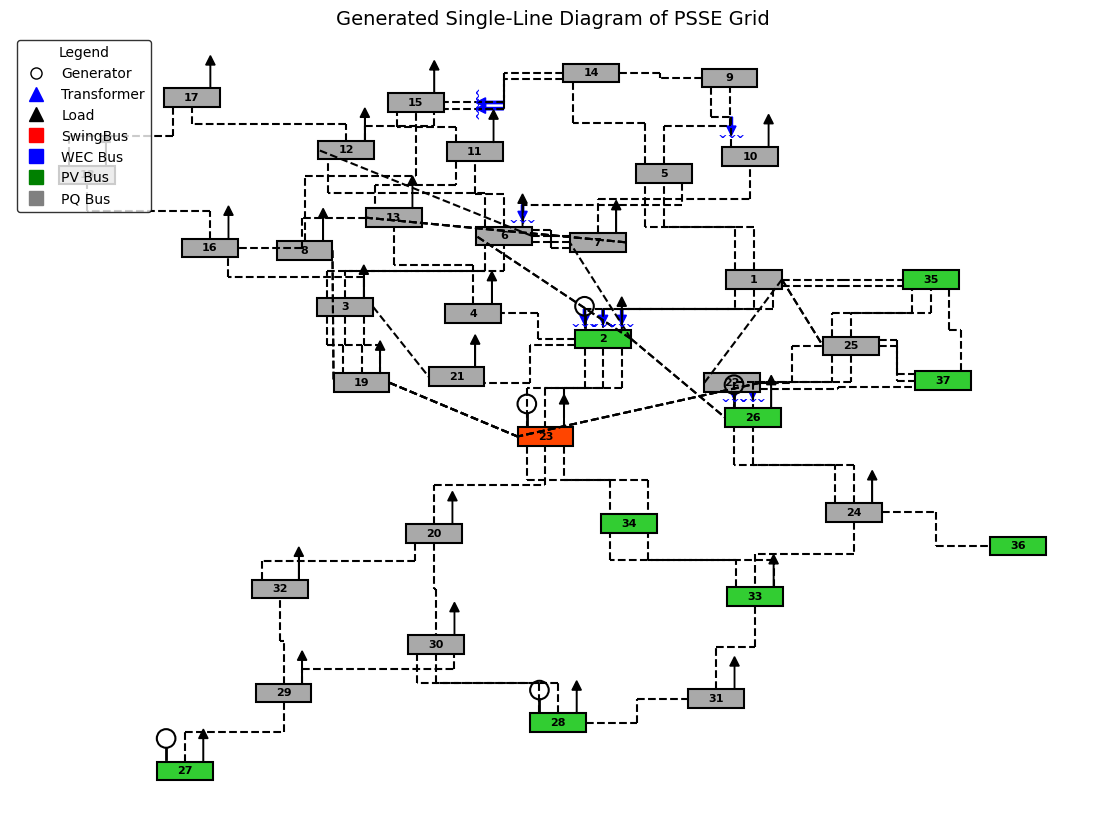

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow
from matplotlib.lines import Line2D



def draw_transformer_arrow(ax, path):
    """
    Draws an arrow along the transformer connection path.
    The arrow direction follows the second movement segment.
    Adds "^^^" symbol above the arrow at the arrow tip.
    """
    if len(path) < 4:
        return  # Not enough points to draw an arrow

    # Select second segment for placing the arrow
    x1, y1 = path[2]
    x2, y2 = path[3]

    dx = (x2 - x1) * 0.3  # Scale down arrow length
    dy = (y2 - y1) * 0.3

    # **Compute arrow tip**
    arrow_tip_x = x1 + dx
    arrow_tip_y = y1 + dy

    # **Draw arrow**
    ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

    # **Place "^^^" symbol at arrow tip**
    if dy == 0:  # Horizontal transformer
        ax.text(arrow_tip_x - 0.01, arrow_tip_y + 0.008, "^^^", fontsize=8, fontweight="bold", ha='center', va='center',rotation=90, color='blue')
    else:  # Vertical transformer
        ax.text(arrow_tip_x - 0.005, arrow_tip_y - 0.01, "^^^", fontsize=8, fontweight="bold", ha='center', va='center', rotation=180, color='blue')
        


def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections):
    """
    Determines the best connection points for a given bus pair while avoiding overlapping connections.
    - Uses x and y positions to determine if the connection is horizontal (left/right) or vertical (top/bottom).
    - Selects an available connection within that side (inner, middle, outer) to reduce overlap.
    """

    y_tuner = 0.1  # Controls how strict we are about vertical vs. horizontal
    x_tuner = 0.48  # Controls how strict we are about left/right priority

    x1, y1 = from_pos
    x2, y2 = to_pos

    # --- Step 1: Determine primary connection direction ---
    if abs(x1 - x2) > abs(y1 - y2):  
        primary_connection = "horizontal"  # Mostly horizontal movement
    else:  
        primary_connection = "vertical"  # Mostly vertical movement

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:
        primary_connection = "vertical"

    # --- Step 2: Determine connection points ---
    if primary_connection == "horizontal":
        if x1 < x2:  # Moving left → right
            from_side = "right"
            to_side = "left"
        else:  # Moving right → left
            from_side = "left"
            to_side = "right"
    else:  # Vertical Connection
        if y1 > y2:  # Moving top → bottom
            from_side = "bottom"
            to_side = "top"
        else:  # Moving bottom → top
            from_side = "top"
            to_side = "bottom"

    # **Select the best available connection point within the side**
    for priority in ["middle", "inner", "outer"]:  # Prioritize middle, then fallback
        from_point_key = f"{from_side}_{priority}"
        to_point_key = f"{to_side}_{priority}"

        if from_point_key not in used_connections[from_bus] and to_point_key not in used_connections[to_bus]:
            used_connections[from_bus].add(from_point_key)
            used_connections[to_bus].add(to_point_key)
            return bus_connections[from_bus][from_point_key], bus_connections[to_bus][to_point_key], f"{from_side}-{to_side}"

    # Fallback (shouldn't reach here unless something is wrong)
    return bus_connections[from_bus]["right_middle"], bus_connections[to_bus]["left_middle"], "fallback"




def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)

def get_bus_color(bus_type):
    """ Returns the color for a given bus type. """
    color_map = {
        1: "#A9A9A9",  # Gray
        2: "#32CD32",  # Green
        3: "#FF4500",  # Red
        4: "#1E90FF",  # Blue
    }
    return color_map.get(bus_type, "#D3D3D3")  # Default light gray if undefined

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    Includes:
    - Loads (downward arrows)
    - Generators (circles above bus)
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

       # Store predefined connection points for each bus
    bus_connections = {}
    used_connections = {bus: set() for bus in bus_numbers[0]}  # Track used connections
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            # Left side (3 points)
            "left_inner": (x - node_width / 2, y - node_height / 3),
            "left_middle": (x - node_width / 2, y),
            "left_outer": (x - node_width / 2, y + node_height / 3),

            # Right side (3 points)
            "right_inner": (x + node_width / 2, y - node_height / 3),
            "right_middle": (x + node_width / 2, y),
            "right_outer": (x + node_width / 2, y + node_height / 3),

            # Top side (3 points)
            "top_inner": (x - node_width / 3, y + node_height / 2),
            "top_middle": (x, y + node_height / 2),
            "top_outer": (x + node_width / 3, y + node_height / 2),

            # Bottom side (3 points)
            "bottom_inner": (x - node_width / 3, y - node_height / 2),
            "bottom_middle": (x, y - node_height / 2),
            "bottom_outer": (x + node_width / 3, y - node_height / 2),
        }

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")
        
        if (from_bus, to_bus) in xfmr_pairs or (to_bus, from_bus) in xfmr_pairs:
            draw_transformer_arrow(ax, path)  # Attach arrow to 2nd segment of the path
            #draw_transformer_marker(ax, path)  # Attach diamond marker to midpoint of the path

            
    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_color = get_bus_color(bus_types[0][bus_numbers[0].index(bus)])
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor=bus_color)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

        # Draw loads (right-offset downward arrows)
        if bus in load_buses:
            ax.arrow(x + node_width / 2 - 0.02, y + 0.02, 0, 0.05, head_width=0.02, head_length=0.02, fc='black', ec='black')

        # Draw generators (left-offset circles above bus)
        if bus in gen_buses:
            gen_x = x - node_width / 2 + 0.02  # Move generator left
            gen_y = y + node_height / 2 + 0.05
            gen_size = 0.02
            ax.plot([gen_x, gen_x], [y + node_height / 2 + 0.005, gen_y - gen_size ], color='black', lw=2)
            ax.add_patch(Circle((gen_x, gen_y), gen_size, color='none', ec='black', lw=1.5))
    
   


    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Generated Single-Line Diagram of PSSE Grid", fontsize=14)
    # Define legend elements
    legend_elements = [
        Line2D([0], [0], marker='o', color='black', markersize=8, label="Generator", markerfacecolor='none', markeredgecolor='black', lw=0),
        Line2D([0], [0], marker=('^'), color='blue', markersize=10, label="Transformer", markerfacecolor='blue', lw=0),
        Line2D([0], [0], marker='^', color='black', markersize=10, label="Load", markerfacecolor='black', lw=0),
        Line2D([0], [0], marker='s', color='red', markersize=10, label="SwingBus", markerfacecolor='red', lw=0),
        Line2D([0], [0], marker='s', color='blue', markersize=10, label="WEC Bus", markerfacecolor='blue', lw=0),
        Line2D([0], [0], marker='s', color='green', markersize=10, label="PV Bus", markerfacecolor='green', lw=0),
        Line2D([0], [0], marker='s', color='gray', markersize=10, label="PQ Bus", markerfacecolor='gray', lw=0),
    ]

    # Add the legend at the bottom-right
    ax.legend(handles=legend_elements, loc="upper left", fontsize=10, frameon=True, edgecolor='black', title="Legend")
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:325: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


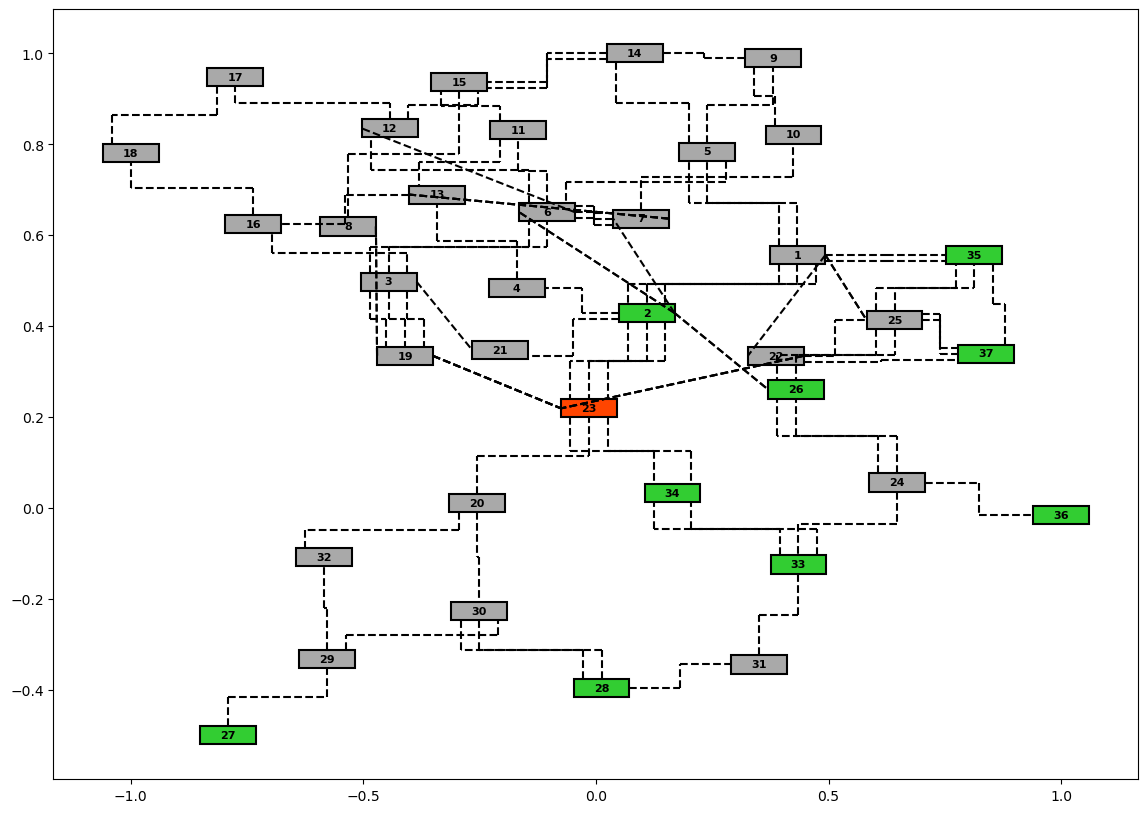

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow
from matplotlib.lines import Line2D



def draw_transformer_arrow(ax, path):
    """
    Draws an arrow along the transformer connection path.
    The arrow direction follows the second movement segment.
    Adds "^^^" symbol above the arrow at the arrow tip.
    """
    if len(path) < 4:
        return  # Not enough points to draw an arrow

    # Select second segment for placing the arrow
    x1, y1 = path[2]
    x2, y2 = path[3]

    dx = (x2 - x1) * 0.3  # Scale down arrow length
    dy = (y2 - y1) * 0.3

    # **Compute arrow tip**
    arrow_tip_x = x1 + dx
    arrow_tip_y = y1 + dy

    # **Draw arrow**
    ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

    # **Place "^^^" symbol at arrow tip**
    if dy == 0:  # Horizontal transformer
        ax.text(arrow_tip_x - 0.01, arrow_tip_y + 0.008, "^^^", fontsize=8, fontweight="bold", ha='center', va='center',rotation=90, color='blue')
    else:  # Vertical transformer
        ax.text(arrow_tip_x - 0.005, arrow_tip_y - 0.01, "^^^", fontsize=8, fontweight="bold", ha='center', va='center', rotation=180, color='blue')
        


def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections):
    """
    Determines the best connection points for a given bus pair while avoiding overlapping connections.
    - Uses x and y positions to determine if the connection is horizontal (left/right) or vertical (top/bottom).
    - Selects an available connection within that side (inner, middle, outer) to reduce overlap.
    """

    y_tuner = 0.1  # Controls how strict we are about vertical vs. horizontal
    x_tuner = 0.48  # Controls how strict we are about left/right priority

    x1, y1 = from_pos
    x2, y2 = to_pos

    # --- Step 1: Determine primary connection direction ---
    if abs(x1 - x2) > abs(y1 - y2):  
        primary_connection = "horizontal"  # Mostly horizontal movement
    else:  
        primary_connection = "vertical"  # Mostly vertical movement

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:
        primary_connection = "vertical"

    # --- Step 2: Determine connection points ---
    if primary_connection == "horizontal":
        if x1 < x2:  # Moving left → right
            from_side = "right"
            to_side = "left"
        else:  # Moving right → left
            from_side = "left"
            to_side = "right"
    else:  # Vertical Connection
        if y1 > y2:  # Moving top → bottom
            from_side = "bottom"
            to_side = "top"
        else:  # Moving bottom → top
            from_side = "top"
            to_side = "bottom"

    # **Select the best available connection point within the side**
    for priority in ["middle", "inner", "outer"]:  # Prioritize middle, then fallback
        from_point_key = f"{from_side}_{priority}"
        to_point_key = f"{to_side}_{priority}"

        if from_point_key not in used_connections[from_bus] and to_point_key not in used_connections[to_bus]:
            used_connections[from_bus].add(from_point_key)
            used_connections[to_bus].add(to_point_key)
            return bus_connections[from_bus][from_point_key], bus_connections[to_bus][to_point_key], f"{from_side}-{to_side}"

    # Fallback (shouldn't reach here unless something is wrong)
    return bus_connections[from_bus]["right_middle"], bus_connections[to_bus]["left_middle"], "fallback"


def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)

def get_bus_color(bus_type):
    """ Returns the color for a given bus type. """
    color_map = {
        1: "#A9A9A9",  # Gray
        2: "#32CD32",  # Green
        3: "#FF4500",  # Red
        4: "#1E90FF",  # Blue
    }
    return color_map.get(bus_type, "#D3D3D3")  # Default light gray if undefined

def hierarchical_layout(G):
    """
    Computes a hierarchical layout:
    - Uses topological sorting to order buses in layers.
    - Evenly spaces nodes horizontally in each layer.
    - Ensures better separation between nodes to prevent overlap.
    """
    try:
        levels = {node: i for i, node in enumerate(nx.topological_sort(G))}
    except nx.NetworkXUnfeasible:
        print("Graph contains cycles! Using spring layout instead.")
        return nx.kamada_kawai_layout(G)  # Fallback for cyclic graphs

    # Group nodes by levels
    level_dict = {}
    for node, level in levels.items():
        level_dict.setdefault(level, []).append(node)

    # Assign positions
    pos = {}
    layer_spacing = 1.0  # Vertical gap between layers
    node_spacing = 1.0   # More horizontal spacing

    max_layer_size = max(len(nodes) for nodes in level_dict.values())  # Find the widest layer

    for layer, nodes in level_dict.items():
        num_nodes = len(nodes)
        if num_nodes == 1:
            x_positions = [0]  # Keep single nodes centered
        else:
            x_positions = np.linspace(-max_layer_size * node_spacing / 2, max_layer_size * node_spacing / 2, num_nodes)

        for i, node in enumerate(nodes):
            pos[node] = (x_positions[i], -layer * layer_spacing)  # Assign positions

    return pos

def spread_nodes_with_force_directed(G, pos):
    """
    Uses a force-directed algorithm to adjust node positions,
    ensuring better spacing while keeping the general structure.
    """
    force_pos = nx.spring_layout(G, pos=pos, fixed=pos.keys(), k=0.5, iterations=50)  # Increased k for more spacing
    return force_pos


def detect_crossings(edges, positions):
    """
    Detects line crossings by checking if two edges intersect.
    Returns a set of bus pairs that contribute to crossings.
    """
    crossings = set()
    edge_lines = []

    for (u, v) in edges:
        x1, y1 = positions[u]
        x2, y2 = positions[v]
        edge_lines.append(((x1, y1), (x2, y2), u, v))

    for i in range(len(edge_lines)):
        for j in range(i + 1, len(edge_lines)):
            (p1, p2, bus1a, bus1b) = edge_lines[i]
            (q1, q2, bus2a, bus2b) = edge_lines[j]

            if check_intersection(p1, p2, q1, q2):
                crossings.add((bus1a, bus1b))
                crossings.add((bus2a, bus2b))

    return crossings

def adjust_positions(G, pos, iterations=10, step_size=0.05):
    """
    Iteratively adjusts bus positions to minimize edge crossings.
    """
    for _ in range(iterations):
        crossings = detect_crossings(G.edges(), pos)
        if not crossings:
            break  # Stop if no crossings remain

        for bus1, bus2 in crossings:
            x1, y1 = pos[bus1]
            x2, y2 = pos[bus2]

            # Move buses slightly apart
            dx, dy = x2 - x1, y2 - y1
            distance = np.sqrt(dx**2 + dy**2) + 1e-9  # Prevent divide-by-zero
            shift_x = step_size * dx / distance
            shift_y = step_size * dy / distance

            pos[bus1] = (x1 - shift_x, y1 - shift_y)
            pos[bus2] = (x2 + shift_x, y2 + shift_y)

    return pos

def check_intersection(p1, p2, q1, q2):
    """
    Check if two line segments intersect using determinant method.
    """
    def ccw(a, b, c):
        return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])

    return ccw(p1, q1, q2) != ccw(p2, q1, q2) and ccw(p1, p2, q1) != ccw(p1, p2, q2)

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    Includes:
    - Loads (downward arrows)
    - Generators (circles above bus)
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    used_connections = {bus: set() for bus in bus_numbers[0]}  # Track used connections
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            # Left side (3 points)
            "left_inner": (x - node_width / 2, y - node_height / 3),
            "left_middle": (x - node_width / 2, y),
            "left_outer": (x - node_width / 2, y + node_height / 3),

            # Right side (3 points)
            "right_inner": (x + node_width / 2, y - node_height / 3),
            "right_middle": (x + node_width / 2, y),
            "right_outer": (x + node_width / 2, y + node_height / 3),

            # Top side (3 points)
            "top_inner": (x - node_width / 3, y + node_height / 2),
            "top_middle": (x, y + node_height / 2),
            "top_outer": (x + node_width / 3, y + node_height / 2),

            # Bottom side (3 points)
            "bottom_inner": (x - node_width / 3, y - node_height / 2),
            "bottom_middle": (x, y - node_height / 2),
            "bottom_outer": (x + node_width / 3, y - node_height / 2),
        }

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_color = get_bus_color(bus_types[0][bus_numbers[0].index(bus)])
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor=bus_color)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:195: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


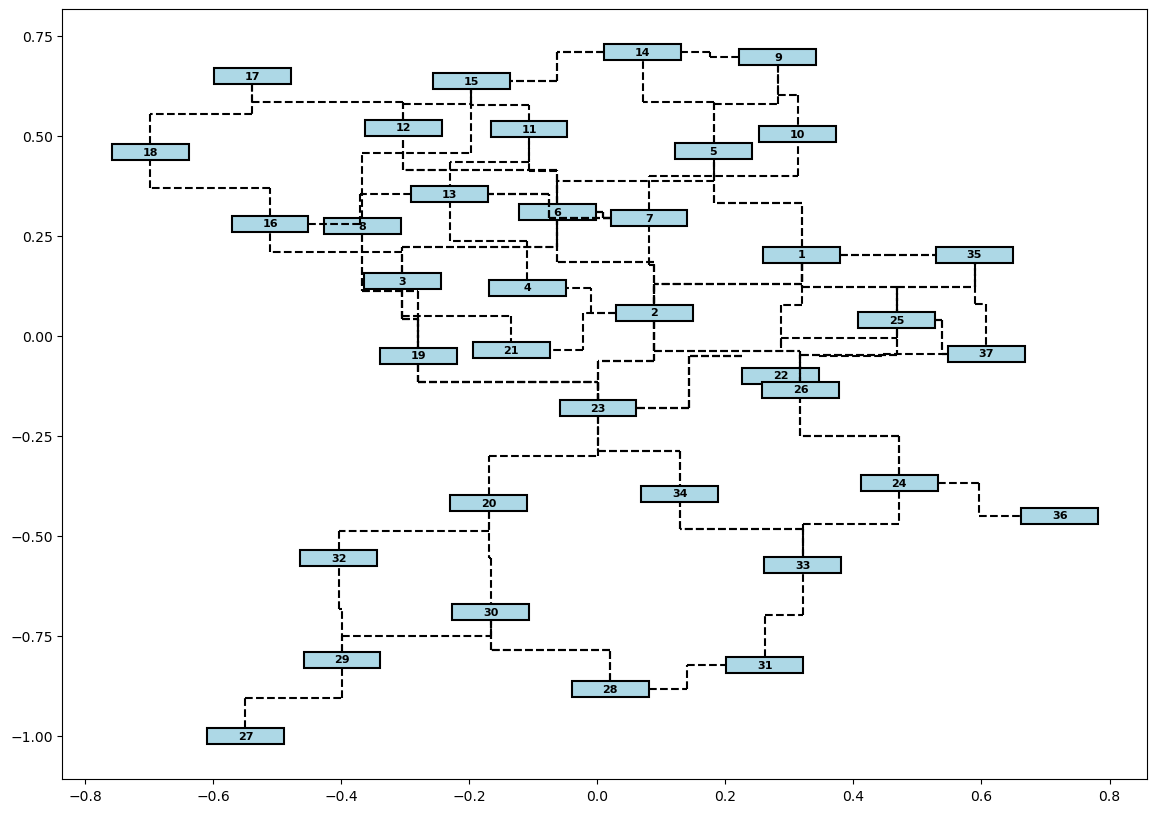

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle


def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points based on relative positions.
    Uses a two-step process:
    1) Determines general direction (horizontal vs. vertical)
    2) Chooses the best connection sides with tuners for fine adjustments.
    """

    # smaller value More strict: Only allows left/right if very close in y
    y_tuner = 0.1  # Helps decide when to use left/right over top/bottom
    
    # larger value More flexible: Allows bottom/left when x is small
    x_tuner = 0.3  # Helps decide when to use top/bottom over left/right

    x1, y1 = from_pos
    x2, y2 = to_pos

    # Determine general movement direction
    if abs(x1 - x2) > abs(y1 - y2):  # Mostly horizontal
        primary_connection = "horizontal"
    else:  # Mostly vertical
        primary_connection = "vertical"

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:  
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:  
        primary_connection = "vertical"

    # Assign correct connection points
    if primary_connection == "horizontal":
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"
    else:  # primary_connection == "vertical"
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side], f"{from_side}-{to_side}"


def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)

def count_path_crossings(paths):
    """
    Counts the number of intersections between routed paths.
    """
    crossing_count = 0
    for (path1, path2) in combinations(paths, 2):
        for i in range(len(path1) - 1):
            for j in range(len(path2) - 1):
                (x1, y1), (x2, y2) = path1[i], path1[i + 1]
                (x3, y3), (x4, y4) = path2[j], path2[j + 1]

                denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
                if denom == 0:
                    continue  # Parallel lines don't cross

                t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
                u = ((x1 - x3) * (y1 - y2) - (y1 - y3) * (x1 - x2)) / denom

                if 0 < t < 1 and 0 < u < 1:
                    crossing_count += 1

    return crossing_count

def adjust_bus_positions(G, pos, bus_connections, iterations=10, step=0.05):
    """
    Iteratively moves buses to reduce the number of crossings in the routed paths.
    """
    for _ in range(iterations):
        best_pos = pos.copy()
        best_crossings = float('inf')

        paths = []
        for from_bus, to_bus in G.edges():
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], bus_connections)
            paths.append(route_line(p1, p2, ctype))

        current_crossings = count_path_crossings(paths)

        for node in G.nodes:
            original_pos = pos[node]

            # Try small movements in four directions
            for dx, dy in [(step, 0), (-step, 0), (0, step), (0, -step)]:
                pos[node] = (original_pos[0] + dx, original_pos[1] + dy)

                paths = []
                for from_bus, to_bus in G.edges():
                    p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], bus_connections)
                    paths.append(route_line(p1, p2, ctype))

                new_crossings = count_path_crossings(paths)

                if new_crossings < best_crossings:
                    best_crossings = new_crossings
                    best_pos = pos.copy()

            pos[node] = original_pos  # Reset to original

        if best_crossings >= current_crossings:
            break  # Stop if no improvement

        pos = best_pos  # Update positions after trying all nodes

    return pos

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
        # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # # Normalize positions for even spacing
    # pos_values = np.array(list(pos.values()))
    # x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    # x_min, x_max = np.min(x_vals), np.max(x_vals)
    # y_min, y_max = np.min(y_vals), np.max(y_vals)
    # for node in pos:
    #     pos[node] = (
    #         2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
    #         1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
    #     )
    node_width, node_height = 0.12, 0.04
    bus_connections = {bus: {
        "top": (pos[bus][0], pos[bus][1] + node_height / 2),
        "bottom": (pos[bus][0], pos[bus][1] - node_height / 2),
        "left": (pos[bus][0] - node_width / 2, pos[bus][1]),
        "right": (pos[bus][0] + node_width / 2, pos[bus][1])
    } for bus in bus_numbers[0]}
    pos = adjust_bus_positions(G, pos, bus_connections, iterations=15, step=0.05)

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))

    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height, linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    for from_bus, to_bus in zip(from_buses, to_buses):
        p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], bus_connections)
        path = route_line(p1, p2, ctype)
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

    plt.show()

viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:138: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


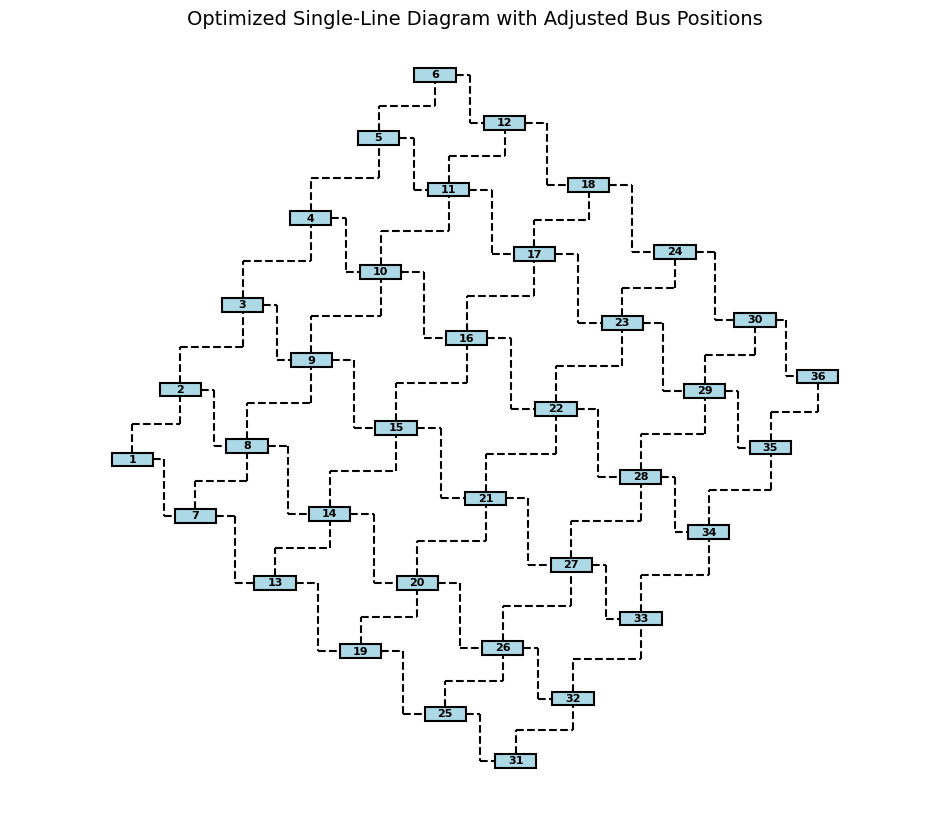

In [43]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle
from itertools import combinations

def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points based on relative positions.
    """
    x1, y1 = from_pos
    x2, y2 = to_pos

    if abs(x1 - x2) > abs(y1 - y2):  # Mostly horizontal
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"
    else:  # Mostly vertical
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side], f"{from_side}-{to_side}"

def route_line(p1, p2, connection_type):
    """
    Creates a clean L-shaped path between two points.
    """
    x1, y1 = p1
    x2, y2 = p2

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2
        return [p1, (mid_x, y1), (mid_x, y2), p2]

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2
        return [p1, (x1, mid_y), (x2, mid_y), p2]

    return [p1, p2]  # Default

def recompute_bus_connections(pos, node_width, node_height):
    """
    Recomputes the bus connection points after adjusting positions.
    """
    return {bus: {
        "top": (pos[bus][0], pos[bus][1] + node_height / 2),
        "bottom": (pos[bus][0], pos[bus][1] - node_height / 2),
        "left": (pos[bus][0] - node_width / 2, pos[bus][1]),
        "right": (pos[bus][0] + node_width / 2, pos[bus][1])
    } for bus in pos}

def adjust_bus_positions(G, pos, bus_connections, iterations=10, step=0.05):
    """
    Uses force-directed layout and heuristic adjustments to reduce crossings.
    """
    pos = nx.spring_layout(G, pos=pos, k=0.5, iterations=50)  # Stronger repelling force

    for _ in range(iterations):
        best_pos = pos.copy()
        best_crossings = float('inf')

        paths = []
        for from_bus, to_bus in G.edges():
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], bus_connections)
            paths.append(route_line(p1, p2, ctype))

        current_crossings = len(paths)

        for node in G.nodes:
            original_pos = pos[node]

            # Move node in four directions to test improvement
            for dx, dy in [(step, 0), (-step, 0), (0, step), (0, -step)]:
                pos[node] = (original_pos[0] + dx, original_pos[1] + dy)

                # **Recompute bus connections after moving**
                updated_bus_connections = recompute_bus_connections(pos, 0.12, 0.04)

                paths = []
                for from_bus, to_bus in G.edges():
                    p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], updated_bus_connections)
                    paths.append(route_line(p1, p2, ctype))

                new_crossings = len(paths)

                if new_crossings < best_crossings:
                    best_crossings = new_crossings
                    best_pos = pos.copy()

            pos[node] = original_pos  # Reset to original

        if best_crossings >= current_crossings:
            break  # Stop if no improvement

        pos = best_pos  # Update positions after trying all nodes

    return pos

def viz():
    """
    Generates a structured single-line diagram with optimized bus positions and reduced crossings.
    """

    # --- Step 1: Generate a Test Graph ---
    G = nx.grid_2d_graph(6, 6)  # Simulated power grid layout
    mapping = {node: i+1 for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)

    # --- Step 2: Compute Initial Layout ---
    #pos = nx.spring_layout(G, k=1.2, iterations=50)  # Spread out more
    pos = nx.kamada_kawai_layout(G)

    # --- Step 3: Compute Initial Bus Connections ---
    node_width, node_height = 0.12, 0.04
    bus_connections = recompute_bus_connections(pos, node_width, node_height)

    # --- Step 4: Adjust Positions ---
    pos = adjust_bus_positions(G, pos, bus_connections, iterations=20, step=0.05)

    # **Recompute bus connections AFTER moving nodes**
    bus_connections = recompute_bus_connections(pos, node_width, node_height)

    # --- Step 5: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw buses
    for bus in G.nodes:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Draw connections
    for from_bus, to_bus in G.edges:
        p1, p2, ctype = determine_connection_sides(from_bus, to_bus, pos[from_bus], pos[to_bus], bus_connections)
        path = route_line(p1, p2, ctype)
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram with Adjusted Bus Positions", fontsize=14)

    plt.show()


# Run the visualization
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:149: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


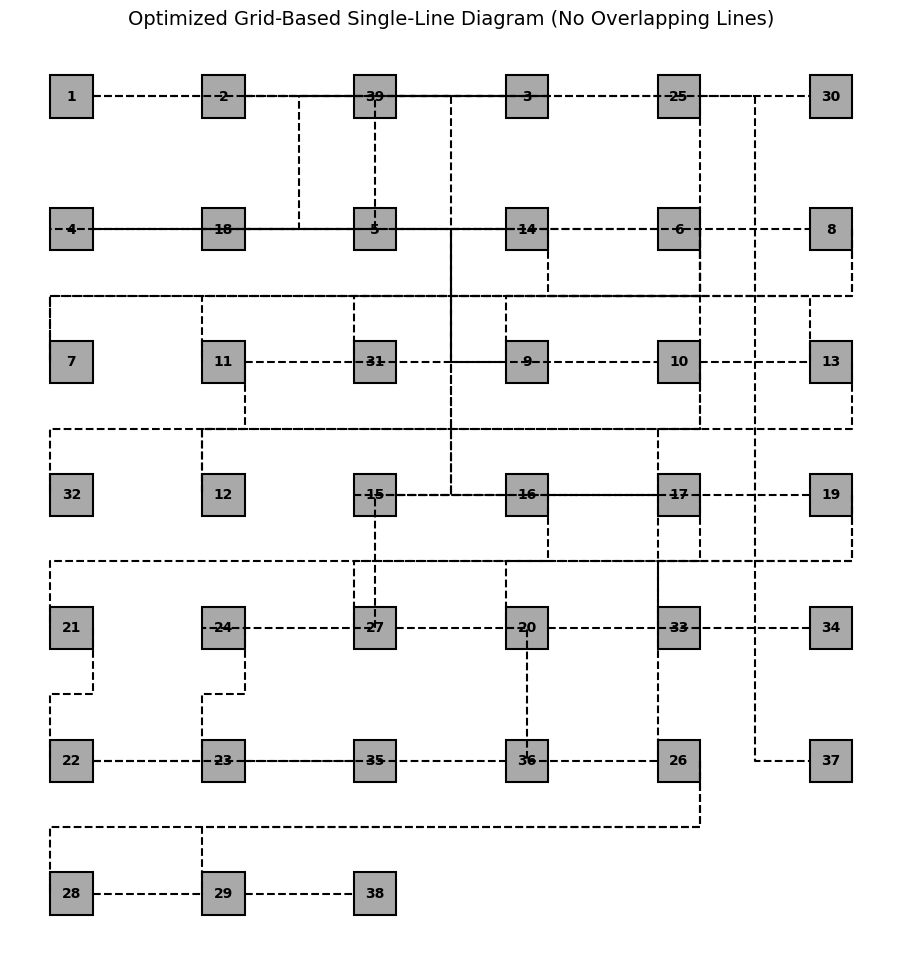

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

 
def generate_structured_grid_positions(G, image_size=(30, 30), bus_size=1.2):
    """
    Assigns buses to a grid, spacing them based on connectivity to minimize crossings.
    """
    num_buses = len(G.nodes)
    
    # Step 1: Use NetworkX's spring layout as a rough guide
    initial_pos = nx.spring_layout(G, k=1.5)  # Helps group related nodes

    # Step 2: Map positions to a discrete grid
    rows = int(np.ceil(np.sqrt(num_buses)))  # Create a roughly square grid
    cols = int(np.ceil(num_buses / rows))

    x_spacing = image_size[1] / (cols + 1)
    y_spacing = image_size[0] / (rows + 1)

    pos = {}
    bus_connections = {}

    for i, bus in enumerate(G.nodes):
        x, y = initial_pos[bus]  # Get the spring layout position
        row = int((y + 1) * (rows / 2))  # Normalize to grid space
        col = int((x + 1) * (cols / 2))

        x, y = col * x_spacing, -row * y_spacing  # Place on grid
        pos[bus] = (x, y)

        # Define connection points
        bus_connections[bus] = {
            "left": (x - bus_size / 2, y),
            "right": (x + bus_size / 2, y),
            "top": (x, y + bus_size / 2),
            "bottom": (x, y - bus_size / 2),
        }

    return pos, bus_connections

def find_best_path(bus_connections, from_bus, to_bus, occupied_points):
    """
    Finds a path between two buses while avoiding existing lines using a simple A* style approach.
    """
    from_x, from_y = bus_connections[from_bus]["right"]
    to_x, to_y = bus_connections[to_bus]["left"]

    path = [(from_x, from_y)]
    current_x, current_y = from_x, from_y

    while current_x != to_x or current_y != to_y:
        if current_x < to_x and (current_x + 1, current_y) not in occupied_points:
            current_x += 1
        elif current_x > to_x and (current_x - 1, current_y) not in occupied_points:
            current_x -= 1
        elif current_y < to_y and (current_x, current_y + 1) not in occupied_points:
            current_y += 1
        elif current_y > to_y and (current_x, current_y - 1) not in occupied_points:
            current_y -= 1

        path.append((current_x, current_y))
        occupied_points.add((current_x, current_y))  # Mark the point as used

    return path

def generate_grid_positions(G, grid_size):
    """
    Assigns each bus to a position on a finite grid, ensuring minimal overlap.
    The buses are assigned based on a simple row-wise packing approach.
    """
    num_buses = len(G.nodes)
    pos = {}

    # Determine spacing based on grid size
    rows = int(np.ceil(np.sqrt(num_buses)))  # Approximate number of rows
    cols = int(np.ceil(num_buses / rows))  # Approximate number of cols
    x_spacing = grid_size[1] // (cols + 1)
    y_spacing = grid_size[0] // (rows + 1)

    for i, bus in enumerate(G.nodes):
        row = i // cols  # Row index
        col = i % cols  # Column index
        pos[bus] = (col * x_spacing, -row * y_spacing)  # Flip Y to match visualization

    return pos

def optimized_manhattan_path(bus_connections, from_bus, to_bus):
    """
    Returns a Manhattan-style path between two buses, ensuring paths do not overlap bus boxes.
    """
    from_x, from_y = bus_connections[from_bus]["right"]  # Start from the right side
    to_x, to_y = bus_connections[to_bus]["left"]  # End at the left side

    mid_x = (from_x + to_x) / 2  # Midpoint for better spacing
    mid_y = (from_y + to_y) / 2

    if np.random.rand() > 0.5:
        return [(from_x, from_y), (mid_x, from_y), (mid_x, to_y), (to_x, to_y)]
    else:
        return [(from_x, from_y), (from_x, mid_y), (to_x, mid_y), (to_x, to_y)]

def refine_positions(G, pos):
    """
    Uses a force-directed layout (spring layout) to spread nodes out while keeping structure.
    """
    refined_pos = nx.spring_layout(G, pos=pos, fixed=pos.keys(), k=1.2, iterations=50)
    return refined_pos


def viz():
    """
    Generates a structured single-line diagram using a spread-out grid-based layout.
    """

    # --- Step 1: Extract Bus and Connectivity Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Assign Buses to Grid Cells ---
    image_size = (30, 30)  # Increase grid size for better spacing
    bus_size = 1.2  # Ensure buses have clear boundaries
    pos, bus_connections = generate_spread_grid_positions(G, image_size=image_size, bus_size=bus_size)

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 12))

    # Draw buses
    for bus in G.nodes:
        x, y = pos[bus]
        bus_color = "#A9A9A9"  # Default gray
        rect = Rectangle((x - bus_size / 2, y - bus_size / 2), bus_size, bus_size,
                         linewidth=1.5, edgecolor='black', facecolor=bus_color)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=10, fontweight="bold", ha='center', va='center')

    # Draw connections using Manhattan paths
    for from_bus, to_bus in G.edges:
        path = optimized_manhattan_path(bus_connections, from_bus, to_bus)
        x_vals, y_vals = zip(*path)
        ax.plot(x_vals, y_vals, 'k-', lw=1.5, linestyle="dashed")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    ax.set_title("Optimized Grid-Based Single-Line Diagram (No Overlapping Lines)", fontsize=14)

    plt.show()

# Usage:
viz()

In [ ]:
import matplotlib.pyplot as plt

def viz():
    """
    Generate a Single-Line Diagram using the PSSE API.
    Retrieves data directly from PSSE and visualizes the grid structure.
    """

    # --- Step 1: Extract Bus Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, 'NUMBER')  # Get bus numbers
    ierr, bus_voltages = psspy.abusreal(-1, 1, 'KV')  # Get bus voltage levels
    ierr, bus_types = psspy.abusint(-1, 1, 'TYPE')  # Get bus types (1=Load, 2=Gen, 3=Slack)
    
    # clean up
    bus_numbers = bus_numbers[0]
    bus_voltages = bus_voltages[0]
    bus_types = bus_types[0]
    

    # --- Step 2: Extract Branch (Transmission Line) Data ---
    # ierr, from_buses = psspy.abrnint(-1, 1, 1, 1, 'FROMNUMBER')  # From bus
    # ierr, to_buses = psspy.abrnint(-1, 1, 1, 1, 'TONUMBER')  # To bus
    
    ierr, (from_buses, to_buses) = psspy.abrnint(
                    sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"]
                )

    # --- Step 3: Normalize Data for Plotting ---
    unique_voltages = sorted(set(bus_voltages), reverse=True)  # Higher voltage buses at top
    voltage_positions = {v: i for i, v in enumerate(unique_voltages)}

    bus_positions = {bus: idx for idx, bus in enumerate(sorted(bus_numbers))}

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw buses as horizontal lines
    for bus, voltage, bus_type in zip(bus_numbers, bus_voltages, bus_types):
        x = bus_positions[bus]
        y = voltage_positions[voltage]
        ax.plot([x - 0.4, x + 0.4], [y, y], color='black', lw=2)  # Draw bus line

        # Add generator symbol (circle)
        if bus_type in [2, 3]:  # Generator or Slack Bus
            ax.scatter(x - 0.5, y, s=150, facecolors='none', edgecolors='black', label='Generator')

        # Add load symbol (arrow)
        if bus_type == 1:  # Load Bus
            ax.arrow(x + 0.5, y, 0.2, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')

        # Label bus number
        ax.text(x, y + 0.2, f"Bus {bus}", ha='center', fontsize=10)

    # Draw transmission lines (branches)
    for from_bus, to_bus in zip(from_buses, to_buses):
        if from_bus in bus_positions and to_bus in bus_positions:
            x1, y1 = bus_positions[from_bus], voltage_positions[bus_voltages[bus_numbers.index(from_bus)]]
            x2, y2 = bus_positions[to_bus], voltage_positions[bus_voltages[bus_numbers.index(to_bus)]]
            ax.plot([x1, x2], [y1, y2], color='black', lw=1, linestyle='--')

    # Adjust plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

TypeError: an integer is required (got type list)

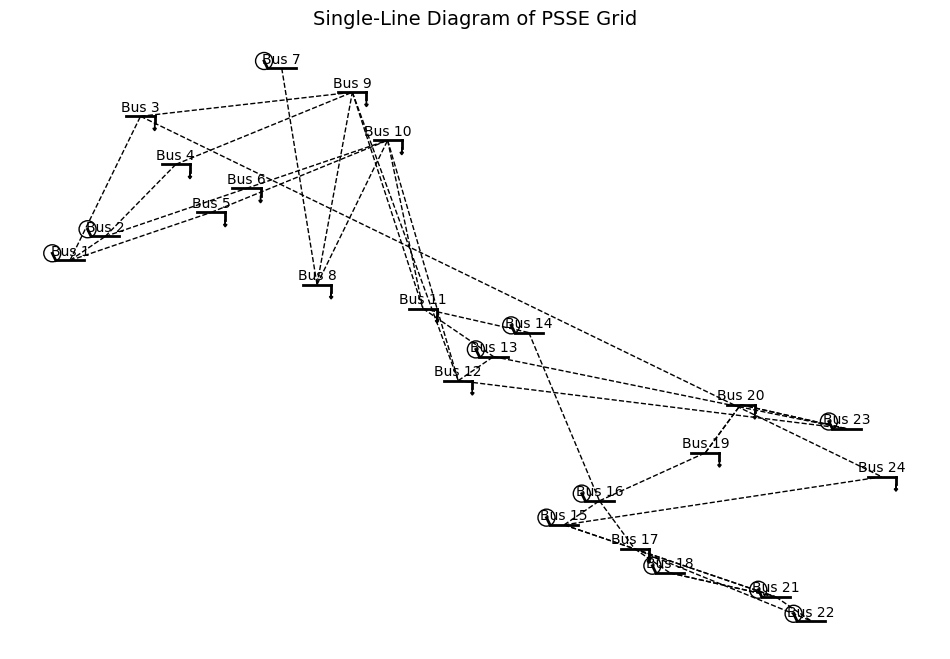

In [21]:
import matplotlib.pyplot as plt

def viz():
    """
    Generate a Single-Line Diagram using the PSSE API.
    Retrieves data directly from PSSE and visualizes the grid structure.
    """

    # --- Step 1: Extract Bus Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, 'NUMBER')  # Get bus numbers
    ierr, bus_voltages = psspy.abusreal(-1, 1, 'KV')  # Get bus voltage levels
    ierr, bus_types = psspy.abusint(-1, 1, 'TYPE')  # Get bus types (1=Load, 2=Gen, 3=Slack)

    # Clean up the extracted lists
    bus_numbers = bus_numbers[0]
    bus_voltages = bus_voltages[0]
    bus_types = bus_types[0]

    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 3: Normalize Data for Plotting ---
    unique_voltages = sorted(set(bus_voltages), reverse=True)  # Higher voltage buses at top
    voltage_positions = {v: i for i, v in enumerate(unique_voltages)}

    bus_positions = {bus: idx for idx, bus in enumerate(sorted(bus_numbers))}

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw buses as horizontal lines
    for bus, voltage, bus_type in zip(bus_numbers, bus_voltages, bus_types):
        x = bus_positions[bus]
        y = voltage_positions[voltage]
        
        # Draw bus line
        ax.plot([x - 0.4, x + 0.4], [y, y], color='black', lw=2)  

        # Add generator symbol (circle) with a vertical connection to the bus
        if bus_type in [2, 3]:  # Generator or Slack Bus
            ax.plot([x - 0.5, x - 0.4], [y + 0.3, y], color='black', lw=2)  # Line connecting generator to bus
            ax.scatter(x - 0.5, y + 0.3, s=150, facecolors='none', edgecolors='black', label='Generator')

        # Add load symbol (arrow) perpendicular to the bus
        if bus_type == 1:  # Load Bus
            ax.plot([x + 0.4, x + 0.4], [y, y - 0.3], color='black', lw=2)  # Line connecting load to bus
            ax.arrow(x + 0.4, y - 0.3, 0, -0.2, head_width=0.1, head_length=0.1, fc='black', ec='black')

        # Label bus number
        ax.text(x, y + 0.2, f"Bus {bus}", ha='center', fontsize=10)

    # Draw transmission lines (branches)
    for from_bus, to_bus in zip(from_buses, to_buses):
        if from_bus in bus_positions and to_bus in bus_positions:
            x1, y1 = bus_positions[from_bus], voltage_positions[bus_voltages[bus_numbers.index(from_bus)]]
            x2, y2 = bus_positions[to_bus], voltage_positions[bus_voltages[bus_numbers.index(to_bus)]]
            ax.plot([x1, x2], [y1, y2], color='black', lw=1, linestyle='--')

    # Adjust plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

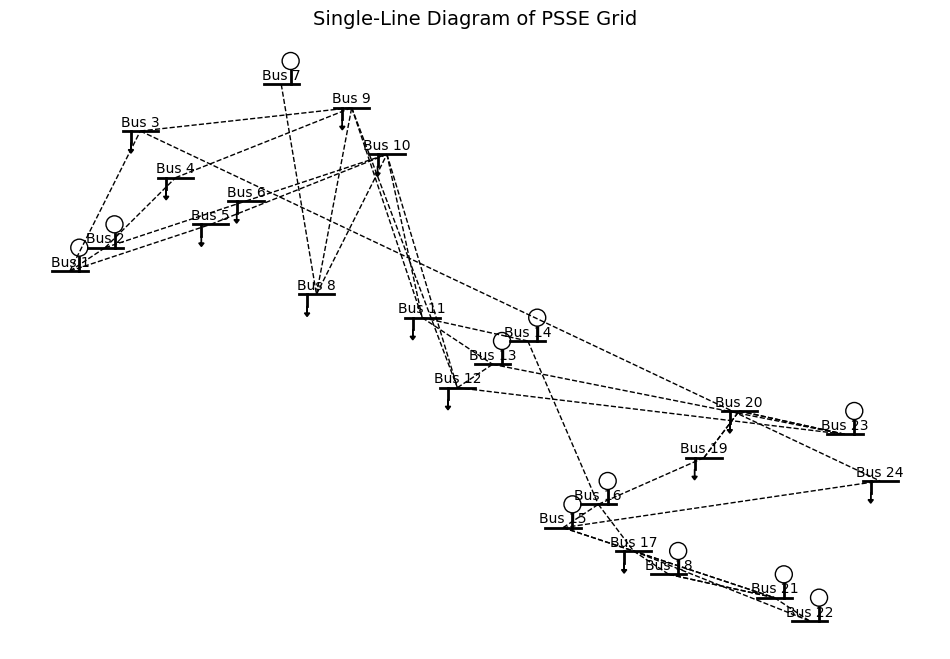

In [31]:
import matplotlib.pyplot as plt

def viz():
    """
    Generate a Single-Line Diagram using the PSSE API.
    Retrieves data directly from PSSE and visualizes the grid structure.
    """

    # --- Step 1: Extract Bus Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, 'NUMBER')  # Get bus numbers
    ierr, bus_voltages = psspy.abusreal(-1, 1, 'KV')  # Get bus voltage levels
    ierr, bus_types = psspy.abusint(-1, 1, 'TYPE')  # Get bus types (1=Load, 2=Gen, 3=Slack)

    # Clean up extracted lists
    bus_numbers = bus_numbers[0]
    bus_voltages = bus_voltages[0]
    bus_types = bus_types[0]

    # --- Step 2: Extract Branch (Transmission Line) Data ---
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 3: Normalize Data for Plotting ---
    unique_voltages = sorted(set(bus_voltages), reverse=True)  # Higher voltage buses at top
    voltage_positions = {v: i for i, v in enumerate(unique_voltages)}

    bus_positions = {bus: idx for idx, bus in enumerate(sorted(bus_numbers))}

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define bus line length
    bus_line_length = 1.0  # Increase from 0.8 to 1.0 for better visibility
    gen_x_offset = -0.4 + (2/3) * bus_line_length  # Generator at 2/3 from the left
    load_x_offset = 0.4 - (2/3) * bus_line_length  # Load at 2/3 from the right

    # Draw buses as horizontal lines
    for bus, voltage, bus_type in zip(bus_numbers, bus_voltages, bus_types):
        x = bus_positions[bus]
        y = voltage_positions[voltage]
        
        # Draw extended bus line
        ax.plot([x - bus_line_length / 2, x + bus_line_length / 2], [y, y], color='black', lw=2)  

        # Add generator symbol (circle) with **corrected position at 2/3**
        if bus_type in [2, 3]:  # Generator or Slack Bus
            gen_y = y + 1.0  # Adjusted height for clarity
            ax.plot([x + gen_x_offset, x + gen_x_offset], [y, gen_y - 0.4], color='black', lw=2)  # Connect to circle
            ax.scatter(x + gen_x_offset, gen_y, s=150, facecolors='none', edgecolors='black', label='Generator')

        # Add load symbol (arrow) at **2/3 from the right side**
        if bus_type == 1:  # Load Bus
            load_y = y - 0.5  # Adjusted height for clarity
            ax.plot([x + load_x_offset, x + load_x_offset], [y, load_y], color='black', lw=2)  # Extend vertical line
            ax.arrow(x + load_x_offset, load_y, 0, -0.3, head_width=0.15, head_length=0.15, fc='black', ec='black')  # Bigger arrow

        # Label bus number
        ax.text(x, y + 0.2, f"Bus {bus}", ha='center', fontsize=10)

    # Draw transmission lines (branches)
    for from_bus, to_bus in zip(from_buses, to_buses):
        if from_bus in bus_positions and to_bus in bus_positions:
            x1, y1 = bus_positions[from_bus], voltage_positions[bus_voltages[bus_numbers.index(from_bus)]]
            x2, y2 = bus_positions[to_bus], voltage_positions[bus_voltages[bus_numbers.index(to_bus)]]
            ax.plot([x1, x2], [y1, y2], color='black', lw=1, linestyle='--')

    # Adjust plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

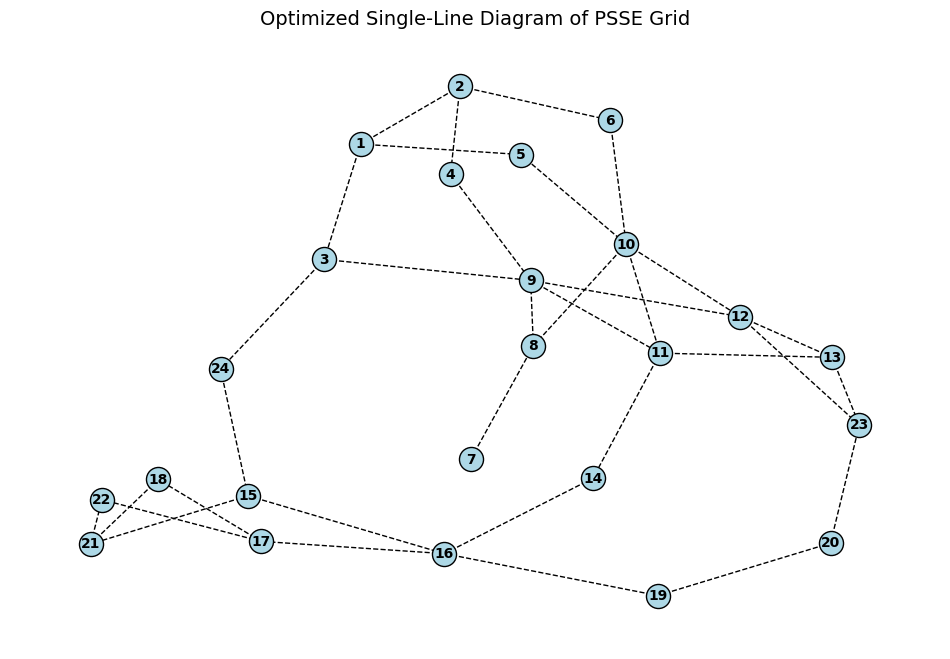

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized using a force-directed algorithm to reduce line crossings.
    """
    
    # --- Step 1: Extract Bus and Branch Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    
    # Clean up lists
    bus_numbers = bus_numbers[0]
    bus_types = bus_types[0]
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.spring_layout(G, seed=42)  # Force-directed layout for spacing
    
    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges (branches)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color="black", width=1, style="dashed")
    
    # Draw nodes (buses)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightblue", edgecolors="black")
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")
    
    # Adjust plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

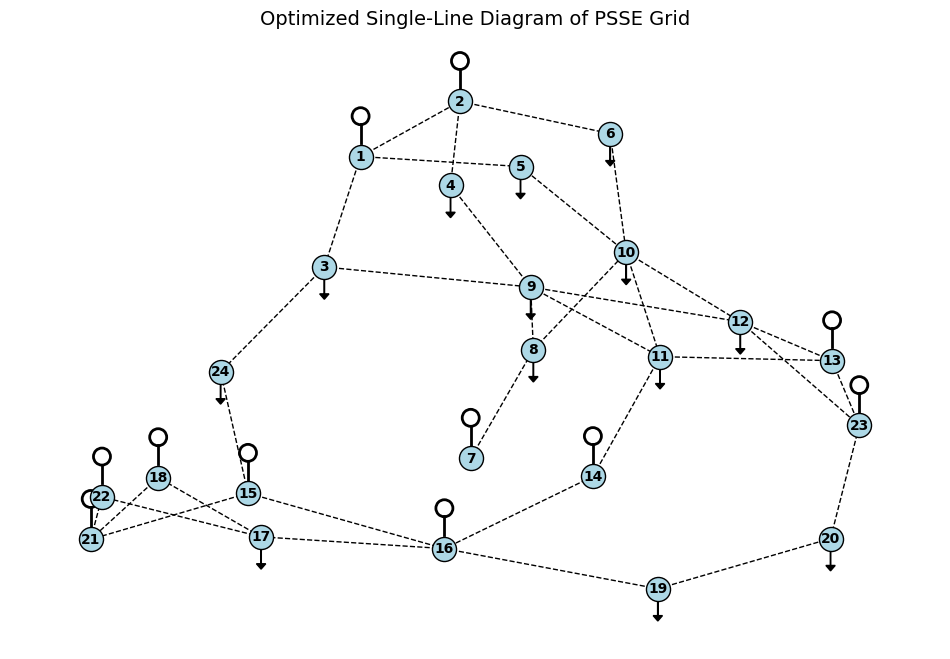

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized using a force-directed algorithm to reduce line crossings.
    """
    
    # --- Step 1: Extract Bus and Branch Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    
    # Clean up lists
    bus_numbers = bus_numbers[0]
    bus_types = bus_types[0]
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.spring_layout(G, seed=42)  # Force-directed layout for spacing
    
    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges (branches)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color="black", width=1, style="dashed")
    
    # Draw nodes (buses)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightblue", edgecolors="black")
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")
    
    # Draw load arrows
    for bus, bus_type in zip(bus_numbers, bus_types):
        if bus_type == 1:  # Load Bus
            x, y = pos[bus]
            ax.arrow(x, y, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
            
        # Draw generator circles and lines
     # Draw generator circles and lines
    # for bus, bus_type in zip(bus_numbers, bus_types):
    #     if bus_type in [2, 3]:  # Generator or Slack Bus
    #         x, y = pos[bus]
    #         gen_y = y + 0.1  # Move generator symbol above the bus
    #         circle_radius = 0.03  # Adjusted radius for better connection
    #         ax.plot([x, x], [y, gen_y - circle_radius], color='black', lw=2)  # Connect generator to bus edge
    #         gen_circle = plt.Circle((x, gen_y), circle_radius, color='none', ec='black', lw=2)
    #         ax.add_patch(gen_circle)
       # Draw generator circles and lines
    for bus, bus_type in zip(bus_numbers, bus_types):
        if bus_type in [2, 3]:  # Generator or Slack Bus
            x, y = pos[bus]
            gen_y = y + 0.15  # Move generator symbol above the bus
            ax.plot([x, x], [y + 0.05, gen_y - 0.03], color='black', lw=2)  # Connect generator to bus
            ax.scatter(x, gen_y, s=150, facecolors='none', edgecolors='black', linewidths=2)  # Generator symbol
    
    
    # Adjust plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

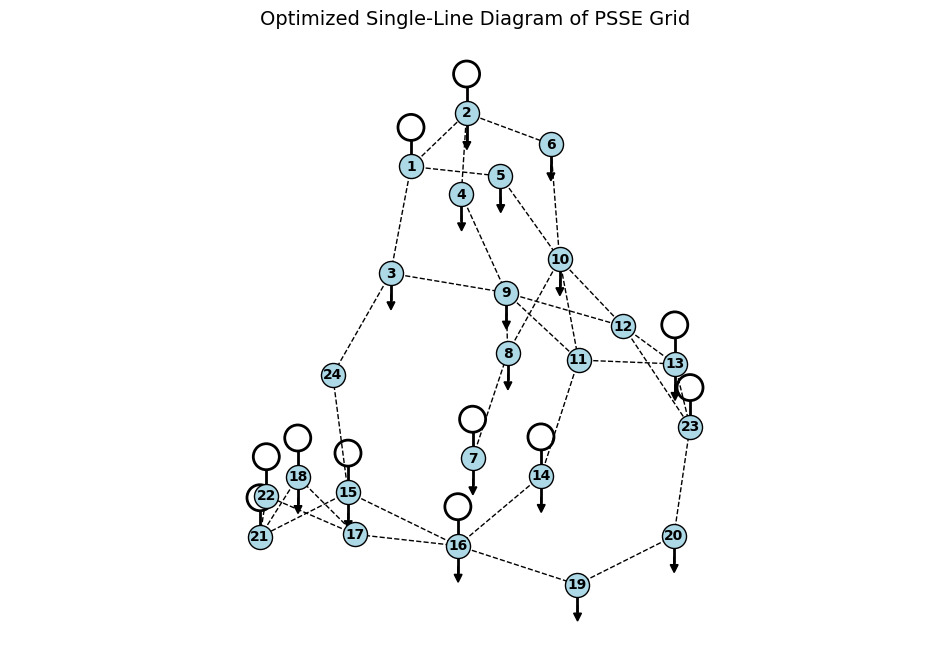

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized using a force-directed algorithm to reduce line crossings.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, gen_power = psspy.amachcplx(-1, 1, "PQGEN")  # Get P and Q as complex numbers

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # Map generator buses to their real power (P) for visualization sizing
    gen_powers = {bus: gen_power[0][i].real for i, bus in enumerate(gen_buses)}
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.spring_layout(G, seed=42)
    
    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges (branches)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color="black", width=1, style="dashed")
    
    # Draw nodes (buses)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightblue", edgecolors="black")
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")
    
    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Draw load if present
        if bus in load_buses:
            ax.plot([x, x], [y - 0.05, y - 0.1], color='black', lw=2)  # Load line
            ax.arrow(x + .001, y - 0.08, 0, -0.03, head_width=0.03, head_length=0.03, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + 0.15  # Position generator above bus
            gen_size = 0.05  # Set a constant size for all generators
            ax.plot([x, x], [y + 0.05, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = plt.Circle((x, gen_y), gen_size, color='none', ec='black', lw=2) 
            ax.add_patch(gen_circle)

        # for bus, bus_type in zip(bus_numbers, bus_types):
        # if bus_type in [2, 3]:  # Generator or Slack Bus
        #     x, y = pos[bus]
        #     gen_y = y + 0.15  # Move generator symbol above the bus
        #     ax.plot([x, x], [y + 0.05, gen_y - 0.03], color='black', lw=2)  # Connect generator to bus
        #     ax.scatter(x, gen_y, s=150, facecolors='none', edgecolors='black', linewidths=2)  # Generator symbol
    # Adjust plot
    # Ensure perfect circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

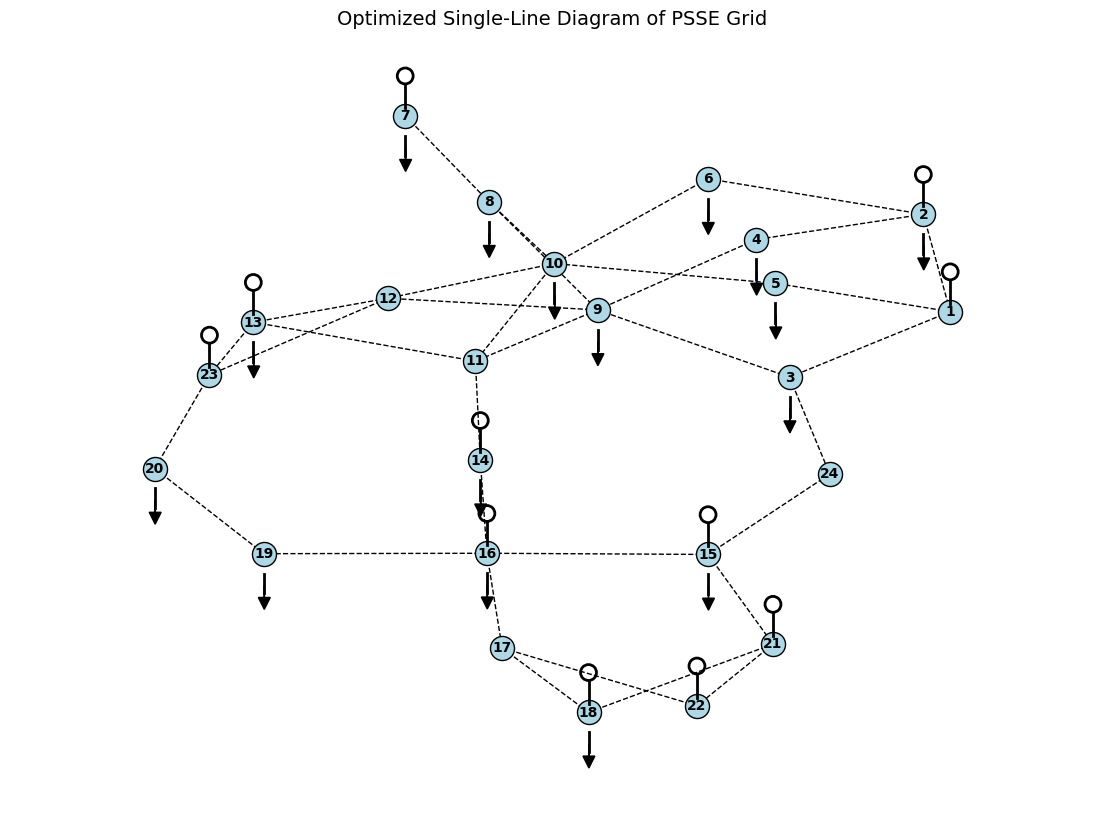

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to evenly spread the nodes across the field.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, gen_power = psspy.amachcplx(-1, 1, "PQGEN")  # Get P and Q as complex numbers

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # Map generator buses to their real power (P) for visualization sizing
    gen_powers = {bus: gen_power[0][i].real for i, bus in enumerate(gen_buses)}
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    # Use kamada_kawai_layout for better spacing
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions (scale them out to avoid clustering)
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]

    # Scale to a wider & taller layout
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity
    
    # Draw edges (branches)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color="black", width=1, style="dashed")
    
    # Draw nodes (buses)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightblue", edgecolors="black")
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")
    
    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Draw load if present
        if bus in load_buses:
            ax.plot([x, x], [y - 0.05, y - 0.1], color='black', lw=2)  # Load line
            ax.arrow(x + .001, y - 0.08, 0, -0.03, head_width=0.03, head_length=0.03, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + 0.1  # Position generator further above bus
            gen_size = 0.02  # Set a slightly larger constant size
            ax.plot([x, x], [y + 0.02, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = plt.Circle((x, gen_y), gen_size, color='none', ec='black', lw=2) 
            ax.add_patch(gen_circle)

    # Ensure perfect circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


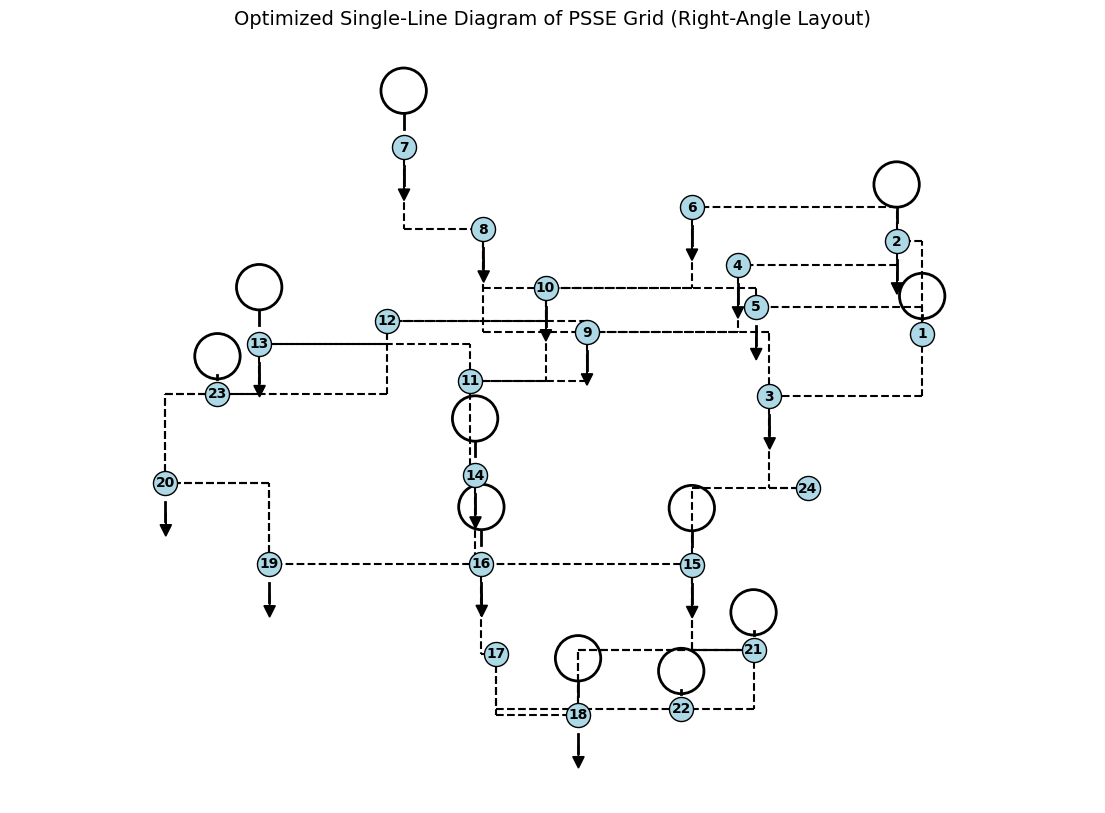

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Draw edges with right-angle bends
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Right-angle connection (L-shape)
        mid_x = x1
        mid_y = y2
        ax.plot([x1, mid_x], [y1, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x, x2], [mid_y, y2], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Draw nodes (buses)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightblue", edgecolors="black")
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")
    
    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Adjust offset dynamically based on number of generators/loads on the same bus
        offset_y = 0.15 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            ax.plot([x, x], [y - 0.05, y - 0.1], color='black', lw=2)  # Load line
            ax.arrow(x + .001, y - 0.08, 0, -0.03, head_width=0.03, head_length=0.03, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + offset_y  # Position generator dynamically above bus
            gen_size = 0.06  # Set a slightly larger constant size
            ax.plot([x, x], [y + 0.05, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = Circle((x, gen_y), gen_size, color='none', ec='black', lw=2) 
            ax.add_patch(gen_circle)

    # Ensure perfect circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


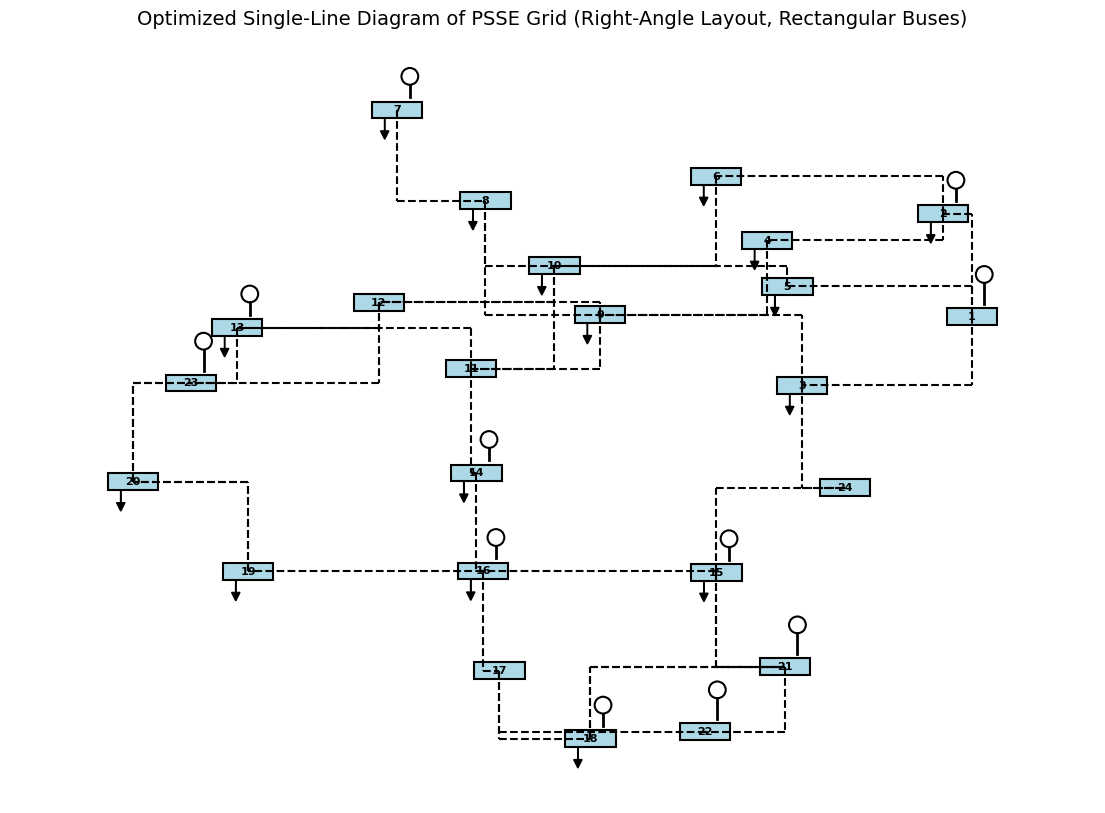

In [85]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Draw edges with right-angle bends
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Right-angle connection (L-shape)
        mid_x = x1
        mid_y = y2
        ax.plot([x1, mid_x], [y1, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x, x2], [mid_y, y2], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Draw nodes (buses) as rectangles
    node_width = 0.12
    node_height = 0.04
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Adjust offset dynamically based on number of generators/loads on the same bus
        offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            #ax.plot([x, x], [y - 0.05, y - 0.1], color='black', lw=2)  # Load line don't need this
            ax.arrow(x - 0.03 , y - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + offset_y  # Position generator dynamically above bus
            gen_size = 0.02  # Smaller constant size for generator
            ax.plot([x + 0.03, x + 0.03], [y + 0.03, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = Circle((x+ 0.03, gen_y), gen_size, color='none', ec='black', lw=1.5) 
            ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


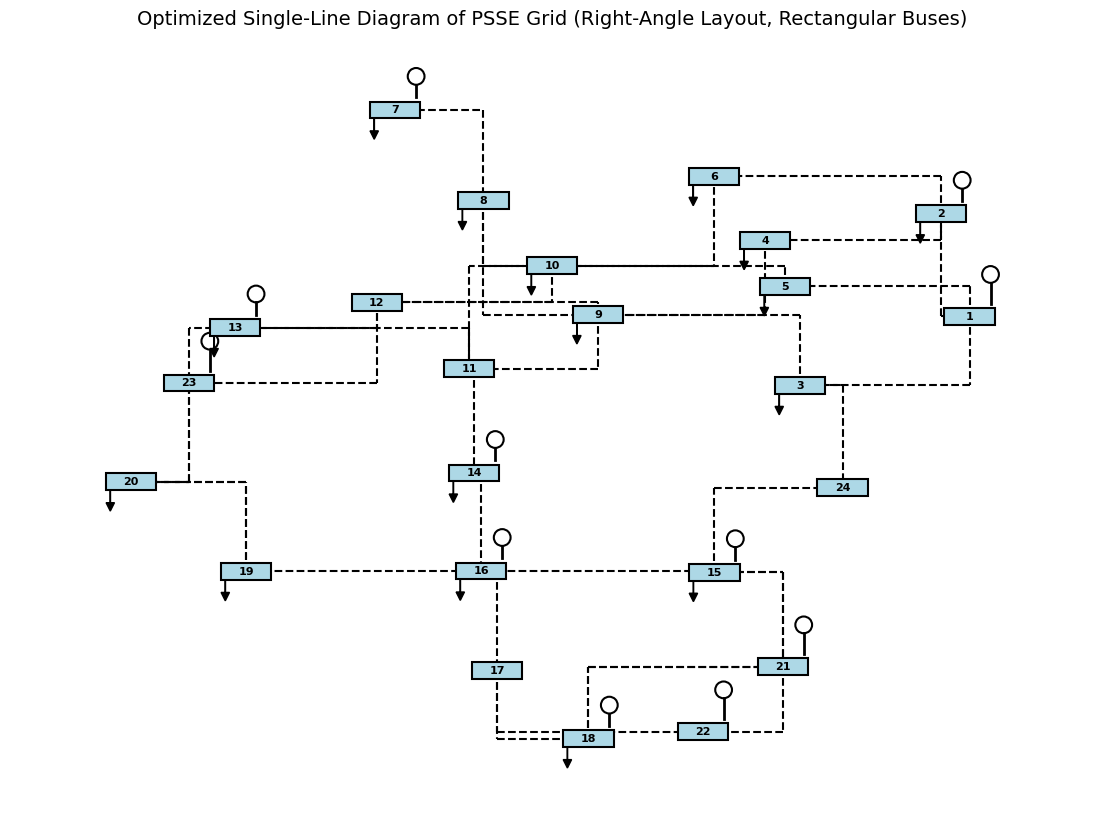

In [87]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    Uses right-angle bends for edges and overlays rectangles on top for clarity.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Load buses
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Generator buses

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Step 4.1: Draw edges (branches) **BEHIND** everything
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Right-angle connection (L-shape)
        mid_x = x1 if abs(x1 - x2) > abs(y1 - y2) else x2
        mid_y = y2 if abs(x1 - x2) > abs(y1 - y2) else y1

        ax.plot([x1, mid_x], [y1, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x, x2], [mid_y, y2], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Step 4.2: Draw loads and generators
    for bus, (x, y) in pos.items():
        offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            ax.arrow(x - 0.05, y - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + offset_y  # Position generator dynamically above bus
            gen_size = 0.02  # Smaller constant size for generator
            ax.plot([x + 0.05, x + 0.05], [y + 0.03, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = Circle((x + 0.05, gen_y), gen_size, color='none', ec='black', lw=1.5) 
            ax.add_patch(gen_circle)

    # Step 4.3: Draw bus **rectangles LAST** (on top)
    node_width = 0.12
    node_height = 0.04
    for bus, (x, y) in pos.items():
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue', zorder=3)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center', zorder=4)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:72: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


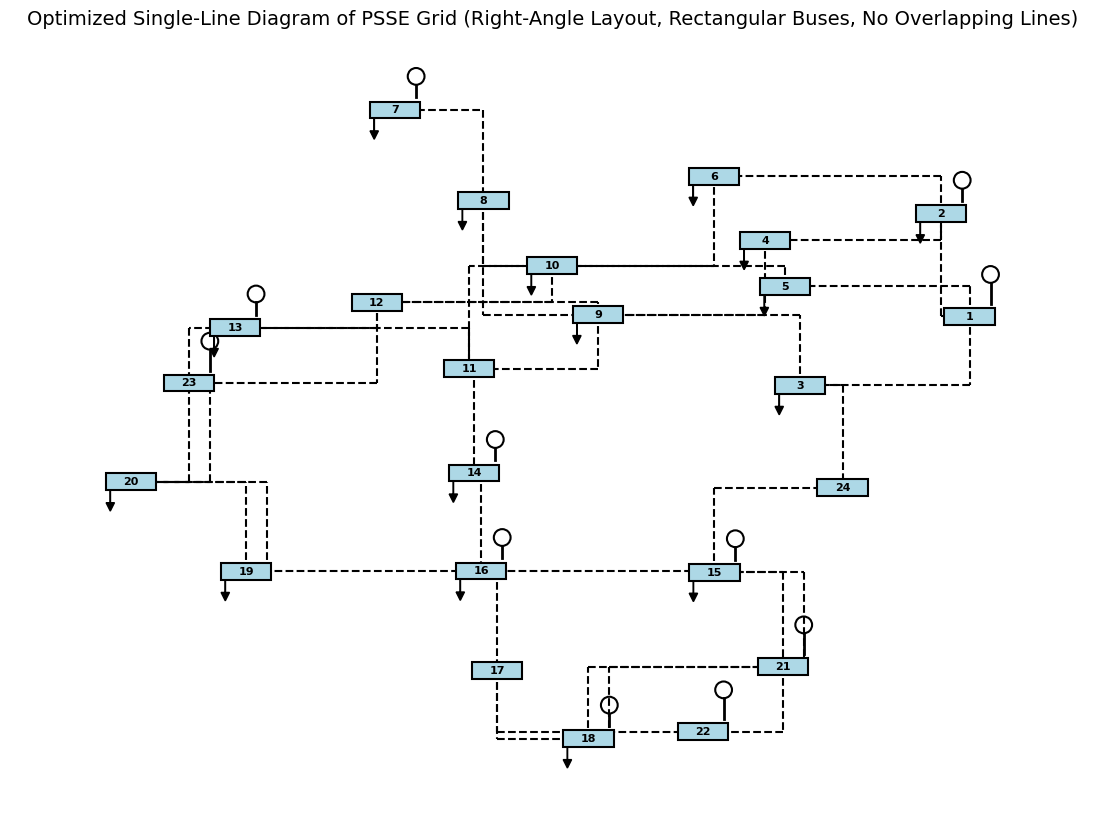

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle
from collections import defaultdict

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    Uses right-angle bends for edges, prevents overlap, and overlays rectangles for clarity.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Load buses
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Generator buses

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges (handling multiple connections)
    edge_counts = defaultdict(int)
    edges = list(zip(from_buses, to_buses))

    for from_bus, to_bus in edges:
        edge_counts[(from_bus, to_bus)] += 1
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Step 4.1: Draw edges (branches) **BEHIND** everything, avoiding overlap
    edge_spacing = 0.05  # Offset for parallel edges
    drawn_edges = defaultdict(int)

    for from_bus, to_bus in edges:
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        mid_x = x1 if abs(x1 - x2) > abs(y1 - y2) else x2
        mid_y = y2 if abs(x1 - x2) > abs(y1 - y2) else y1

        # Calculate offset to prevent exact overlap
        offset = drawn_edges[(from_bus, to_bus)] * edge_spacing
        drawn_edges[(from_bus, to_bus)] += 1

        ax.plot([x1 + offset, mid_x + offset], [y1, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x + offset, x2 + offset], [mid_y, y2], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Step 4.2: Draw loads and generators
    for bus, (x, y) in pos.items():
        offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            ax.arrow(x - 0.05, y - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + offset_y  # Position generator dynamically above bus
            gen_size = 0.02  # Smaller constant size for generator
            ax.plot([x + 0.05, x + 0.05], [y + 0.03, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = Circle((x + 0.05, gen_y), gen_size, color='none', ec='black', lw=1.5) 
            ax.add_patch(gen_circle)

    # Step 4.3: Draw bus **rectangles LAST** (on top)
    node_width = 0.12
    node_height = 0.04
    for bus, (x, y) in pos.items():
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue', zorder=3)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center', zorder=4)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, No Overlapping Lines)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:71: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:72: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


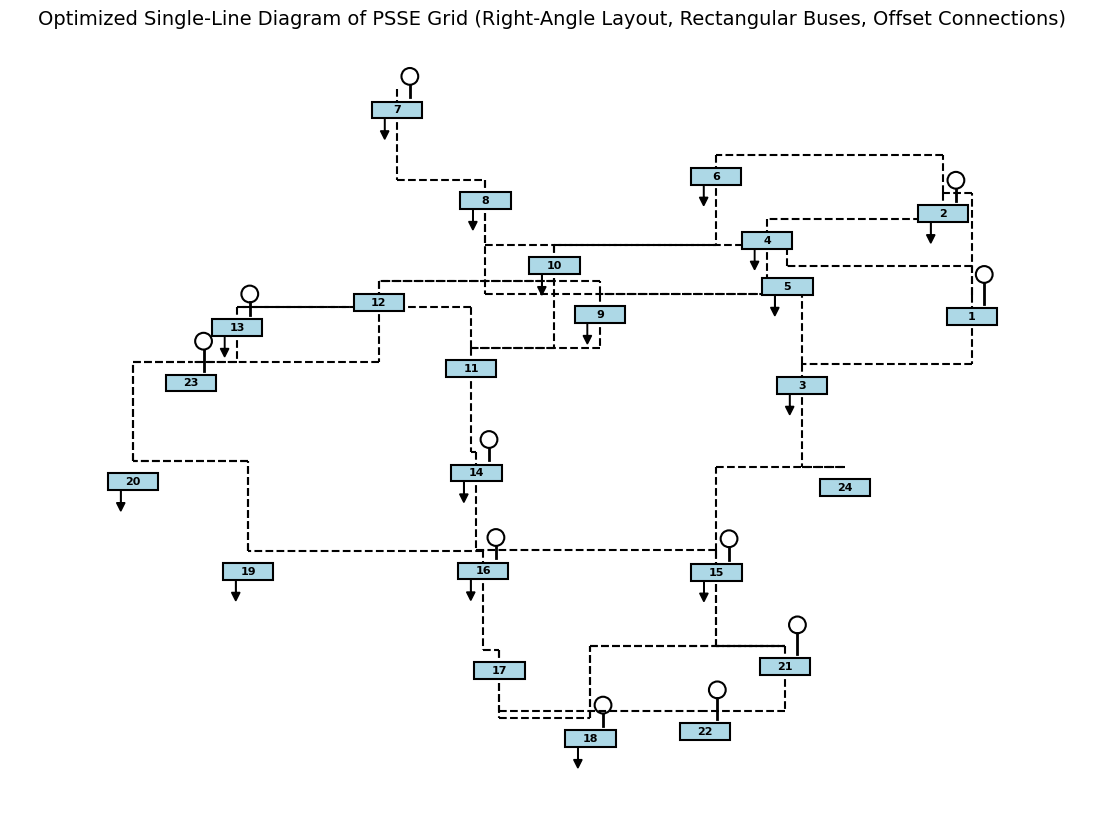

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Define connection offset
    connection_offset = 0.05

    # Draw edges with right-angle bends and connection offsets
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Apply connection offsets
        if x1 == x2:  # Vertical connection
            x1 += connection_offset
            x2 += connection_offset
        else:  # Horizontal connection
            y1 += connection_offset
            y2 += connection_offset

        # Right-angle connection (L-shape)
        mid_x = x1
        mid_y = y2
        ax.plot([x1, mid_x], [y1, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x, x2], [mid_y, y2], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Draw nodes (buses) as rectangles
    node_width = 0.12
    node_height = 0.04
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue', zorder=3)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center', zorder=4)

    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Adjust offset dynamically based on number of generators/loads on the same bus
        offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            ax.arrow(x - 0.03, y - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')  # Load arrow
        
        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + offset_y  # Position generator dynamically above bus
            gen_size = 0.02  # Smaller constant size for generator
            ax.plot([x + 0.03, x + 0.03], [y + 0.03, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
            # Create generator circle
            gen_circle = Circle((x + 0.03, gen_y), gen_size, color='none', ec='black', lw=1.5, zorder=3) 
            ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:91: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:92: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


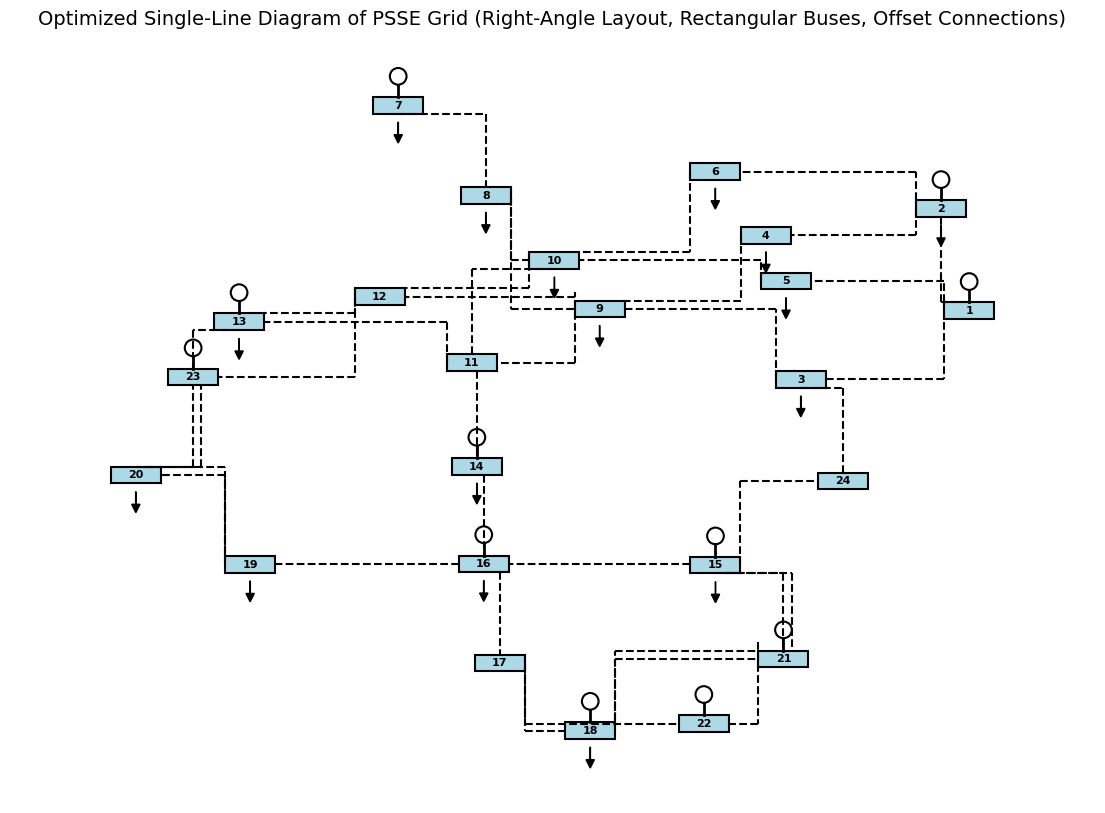

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    Uses right-angle bends and properly spaced connection points to avoid overlap.
    """
    
    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")
    
    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    for bus in bus_numbers[0]:
        G.add_node(bus)
    
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)
    
    # Normalize positions
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )
    
    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    
    node_width = 0.12
    node_height = 0.04
    connection_offsets = {}  # Track offset connections per bus side
    
    # Function to get connection point
    def get_connection_point(bus, direction, offset=0):
        x, y = pos[bus]
        if direction == "top":
            return (x + offset, y + node_height / 2)
        elif direction == "bottom":
            return (x + offset, y - node_height / 2)
        elif direction == "left":
            return (x - node_width / 2, y + offset)
        elif direction == "right":
            return (x + node_width / 2, y + offset)
    
    # Draw edges with right-angle bends
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]
        
        dx, dy = x2 - x1, y2 - y1
        
        # Determine preferred connection points
        if abs(dx) > abs(dy):  # More horizontal distance
            from_side = "right" if dx > 0 else "left"
            to_side = "left" if dx > 0 else "right"
        else:  # More vertical distance
            from_side = "top" if dy > 0 else "bottom"
            to_side = "bottom" if dy > 0 else "top"
        
        # Track offsets to prevent overlap
        offset_from = connection_offsets.get((from_bus, from_side), 0)
        offset_to = connection_offsets.get((to_bus, to_side), 0)
        
        start = get_connection_point(from_bus, from_side, offset_from)
        end = get_connection_point(to_bus, to_side, offset_to)
        
        mid_x = start[0] if from_side in ["left", "right"] else end[0]
        mid_y = start[1] if from_side in ["top", "bottom"] else end[1]
        
        ax.plot([start[0], mid_x], [start[1], mid_y], 'k-', lw=1.5, linestyle="dashed")
        ax.plot([mid_x, end[0]], [mid_y, end[1]], 'k-', lw=1.5, linestyle="dashed")
        
        connection_offsets[(from_bus, from_side)] = offset_from + 0.02
        connection_offsets[(to_bus, to_side)] = offset_to + 0.02
    
    # Draw nodes (buses) as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')
    
    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        
        if bus in load_buses:
            ax.arrow(x, y - node_height / 2 - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')
        
        if bus in gen_buses:
            gen_y = y + node_height / 2 + 0.05
            gen_size = 0.02
            ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)
            ax.add_patch(Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5))
    
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()


c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:79: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


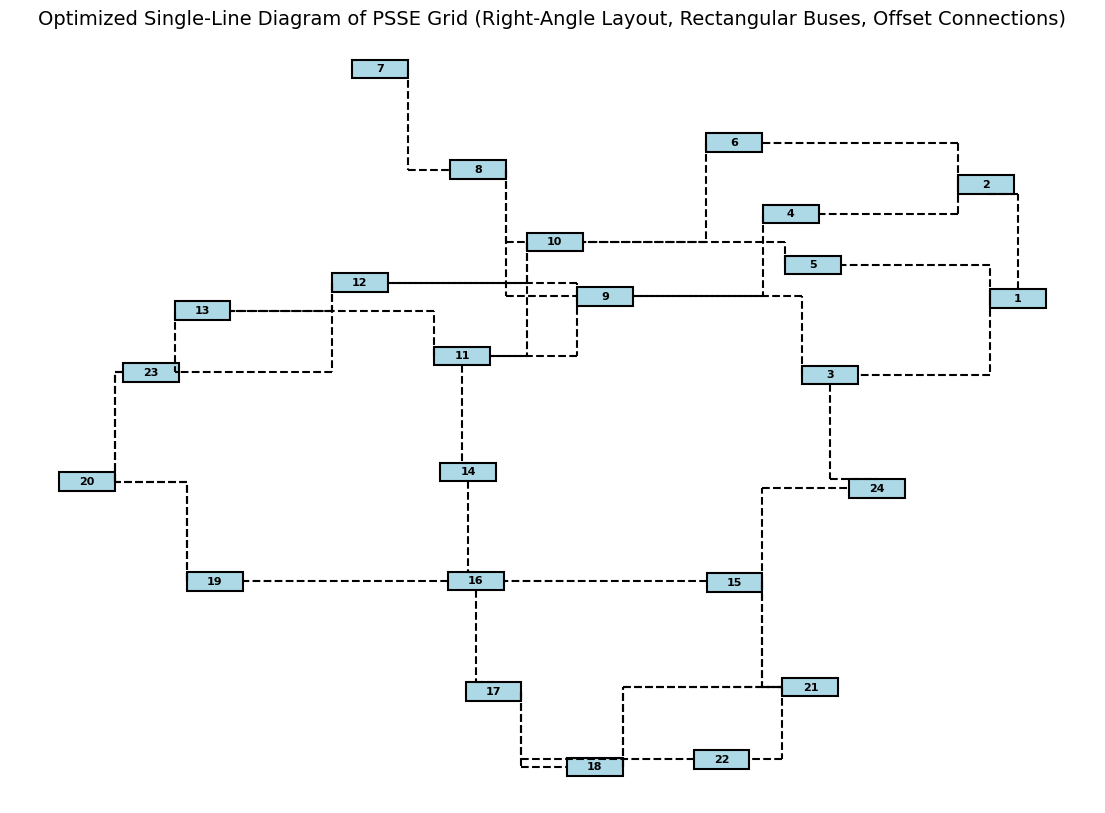

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()
    
    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    
    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")
    
    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)
    
    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Define bus rectangle dimensions
    node_width = 0.12
    node_height = 0.04

    # Store available connection points for each bus
    connection_offsets = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        connection_offsets[bus] = {
            'top': (x, y + node_height / 2),
            'bottom': (x, y - node_height / 2),
            'left': (x - node_width / 2, y),
            'right': (x + node_width / 2, y)
        }

    # Draw edges with right-angle bends
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_x, from_y = pos[from_bus]
        to_x, to_y = pos[to_bus]

        # Determine closest connection points
        from_connection = min(connection_offsets[from_bus].values(), key=lambda p: np.linalg.norm(np.array(p) - np.array([to_x, to_y])))
        to_connection = min(connection_offsets[to_bus].values(), key=lambda p: np.linalg.norm(np.array(p) - np.array([from_x, from_y])))

        # Right-angle connection (L-shape)
        mid_x = from_connection[0]
        mid_y = to_connection[1]
        ax.plot([from_connection[0], mid_x], [from_connection[1], mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical segment
        ax.plot([mid_x, to_connection[0]], [mid_y, to_connection[1]], 'k-', lw=1.5, linestyle="dashed")  # Horizontal segment

    # Draw nodes (buses) as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Draw load arrows and generator circles independently
    # for bus in bus_numbers[0]:
    #     x, y = pos[bus]

    #     # Draw load if present
    #     if bus in load_buses:
    #         ax.arrow(x - 0.03 , y - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')  # Load arrow
        
    #     # Draw generator if present
    #     if bus in gen_buses:
    #         gen_y = y + 0.08  # Position generator above bus
    #         gen_size = 0.02  # Smaller constant size for generator
    #         ax.plot([x + 0.03, x + 0.03], [y + 0.03, gen_y - gen_size], color='black', lw=2)  # Generator connection
            
    #         # Create generator circle
    #         gen_circle = Circle((x+ 0.03, gen_y), gen_size, color='none', ec='black', lw=1.5) 
    #         ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:83: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


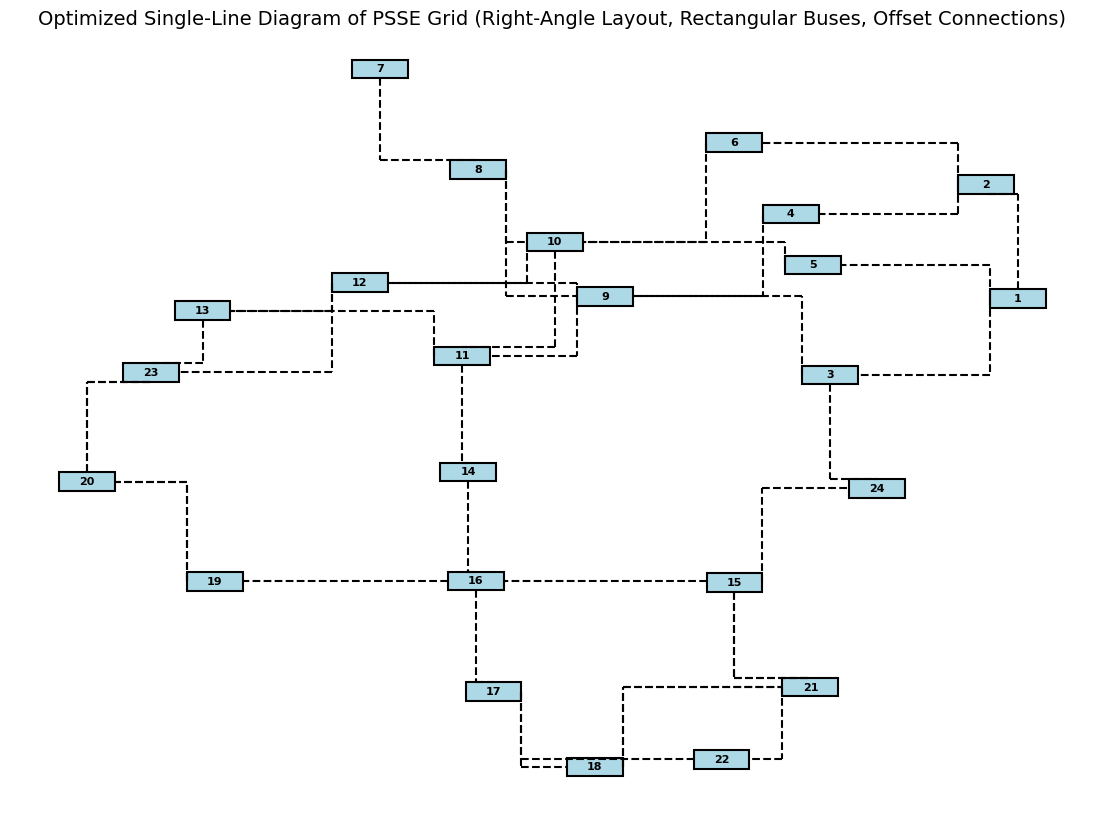

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection points
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            p1 = bus_connections[from_bus]["right"] if x1 < x2 else bus_connections[from_bus]["left"]
            p2 = bus_connections[to_bus]["left"] if x1 < x2 else bus_connections[to_bus]["right"]
        else:  # Prefer vertical connection
            p1 = bus_connections[from_bus]["top"] if y1 < y2 else bus_connections[from_bus]["bottom"]
            p2 = bus_connections[to_bus]["bottom"] if y1 < y2 else bus_connections[to_bus]["top"]

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1[0], p2[1]
        ax.plot([p1[0], mid_x], [p1[1], mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2[0]], [mid_y, p2[1]], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # # Draw load arrows and generator circles independently
    # for bus in bus_numbers[0]:
    #     x, y = pos[bus]

    #     # Adjust offset dynamically based on number of generators/loads on the same bus
    #     offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

    #     # Draw load if present
    #     if bus in load_buses:
    #         ax.arrow(x, y - node_height / 2 - 0.03, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')

    #     # Draw generator if present
    #     if bus in gen_buses:
    #         gen_y = y + node_height / 2 + offset_y  # Position generator dynamically above bus
    #         gen_size = 0.02  # Smaller constant size for generator
    #         ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)  # Generator connection

    #         # Create generator circle
    #         gen_circle = Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5)
    #         ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:83: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


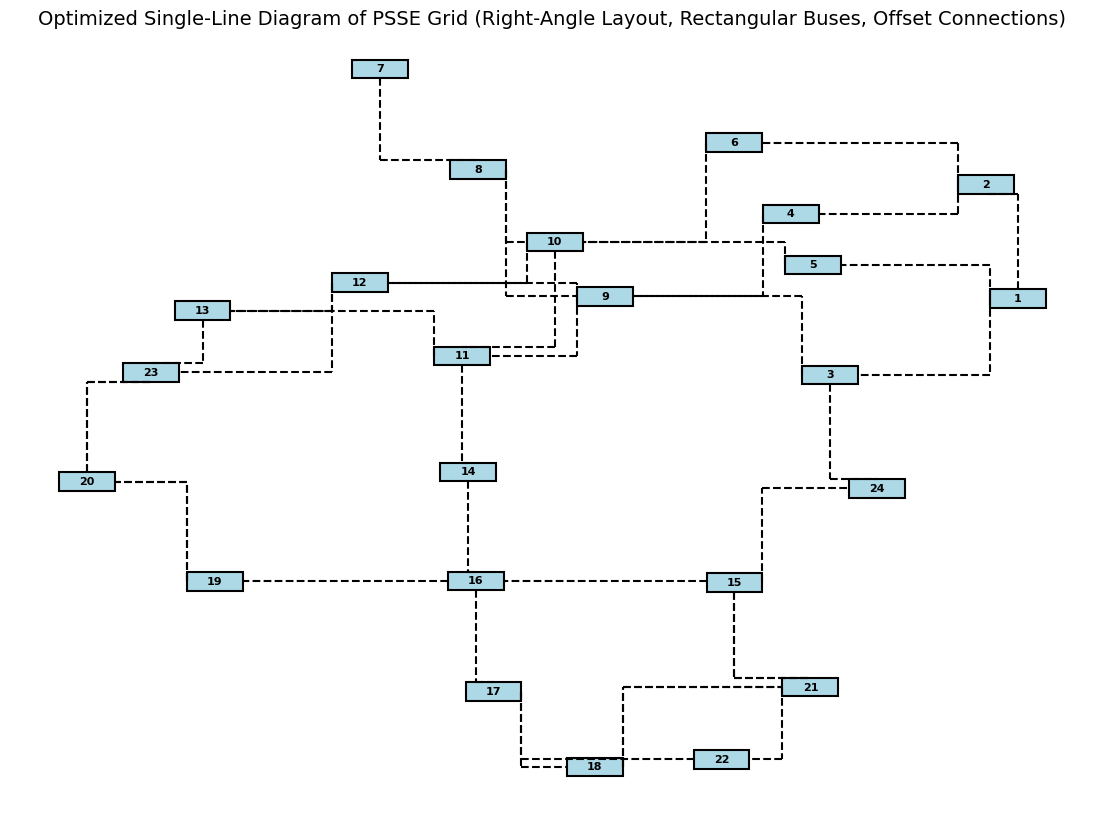

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection points
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            p1 = bus_connections[from_bus]["right"] if x1 < x2 else bus_connections[from_bus]["left"]
            p2 = bus_connections[to_bus]["left"] if x1 < x2 else bus_connections[to_bus]["right"]
        else:  # Prefer vertical connection
            p1 = bus_connections[from_bus]["top"] if y1 < y2 else bus_connections[from_bus]["bottom"]
            p2 = bus_connections[to_bus]["bottom"] if y1 < y2 else bus_connections[to_bus]["top"]

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1[0], p2[1]
        ax.plot([p1[0], mid_x], [p1[1], mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2[0]], [mid_y, p2[1]], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Draw load arrows and generator circles independently
    # for bus in bus_numbers[0]:
    #     x, y = pos[bus]

    #     # Adjust offset dynamically based on number of generators/loads on the same bus
    #     offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

    #     # Draw load if present
    #     if bus in load_buses:
    #         ax.arrow(x, y - node_height / 2 - 0.03, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')

    #     # Draw generator if present
    #     if bus in gen_buses:
    #         gen_y = y + node_height / 2 + offset_y  # Position generator dynamically above bus
    #         gen_size = 0.02  # Smaller constant size for generator
    #         ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)  # Generator connection

    #         # Create generator circle
    #         gen_circle = Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5)
    #         ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:97: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


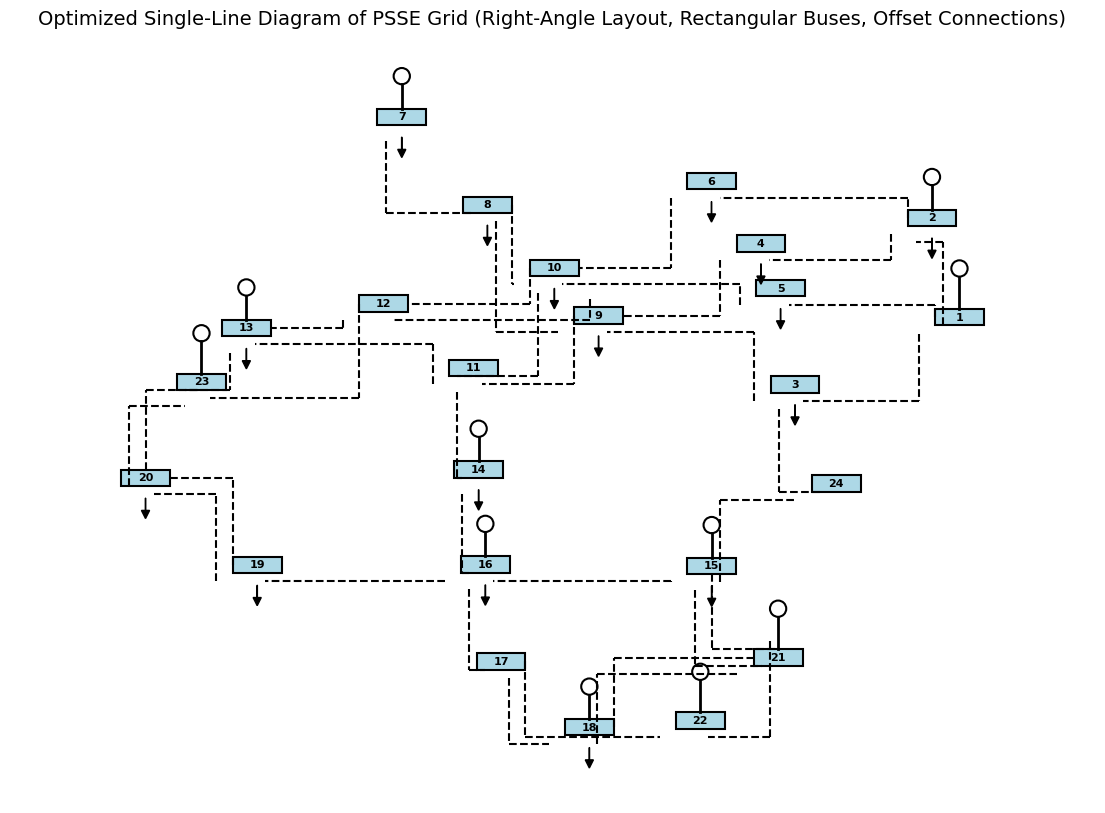

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04

    # Track connection counts to offset them properly
    connection_counts = defaultdict(lambda: {"top": 0, "bottom": 0, "left": 0, "right": 0})

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle branch connections with offset logic
    offset_step = 0.04  # Step size for spacing parallel connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection points
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            side1 = "right" if x1 < x2 else "left"
            side2 = "left" if x1 < x2 else "right"
        else:  # Prefer vertical connection
            side1 = "top" if y1 < y2 else "bottom"
            side2 = "bottom" if y1 < y2 else "top"

        # Apply offsets to prevent overlap
        offset1 = (connection_counts[from_bus][side1] - 1) * offset_step
        offset2 = (connection_counts[to_bus][side2] - 1) * offset_step
        connection_counts[from_bus][side1] += 1
        connection_counts[to_bus][side2] += 1

        # Get offset connection points
        p1 = (bus_connections[from_bus][side1][0] + offset1, bus_connections[from_bus][side1][1] + offset1)
        p2 = (bus_connections[to_bus][side2][0] + offset2, bus_connections[to_bus][side2][1] + offset2)

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1[0], p2[1]
        ax.plot([p1[0], mid_x], [p1[1], mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2[0]], [mid_y, p2[1]], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]

        # Adjust offset dynamically based on number of generators/loads on the same bus
        offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

        # Draw load if present
        if bus in load_buses:
            ax.arrow(x, y - node_height / 2 - 0.03, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')

        # Draw generator if present
        if bus in gen_buses:
            gen_y = y + node_height / 2 + offset_y  # Position generator dynamically above bus
            gen_size = 0.02  # Smaller constant size for generator
            ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)  # Generator connection

            # Create generator circle
            gen_circle = Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5)
            ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:107: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:108: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


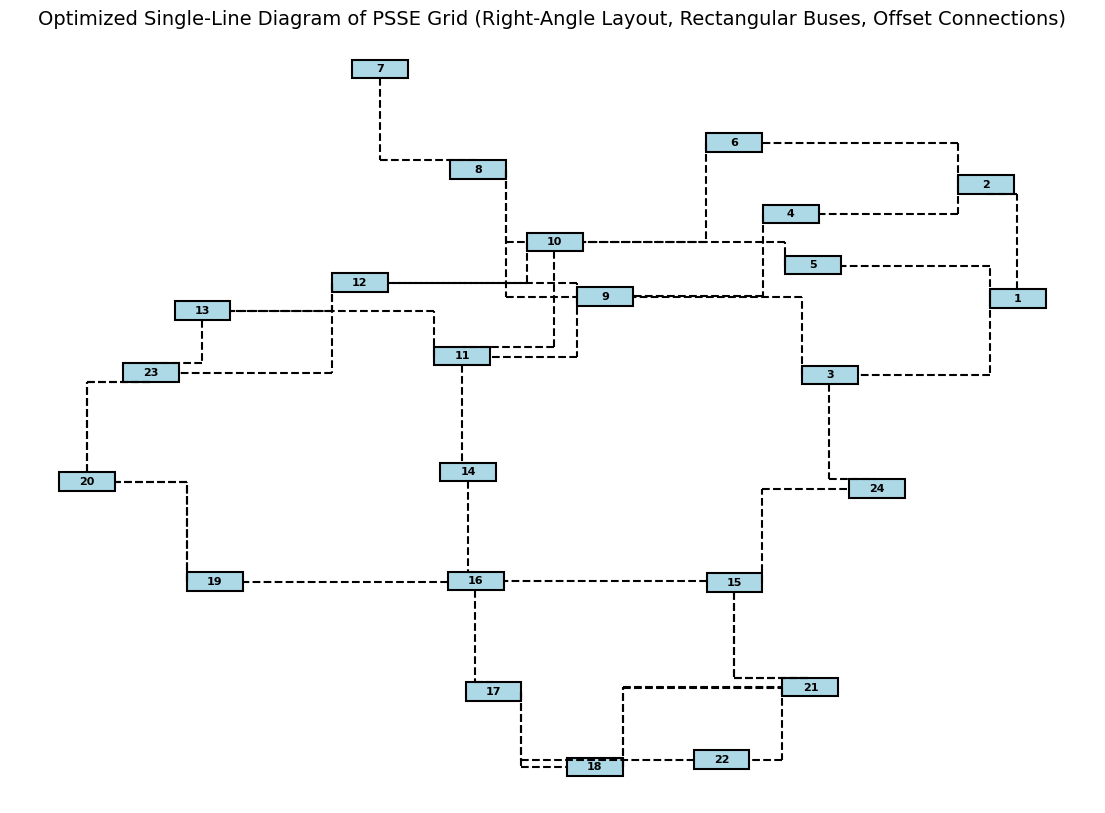

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04

    # Track connection counts to offset them properly
    connection_counts = defaultdict(lambda: {"top": 0, "bottom": 0, "left": 0, "right": 0})

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle branch connections with offset logic
    offset_step = 0.001  # Small step size for spacing parallel connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection sides
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            side1 = "right" if x1 < x2 else "left"
            side2 = "left" if x1 < x2 else "right"
            offset_dir = "y"  # Offset in vertical direction
        else:  # Prefer vertical connection
            side1 = "top" if y1 < y2 else "bottom"
            side2 = "bottom" if y1 < y2 else "top"
            offset_dir = "x"  # Offset in horizontal direction

        # Apply small offsets to prevent overlap
        offset1 = (connection_counts[from_bus][side1] - 1) * offset_step
        offset2 = (connection_counts[to_bus][side2] - 1) * offset_step
        connection_counts[from_bus][side1] += 1
        connection_counts[to_bus][side2] += 1

        # Get offset connection points
        p1 = list(bus_connections[from_bus][side1])
        p2 = list(bus_connections[to_bus][side2])

        # Apply offset perpendicular to the connection direction
        if offset_dir == "x":
            p1[0] += offset1
            p2[0] += offset2
        else:
            p1[1] += offset1
            p2[1] += offset2

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1[0], p2[1]
        ax.plot([p1[0], mid_x], [p1[1], mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2[0]], [mid_y, p2[1]], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # # Draw load arrows and generator circles independently
    # for bus in bus_numbers[0]:
    #     x, y = pos[bus]

    #     # Adjust offset dynamically based on number of generators/loads on the same bus
    #     offset_y = 0.08 if bus in gen_buses and bus in load_buses else 0.1

    #     # Draw load if present
    #     if bus in load_buses:
    #         ax.arrow(x, y - node_height / 2 - 0.03, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')

    #     # Draw generator if present
    #     if bus in gen_buses:
    #         gen_y = y + node_height / 2 + offset_y  # Position generator dynamically above bus
    #         gen_size = 0.02  # Smaller constant size for generator
    #         ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)  # Generator connection

    #         # Create generator circle
    #         gen_circle = Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5)
    #         ax.add_patch(gen_circle)

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:99: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


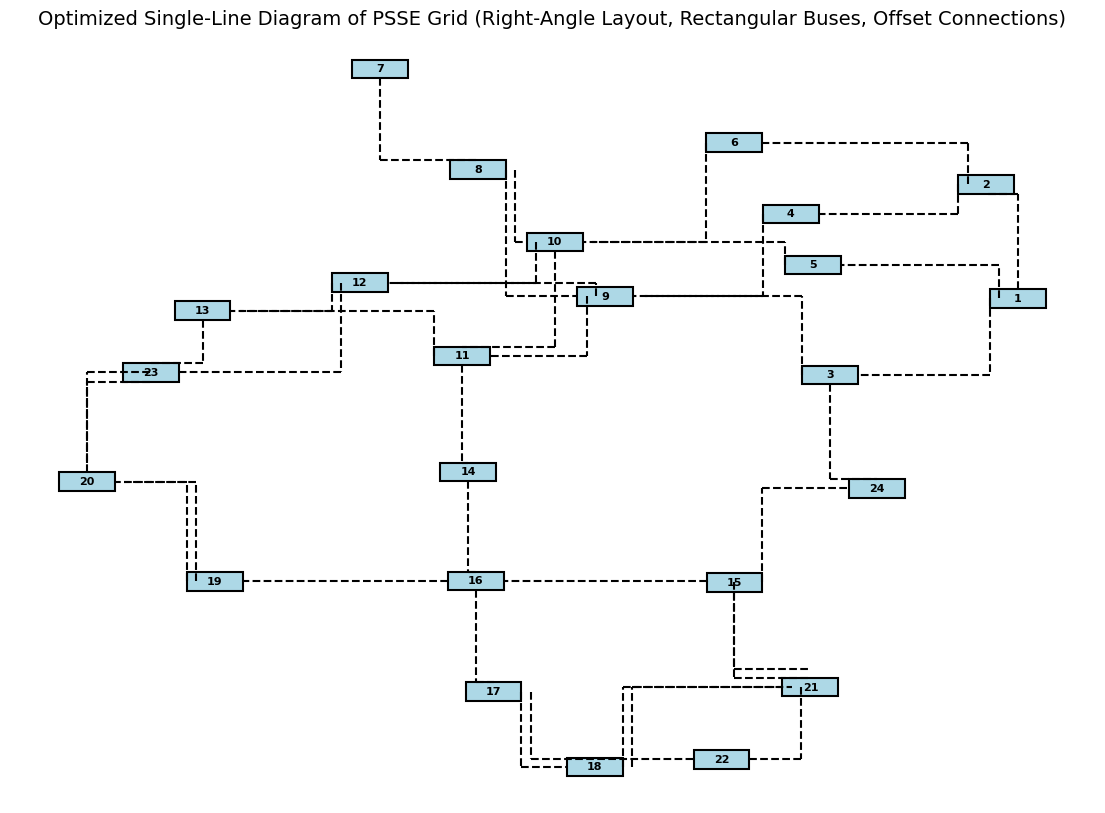

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04
    offset_step = 0.02  # Offset step for multiple lines

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {bus: {"top": [], "bottom": [], "left": [], "right": []} for bus in bus_numbers[0]}

    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus]["top"].append((x, y + node_height / 2))
        bus_connections[bus]["bottom"].append((x, y - node_height / 2))
        bus_connections[bus]["left"].append((x - node_width / 2, y))
        bus_connections[bus]["right"].append((x + node_width / 2, y))

    # Track the number of connections for proper offsets
    bus_connection_counts = {bus: {"top": 0, "bottom": 0, "left": 0, "right": 0} for bus in bus_numbers[0]}

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection points
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            side_from = "right" if x1 < x2 else "left"
            side_to = "left" if x1 < x2 else "right"
        else:  # Prefer vertical connection
            side_from = "top" if y1 < y2 else "bottom"
            side_to = "bottom" if y1 < y2 else "top"

        # Apply offset if multiple lines connect to the same side
        offset = bus_connection_counts[from_bus][side_from] * offset_step
        p1_x, p1_y = bus_connections[from_bus][side_from][0]
        p1_x += offset if side_from in ["left", "right"] else 0
        p1_y += offset if side_from in ["top", "bottom"] else 0
        bus_connection_counts[from_bus][side_from] += 1

        offset = bus_connection_counts[to_bus][side_to] * offset_step
        p2_x, p2_y = bus_connections[to_bus][side_to][0]
        p2_x += offset if side_to in ["left", "right"] else 0
        p2_y += offset if side_to in ["top", "bottom"] else 0
        bus_connection_counts[to_bus][side_to] += 1

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1_x, p2_y
        ax.plot([p1_x, mid_x], [p1_y, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2_x], [mid_y, p2_y], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:99: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


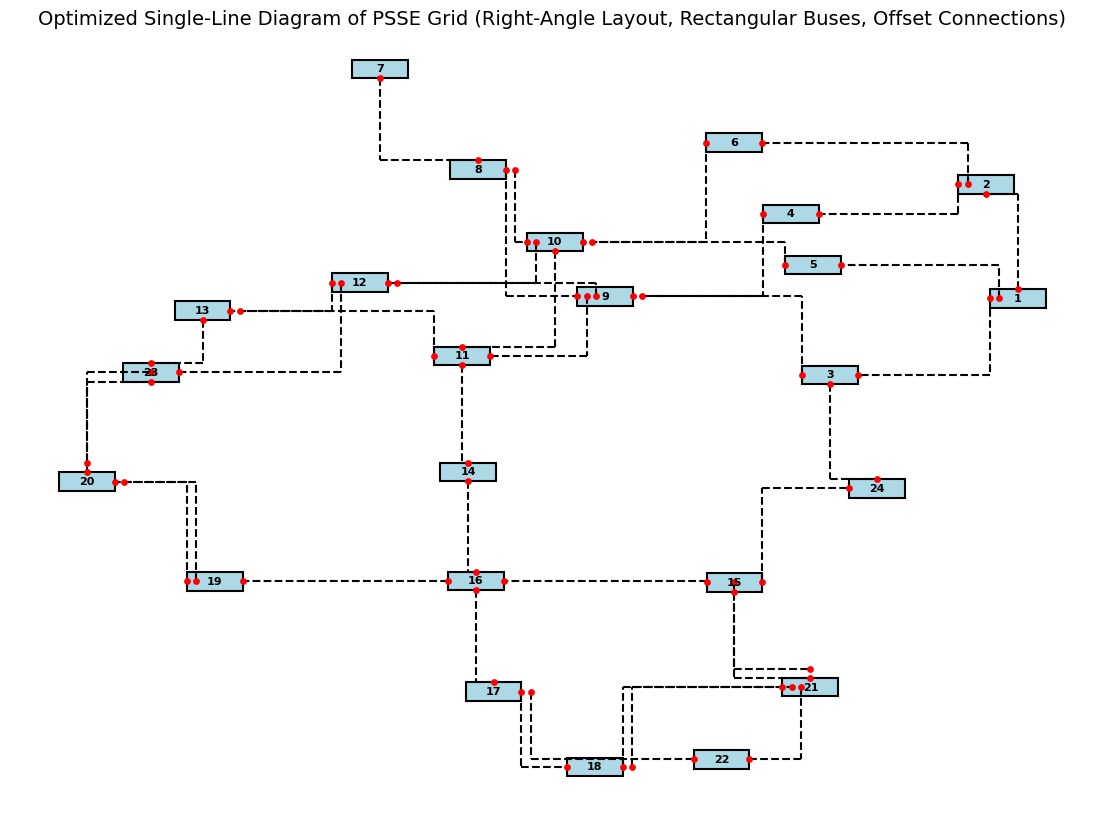

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04
    offset_step = 0.02  # Offset step for multiple lines

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {bus: {"top": [], "bottom": [], "left": [], "right": []} for bus in bus_numbers[0]}

    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus]["top"].append((x, y + node_height / 2))
        bus_connections[bus]["bottom"].append((x, y - node_height / 2))
        bus_connections[bus]["left"].append((x - node_width / 2, y))
        bus_connections[bus]["right"].append((x + node_width / 2, y))

    # Track the number of connections for proper offsets
    bus_connection_counts = {bus: {"top": 0, "bottom": 0, "left": 0, "right": 0} for bus in bus_numbers[0]}

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # Determine the best connection points
        if abs(x1 - x2) > abs(y1 - y2):  # Prefer horizontal connection
            side_from = "right" if x1 < x2 else "left"
            side_to = "left" if x1 < x2 else "right"
        else:  # Prefer vertical connection
            side_from = "top" if y1 < y2 else "bottom"
            side_to = "bottom" if y1 < y2 else "top"

        # Apply offset if multiple lines connect to the same side
        offset = bus_connection_counts[from_bus][side_from] * offset_step
        p1_x, p1_y = bus_connections[from_bus][side_from][0]
        p1_x += offset if side_from in ["left", "right"] else 0
        p1_y += offset if side_from in ["top", "bottom"] else 0
        bus_connection_counts[from_bus][side_from] += 1

        offset = bus_connection_counts[to_bus][side_to] * offset_step
        p2_x, p2_y = bus_connections[to_bus][side_to][0]
        p2_x += offset if side_to in ["left", "right"] else 0
        p2_y += offset if side_to in ["top", "bottom"] else 0
        bus_connection_counts[to_bus][side_to] += 1

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1_x, p2_y
        ax.plot([p1_x, mid_x], [p1_y, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2_x], [mid_y, p2_y], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

        # **Draw red dots at connection points for debugging**
        ax.scatter([p1_x, p2_x], [p1_y, p2_y], color='red', s=15, zorder=3)

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:107: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:108: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


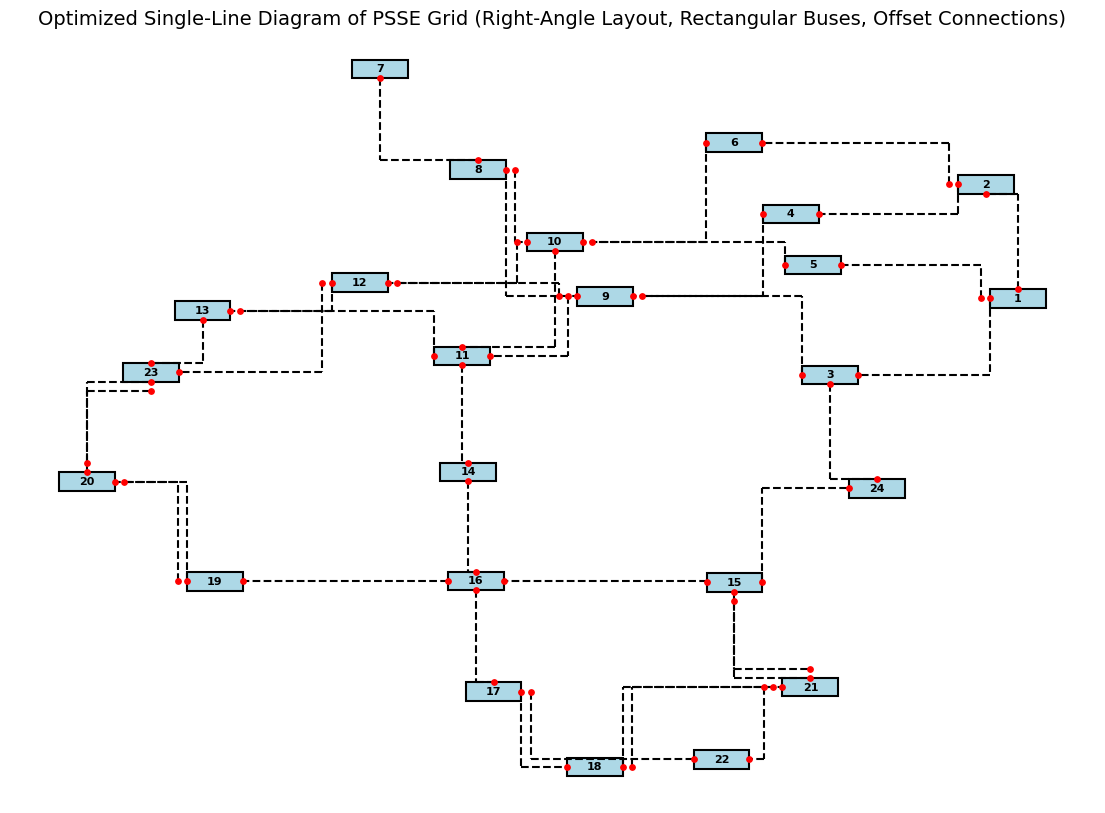

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    The layout is optimized to spread nodes evenly and use right-angle bends for edges,
    while ensuring bus connections do not overlap or pass through the buses.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()

    # Add bus nodes
    for bus in bus_numbers[0]:
        G.add_node(bus, label=f"Bus {bus}")

    # Add branch edges
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)  # Position nodes using Kamada-Kawai layout

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)

    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,  # Normalize X to [-1,1]
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5  # Scale Y for better spread
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better clarity

    # Bus node size
    node_width = 0.12
    node_height = 0.04
    offset_step = 0.02  # Offset step for multiple lines

    # Precompute connection points for each bus (top, bottom, left, right)
    bus_connections = {bus: {"top": [], "bottom": [], "left": [], "right": []} for bus in bus_numbers[0]}

    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus]["top"].append((x, y + node_height / 2))
        bus_connections[bus]["bottom"].append((x, y - node_height / 2))
        bus_connections[bus]["left"].append((x - node_width / 2, y))
        bus_connections[bus]["right"].append((x + node_width / 2, y))

    # Track the number of connections for proper offsets
    bus_connection_counts = {bus: {"top": 0, "bottom": 0, "left": 0, "right": 0} for bus in bus_numbers[0]}

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        # **Fix: Prefer vertical connections when buses are directly above/below each other**
        if abs(x1 - x2) < abs(y1 - y2):  # Vertical preferred
            side_from = "bottom" if y1 > y2 else "top"
            side_to = "top" if y1 > y2 else "bottom"
        else:  # Horizontal preferred
            side_from = "right" if x1 < x2 else "left"
            side_to = "left" if x1 < x2 else "right"

        # Apply offset if multiple lines connect to the same side
        offset_from = bus_connection_counts[from_bus][side_from] * offset_step
        offset_to = bus_connection_counts[to_bus][side_to] * offset_step

        # Adjust offsets properly
        if side_from in ["left", "right"]:
            p1_x, p1_y = bus_connections[from_bus][side_from][0]
            p1_x += (-1 if side_from == "left" else 1) * offset_from
        else:
            p1_x, p1_y = bus_connections[from_bus][side_from][0]
            p1_y += (-1 if side_from == "bottom" else 1) * offset_from

        if side_to in ["left", "right"]:
            p2_x, p2_y = bus_connections[to_bus][side_to][0]
            p2_x += (-1 if side_to == "left" else 1) * offset_to
        else:
            p2_x, p2_y = bus_connections[to_bus][side_to][0]
            p2_y += (-1 if side_to == "bottom" else 1) * offset_to

        bus_connection_counts[from_bus][side_from] += 1
        bus_connection_counts[to_bus][side_to] += 1

        # Right-angle connection (L-shape)
        mid_x, mid_y = p1_x, p2_y
        ax.plot([p1_x, mid_x], [p1_y, mid_y], 'k-', lw=1.5, linestyle="dashed")  # Vertical or horizontal segment
        ax.plot([mid_x, p2_x], [mid_y, p2_y], 'k-', lw=1.5, linestyle="dashed")  # Horizontal or vertical segment

        # **Draw red dots at connection points for debugging**
        ax.scatter([p1_x, p2_x], [p1_y, p2_y], color='red', s=15, zorder=3)

    # Draw bus nodes as rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    # Ensure perfect rectangles and circles by setting equal aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Right-Angle Layout, Rectangular Buses, Offset Connections)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:93: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:94: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


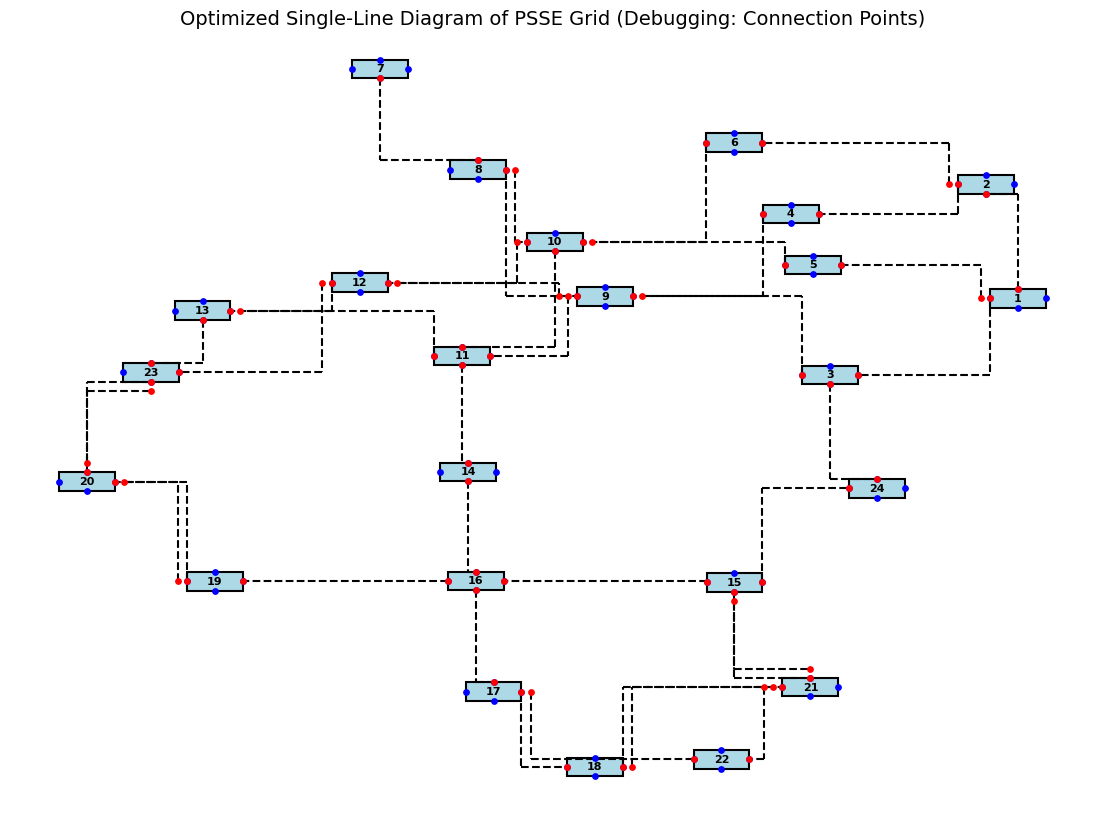

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    Adds debugging features:
      - Blue dots: Predefined bus connection points (top, bottom, left, right)
      - Red dots: Actual connection points where the lines touch the buses
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04
    offset_step = 0.02

    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }
        
        # Draw blue dots for predefined connection points
        for point in bus_connections[bus].values():
            ax.scatter(*point, color='blue', s=15, zorder=3)

    bus_connection_counts = {bus: {"top": 0, "bottom": 0, "left": 0, "right": 0} for bus in bus_numbers[0]}

    # Draw right-angle branch connections
    for from_bus, to_bus in zip(from_buses, to_buses):
        x1, y1 = pos[from_bus]
        x2, y2 = pos[to_bus]

        if abs(x1 - x2) < abs(y1 - y2):
            side_from = "bottom" if y1 > y2 else "top"
            side_to = "top" if y1 > y2 else "bottom"
        else:
            side_from = "right" if x1 < x2 else "left"
            side_to = "left" if x1 < x2 else "right"

        offset_from = bus_connection_counts[from_bus][side_from] * offset_step
        offset_to = bus_connection_counts[to_bus][side_to] * offset_step

        if side_from in ["left", "right"]:
            p1_x, p1_y = bus_connections[from_bus][side_from]
            p1_x += (-1 if side_from == "left" else 1) * offset_from
        else:
            p1_x, p1_y = bus_connections[from_bus][side_from]
            p1_y += (-1 if side_from == "bottom" else 1) * offset_from

        if side_to in ["left", "right"]:
            p2_x, p2_y = bus_connections[to_bus][side_to]
            p2_x += (-1 if side_to == "left" else 1) * offset_to
        else:
            p2_x, p2_y = bus_connections[to_bus][side_to]
            p2_y += (-1 if side_to == "bottom" else 1) * offset_to

        bus_connection_counts[from_bus][side_from] += 1
        bus_connection_counts[to_bus][side_to] += 1

        mid_x, mid_y = p1_x, p2_y
        ax.plot([p1_x, mid_x], [p1_y, mid_y], 'k-', lw=1.5, linestyle="dashed")
        ax.plot([mid_x, p2_x], [mid_y, p2_y], 'k-', lw=1.5, linestyle="dashed")
        
        # Draw red dots at actual connection points
        ax.scatter([p1_x, p2_x], [p1_y, p2_y], color='red', s=15, zorder=3)

    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Debugging: Connection Points)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:90: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:91: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


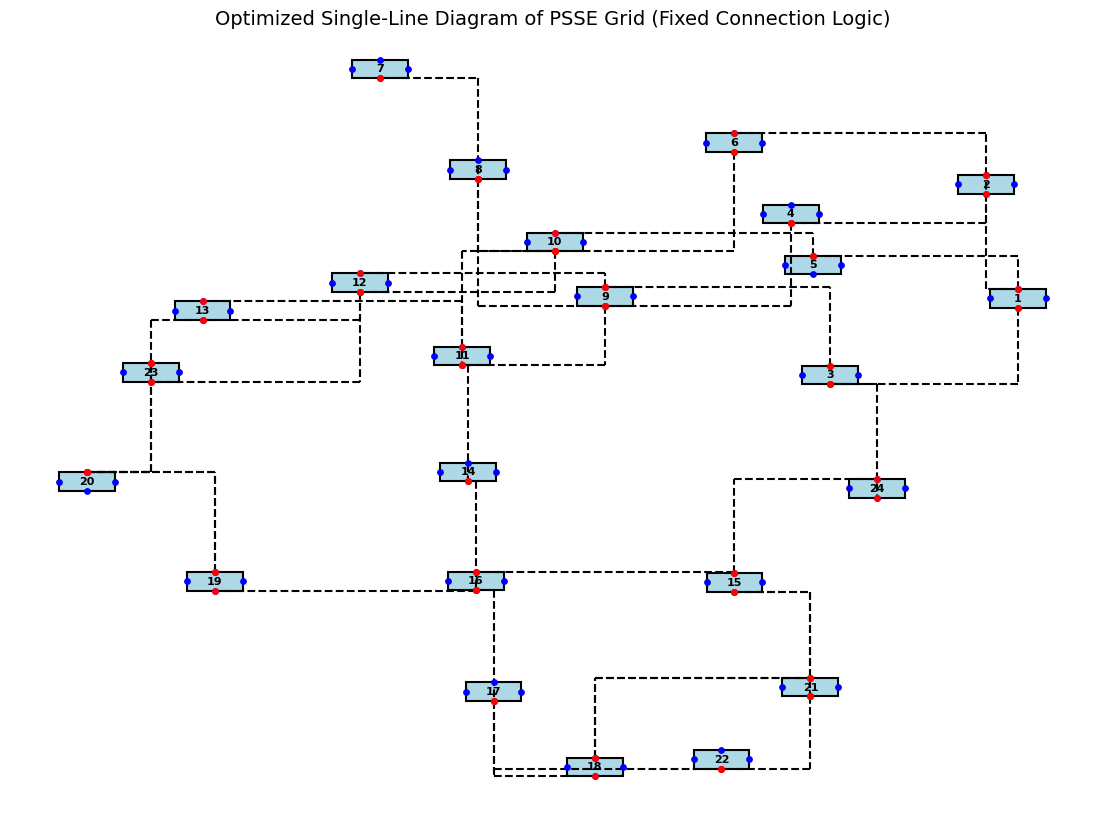

In [58]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle

def determine_best_connection(from_pos, to_pos, bus_connections, threshold=1.0):
    """
    Determines the best connection sides for a right-angle path between two buses.
    - If node is above another, use bottom-to-top
    - If node is below another, use top-to-bottom
    - If mostly aligned horizontally, use left-to-right
    """

    x1, y1 = from_pos
    x2, y2 = to_pos

    if abs(x1 - x2) < threshold:  # Nodes are vertically aligned
        if y1 > y2:
            return bus_connections["bottom"], bus_connections["top"]  # from bottom -> to top
        else:
            return bus_connections["top"], bus_connections["bottom"]  # from top -> to bottom
    else:  # Nodes are horizontally aligned
        if x1 < x2:
            return bus_connections["right"], bus_connections["left"]  # from right -> to left
        else:
            return bus_connections["left"], bus_connections["right"]  # from left -> to right

def viz():
    """
    Generate a structured single-line diagram of the PSSE grid using NetworkX.
    Uses a simple right-angle routing logic with correct vertical & horizontal paths.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

        # Debugging: Draw blue dots for predefined connection points
        for point in bus_connections[bus].values():
            ax.scatter(*point, color='blue', s=15, zorder=3)

    # Draw right-angle connections based on simple vertical/horizontal alignment
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        p1, p2 = determine_best_connection(from_pos, to_pos, bus_connections[from_bus])
        p3, p4 = determine_best_connection(to_pos, from_pos, bus_connections[to_bus])

        # Correct L-shape logic: Ensure a vertical/horizontal first segment before bending
        mid_x, mid_y = (p1[0], p4[1]) if abs(from_pos[0] - to_pos[0]) > abs(from_pos[1] - to_pos[1]) else (p4[0], p1[1])

        # Draw the right-angle connection
        ax.plot([p1[0], mid_x], [p1[1], mid_y], 'k-', lw=1.5, linestyle="dashed")
        ax.plot([mid_x, p4[0]], [mid_y, p4[1]], 'k-', lw=1.5, linestyle="dashed")

        # Debugging: Draw red dots where lines touch buses
        ax.scatter([p1[0], p4[0]], [p1[1], p4[1]], color='red', s=15, zorder=3)

    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Fixed Connection Logic)", fontsize=14)
    plt.show()

# Usage:
viz()

Connecting 1 (top) → 2 (bottom)
Routing from (1.0, 0.5274473279322021) to (0.9324250612914196, 0.7321687836449724)
Connecting 1 (left) → 3 (right)
Routing from (0.94, 0.507447327932202) to (0.6559281424015948, 0.34265535292340576)
Connecting 1 (left) → 5 (right)
Routing from (0.94, 0.507447327932202) to (0.6203971362703746, 0.5787258027881543)
Connecting 2 (left) → 4 (right)
Routing from (0.8724250612914195, 0.7521687836449724) to (0.5721585811148748, 0.6887916299337826)
Connecting 2 (left) → 6 (right)
Routing from (0.8724250612914195, 0.7521687836449724) to (0.4506911857866162, 0.841486638427589)
Connecting 3 (left) → 9 (right)
Routing from (0.5359281424015947, 0.34265535292340576) to (0.17319750196932787, 0.511706790820893)
Connecting 3 (bottom) → 24 (top)
Routing from (0.5959281424015948, 0.32265535292340575) to (0.6970549182983732, 0.11908723374670648)
Connecting 4 (left) → 9 (right)
Routing from (0.4521585811148748, 0.6887916299337826) to (0.17319750196932787, 0.511706790820893)
C

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:113: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


Connecting 16 (bottom) → 17 (top)
Routing from (-0.16497985780935098, -0.12010872422715911) to (-0.12665118795008967, -0.318262418173468)
Connecting 16 (left) → 19 (right)
Routing from (-0.22497985780935098, -0.10010872422715911) to (-0.6656296486593012, -0.10115125477231252)
Connecting 17 (right) → 18 (left)
Routing from (-0.06665118795008967, -0.338262418173468) to (0.03054533184479996, -0.5)
Connecting 17 (right) → 22 (left)
Routing from (-0.06665118795008967, -0.338262418173468) to (0.3032249171117803, -0.48361165378150356)
Connecting 18 (right) → 21 (left)
Routing from (0.15054533184479996, -0.5) to (0.49433673472942613, -0.3285572816705985)
Connecting 18 (right) → 21 (left)
Routing from (0.15054533184479996, -0.5) to (0.49433673472942613, -0.3285572816705985)
Connecting 19 (left) → 20 (right)
Routing from (-0.7856296486593013, -0.10115125477231252) to (-0.94, 0.11293329123643248)
Connecting 19 (left) → 20 (right)
Routing from (-0.7856296486593013, -0.10115125477231252) to (-0.94,

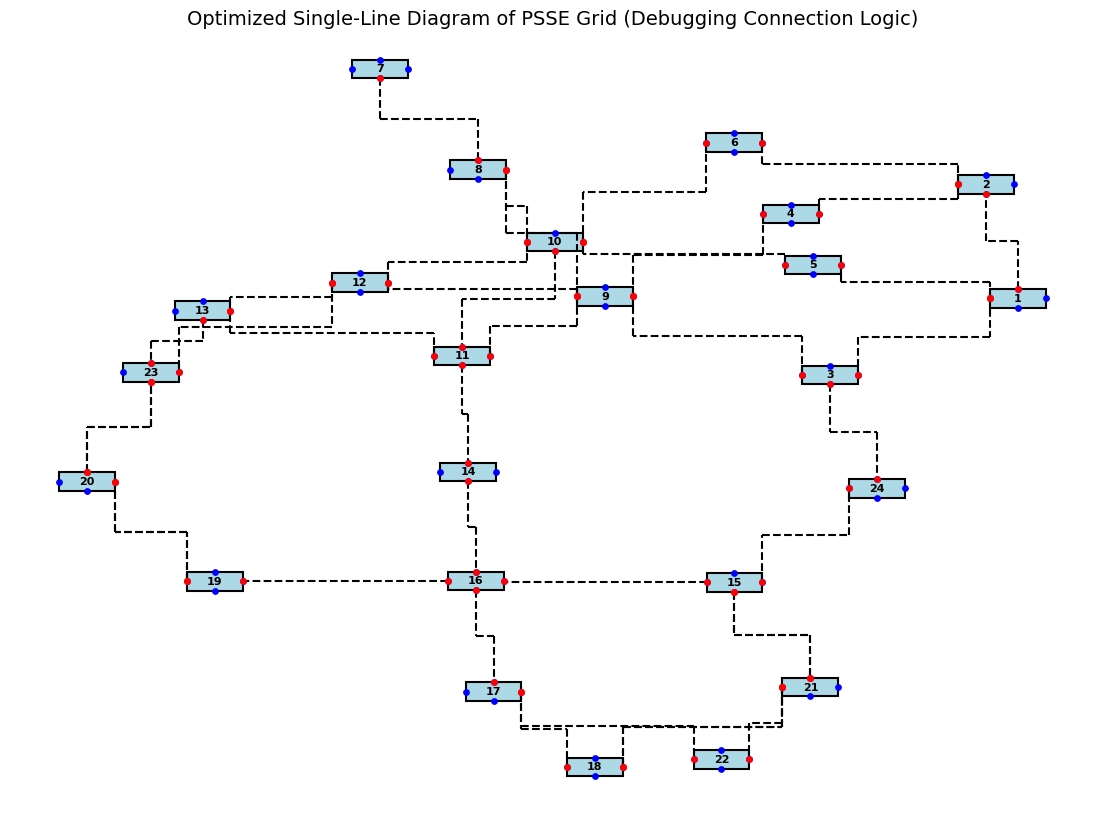

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle

def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points for a right-angle path between two buses.
    Ensures opposite connection points are always used.
    """
    x1, y1 = from_pos
    x2, y2 = to_pos

    # If mostly vertical movement, prefer top/bottom connections
    if abs(x1 - x2) < abs(y1 - y2):
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"
    else:  # If mostly horizontal movement, prefer left/right connections
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"

    # Debugging: Print connection decisions
    print(f"Connecting {from_bus} ({from_side}) → {to_bus} ({to_side})")

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side]

def route_line(p1, p2):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - One bend for simple vertical/horizontal movement.
    - Two bends for diagonal movement (Z-shape).
    - First bend: halfway in the Y-direction.
    - Second bend: halfway in the X-direction.
    """
    x1, y1 = p1
    x2, y2 = p2

    # Debugging print statement
    print(f"Routing from {p1} to {p2}")

    # One bend for aligned movements (horizontal/vertical)
    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    # Two bends for diagonal movements
    mid_y = (y1 + y2) / 2  # Midpoint in Y-direction first
    mid_x = (x1 + x2) / 2  # Midpoint in X-direction next

    return [p1, (x1, mid_y), (x2, mid_y), p2]  # Z-shaped route

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

        # Debugging: Draw blue dots for predefined connection points
        for point in bus_connections[bus].values():
            ax.scatter(*point, color='blue', s=15, zorder=3)

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        # Get connection points
        p1, p2 = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)

        # Get the correct right-angle routing path
        path = route_line(p1, p2)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

        # Debugging: Draw red dots where lines touch buses
        ax.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red', s=15, zorder=3)

    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Debugging Connection Logic)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:165: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


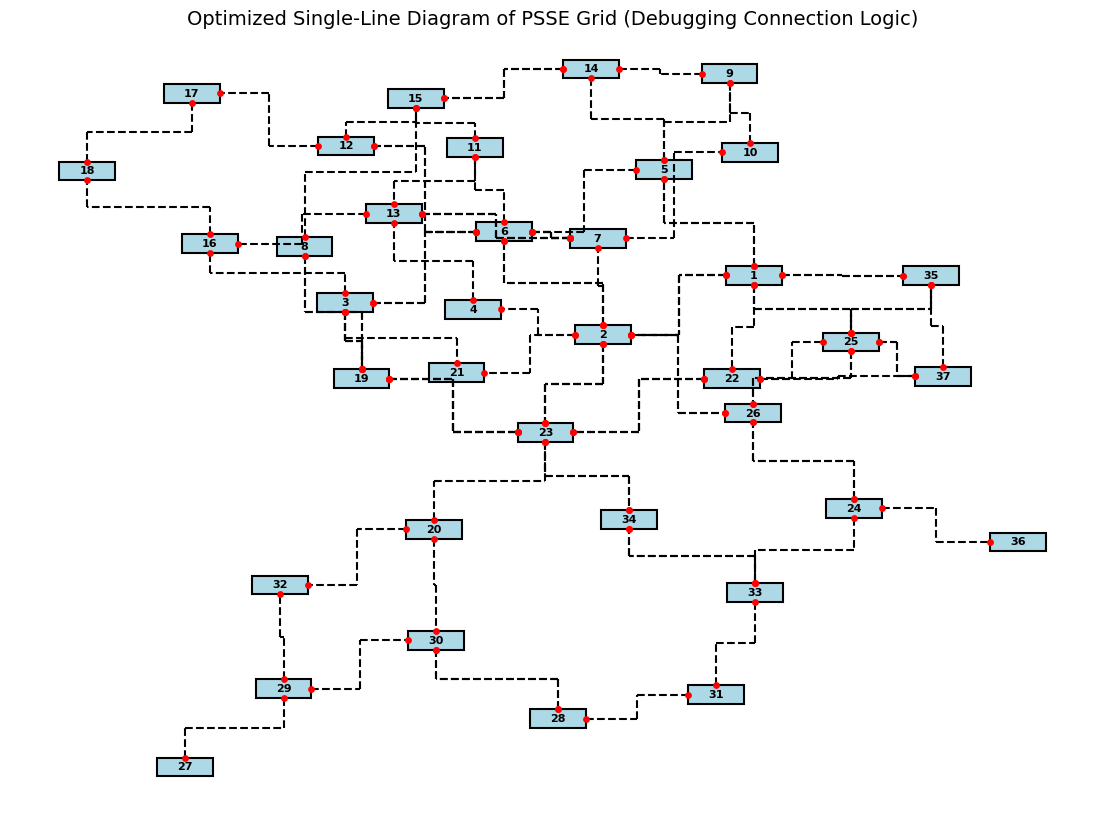

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle

# def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
#     """
#     Determines the best connection points based on relative positions and bus height.
#     Uses left/right if the buses are within one bus height vertically, otherwise top/bottom.
#     Ensures opposite connection points are always used.
#     """
#     tuner = 0.2
#     x1, y1 = from_pos
#     x2, y2 = to_pos
    
#     # Use left/right connections if buses are within one bus height in Y-axis
#     if abs(y1 - y2) < tuner:
#         from_side = "right" if x1 < x2 else "left"
#         to_side = "left" if x1 < x2 else "right"
#     else:  # Otherwise, use top/bottom connections
#         from_side = "bottom" if y1 > y2 else "top"
#         to_side = "top" if y1 > y2 else "bottom"

#     connection_type = f"{from_side}-{to_side}"
#     return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side],connection_type

def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points based on relative positions.
    Uses a two-step process:
    1) Determines general direction (horizontal vs. vertical)
    2) Chooses the best connection sides with tuners for fine adjustments.
    """

    # smaller value More strict: Only allows left/right if very close in y
    y_tuner = 0.1  # Helps decide when to use left/right over top/bottom
    
    # larger value More flexible: Allows bottom/left when x is small
    x_tuner = 0.3  # Helps decide when to use top/bottom over left/right

    x1, y1 = from_pos
    x2, y2 = to_pos

    # Determine general movement direction
    if abs(x1 - x2) > abs(y1 - y2):  # Mostly horizontal
        primary_connection = "horizontal"
    else:  # Mostly vertical
        primary_connection = "vertical"

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:  
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:  
        primary_connection = "vertical"

    # Assign correct connection points
    if primary_connection == "horizontal":
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"
    else:  # primary_connection == "vertical"
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side], f"{from_side}-{to_side}"


def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
        # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

        # # Debugging: Draw blue dots for predefined connection points
        # for point in bus_connections[bus].values():
        #     ax.scatter(*point, color='blue', s=15, zorder=3)

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        # Get connection points
        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)
        except KeyError:
            #print(f"Error: Could not determine connection sides for {from_bus} → {to_bus}. Skipping.")
            continue

        # Get the correct right-angle routing path
        path = route_line(p1, p2,ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

        # Debugging: Draw red dots where lines touch buses
        ax.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red', s=15, zorder=3)
        
        

    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

     # Draw load arrows and generator circles independently
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        
        # if bus in load_buses:
        #     ax.arrow(x, y - node_height / 2 - 0.02, 0, -0.03, head_width=0.02, head_length=0.02, fc='black', ec='black')
        
        # if bus in gen_buses:
        #     gen_y = y + node_height / 2 + 0.05
        #     gen_size = 0.02
        #     ax.plot([x, x], [y + node_height / 2, gen_y - gen_size], color='black', lw=2)
        #     ax.add_patch(Circle((x, gen_y), gen_size, color='none', ec='black', lw=1.5))
            
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Debugging Connection Logic)", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:215: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


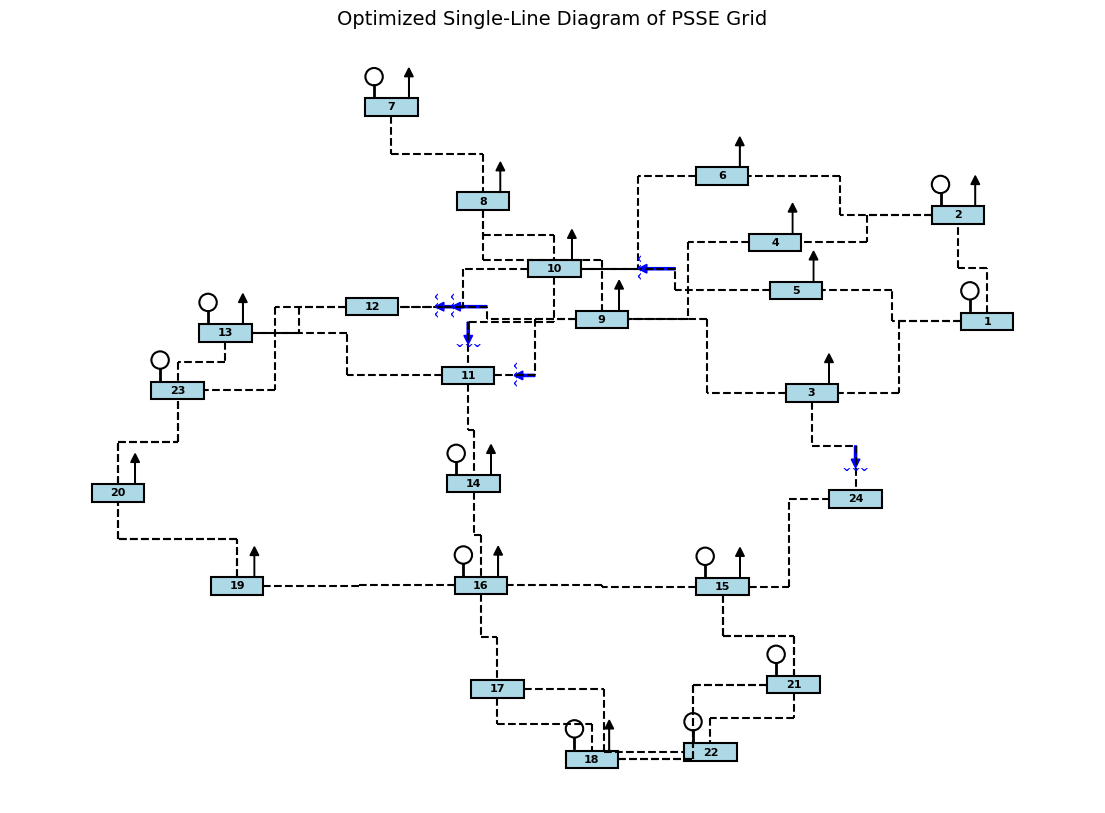

In [140]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow

def draw_transformer_arrow(ax, path):
    """
    Draws an arrow along the transformer connection path.
    The arrow direction follows the second movement segment.
    Adds "^^^" symbol above the arrow at the arrow tip.
    """
    if len(path) < 4:
        return  # Not enough points to draw an arrow

    # Select second segment for placing the arrow
    x1, y1 = path[2]
    x2, y2 = path[3]

    dx = (x2 - x1) * 0.3  # Scale down arrow length
    dy = (y2 - y1) * 0.3

    # **Compute arrow tip**
    arrow_tip_x = x1 + dx
    arrow_tip_y = y1 + dy

    # **Draw arrow**
    ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

    # **Place "^^^" symbol at arrow tip**
    if dy == 0:  # Horizontal transformer
        ax.text(arrow_tip_x - 0.01, arrow_tip_y + 0.008, "^^^", fontsize=8, fontweight="bold", ha='center', va='center',rotation=90, color='blue')
    else:  # Vertical transformer
        ax.text(arrow_tip_x - 0.005, arrow_tip_y - 0.01, "^^^", fontsize=8, fontweight="bold", ha='center', va='center', rotation=180, color='blue')
# def draw_transformer_arrow(ax, path):
#     """
#     Draws an arrow along the first segment of the transformer connection path.
#     The arrow direction follows the second movement segment.
#     Adds "^^^" symbol above the arrow.
#     """
#     if len(path) < 4:
#         return  # Not enough points to draw an arrow

#     # Second segment direction (placing the arrow here)
#     x1, y1 = path[2]
#     x2, y2 = path[3]

#     dx = (x2 - x1) * 0.3  # Scale down for proper arrow placement
#     dy = (y2 - y1) * 0.3

#     # Draw arrow
#     ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

#     # Place "^^^" symbol slightly above the arrow
#     text_offset_a = 0.005  # Adjust as needed
#     text_offset_b = 0.0  # Adjust as needed
#     if dy == 0:  # Horizontal transformer
#         ax.text(x1 + dx / 2 - 0.03, y1 + text_offset_a, "^^^", fontsize=8, fontweight="bold", ha='center', va='center',rotation=90)
#     else:  # Vertical transformer
#         ax.text(x1 + text_offset_b, y1 + dy / 2, "^^^", fontsize=8, fontweight="bold", ha='center', va='center', rotation=180)
        

# def draw_transformer_arrow(ax, path):
#     """
#     Draws an arrow along the first segment of the transformer connection path.
#     The arrow direction follows the first movement segment.
#     """
#     if len(path) < 2:
#         return  # Not enough points to draw an arrow

#     # 2nd segment direction
#     x1, y1 = path[2]
#     x2, y2 = path[3]
    
#     dx = (x2 - x1) * 0.3  # Scale down for proper arrow placement
#     dy = (y2 - y1) * 0.3

#     ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points based on relative positions.
    Uses tuners to fine-tune the choice between vertical (top/bottom) or horizontal (left/right).
    """

    y_tuner = 0.1  # More strict: Only allows left/right if very close in y
    x_tuner = 0.3  # More flexible: Allows bottom/left when x is small

    x1, y1 = from_pos
    x2, y2 = to_pos

    # Determine general movement direction
    if abs(x1 - x2) > abs(y1 - y2):  # Mostly horizontal
        primary_connection = "horizontal"
    else:  # Mostly vertical
        primary_connection = "vertical"

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:
        primary_connection = "vertical"

    # Assign correct connection points
    if primary_connection == "horizontal":
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"
    else:  # primary_connection == "vertical"
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side], f"{from_side}-{to_side}"


def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)


def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    Includes:
    - Loads (downward arrows)
    - Generators (circles above bus)
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")
            
        if (from_bus, to_bus) in xfmr_pairs or (to_bus, from_bus) in xfmr_pairs:
            draw_transformer_arrow(ax, path)  # Attach arrow to 2nd segment of the path
            #draw_transformer_marker(ax, path)  # Attach diamond marker to midpoint of the path

    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

        # Draw loads (right-offset downward arrows)
        # if bus in load_buses:
        #     ax.arrow(x + node_width / 2 - 0.02, y - 0.02, 0, -0.05, head_width=0.02, head_length=0.02, fc='black', ec='black')
        
        # Draw loads (right-offset downward arrows)
        if bus in load_buses:
            ax.arrow(x + node_width / 2 - 0.02, y + 0.02, 0, 0.05, head_width=0.02, head_length=0.02, fc='black', ec='black')

        # Draw generators (left-offset circles above bus)
        if bus in gen_buses:
            gen_x = x - node_width / 2 + 0.02  # Move generator left
            gen_y = y + node_height / 2 + 0.05
            gen_size = 0.02
            ax.plot([gen_x, gen_x], [y + node_height / 2 + 0.005, gen_y - gen_size ], color='black', lw=2)
            ax.add_patch(Circle((gen_x, gen_y), gen_size, color='none', ec='black', lw=1.5))
    
   


    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:142: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


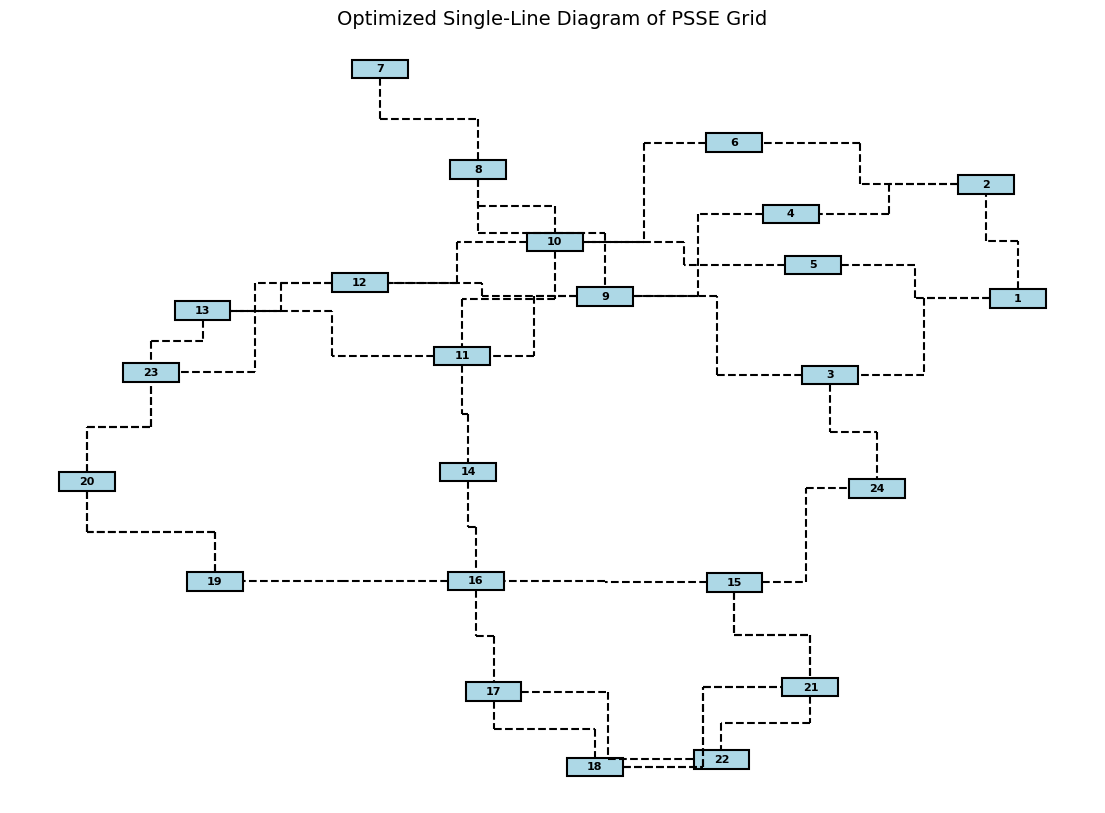

In [147]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow

def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections):
    """
    Determines the best connection points based on relative positions.
    Uses tuners to fine-tune the choice between vertical (top/bottom) or horizontal (left/right).
    """

    y_tuner = 0.1  # More strict: Only allows left/right if very close in y
    x_tuner = 0.3  # More flexible: Allows bottom/left when x is small

    x1, y1 = from_pos
    x2, y2 = to_pos

    # Determine general movement direction
    if abs(x1 - x2) > abs(y1 - y2):  # Mostly horizontal
        primary_connection = "horizontal"
    else:  # Mostly vertical
        primary_connection = "vertical"

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:
        primary_connection = "vertical"

    # Assign correct connection points
    if primary_connection == "horizontal":
        from_side = "right" if x1 < x2 else "left"
        to_side = "left" if x1 < x2 else "right"
    else:  # primary_connection == "vertical"
        from_side = "bottom" if y1 > y2 else "top"
        to_side = "top" if y1 > y2 else "bottom"

    return bus_connections[from_bus][from_side], bus_connections[to_bus][to_side], f"{from_side}-{to_side}"


def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)


def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    Includes:
    - Loads (downward arrows)
    - Generators (circles above bus)
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store predefined connection points for each bus
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")
            
    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')


    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid", fontsize=14)
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:223: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


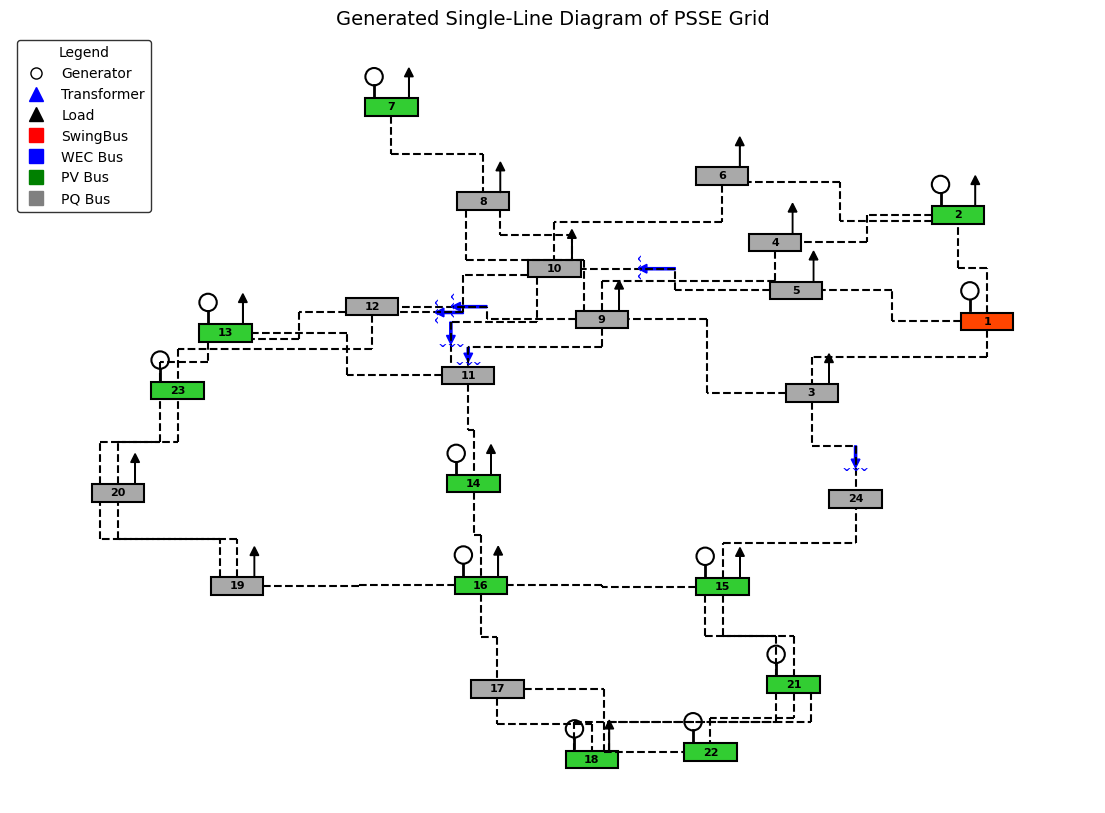

In [188]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow
from matplotlib.lines import Line2D



def draw_transformer_arrow(ax, path):
    """
    Draws an arrow along the transformer connection path.
    The arrow direction follows the second movement segment.
    Adds "^^^" symbol above the arrow at the arrow tip.
    """
    if len(path) < 4:
        return  # Not enough points to draw an arrow

    # Select second segment for placing the arrow
    x1, y1 = path[2]
    x2, y2 = path[3]

    dx = (x2 - x1) * 0.3  # Scale down arrow length
    dy = (y2 - y1) * 0.3

    # **Compute arrow tip**
    arrow_tip_x = x1 + dx
    arrow_tip_y = y1 + dy

    # **Draw arrow**
    ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='blue'))

    # **Place "^^^" symbol at arrow tip**
    if dy == 0:  # Horizontal transformer
        ax.text(arrow_tip_x - 0.01, arrow_tip_y + 0.008, "^^^", fontsize=8, fontweight="bold", ha='center', va='center',rotation=90, color='blue')
    else:  # Vertical transformer
        ax.text(arrow_tip_x - 0.005, arrow_tip_y - 0.01, "^^^", fontsize=8, fontweight="bold", ha='center', va='center', rotation=180, color='blue')
        


def determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections):
    """
    Determines the best connection points for a given bus pair while avoiding overlapping connections.
    - Uses x and y positions to determine if the connection is horizontal (left/right) or vertical (top/bottom).
    - Selects an available connection within that side (inner, middle, outer) to reduce overlap.
    """

    y_tuner = 0.1  # Controls how strict we are about vertical vs. horizontal
    x_tuner = 0.48  # Controls how strict we are about left/right priority

    x1, y1 = from_pos
    x2, y2 = to_pos

    # --- Step 1: Determine primary connection direction ---
    if abs(x1 - x2) > abs(y1 - y2):  
        primary_connection = "horizontal"  # Mostly horizontal movement
    else:  
        primary_connection = "vertical"  # Mostly vertical movement

    # Adjust with tuners
    if abs(y1 - y2) < y_tuner:
        primary_connection = "horizontal"
    elif abs(x1 - x2) < x_tuner:
        primary_connection = "vertical"

    # --- Step 2: Determine connection points ---
    if primary_connection == "horizontal":
        if x1 < x2:  # Moving left → right
            from_side = "right"
            to_side = "left"
        else:  # Moving right → left
            from_side = "left"
            to_side = "right"
    else:  # Vertical Connection
        if y1 > y2:  # Moving top → bottom
            from_side = "bottom"
            to_side = "top"
        else:  # Moving bottom → top
            from_side = "top"
            to_side = "bottom"

    # **Select the best available connection point within the side**
    for priority in ["middle", "inner", "outer"]:  # Prioritize middle, then fallback
        from_point_key = f"{from_side}_{priority}"
        to_point_key = f"{to_side}_{priority}"

        if from_point_key not in used_connections[from_bus] and to_point_key not in used_connections[to_bus]:
            used_connections[from_bus].add(from_point_key)
            used_connections[to_bus].add(to_point_key)
            return bus_connections[from_bus][from_point_key], bus_connections[to_bus][to_point_key], f"{from_side}-{to_side}"

    # Fallback (shouldn't reach here unless something is wrong)
    return bus_connections[from_bus]["right_middle"], bus_connections[to_bus]["left_middle"], "fallback"




def route_line(p1, p2, connection_type):
    """
    Creates an L-shaped or Z-shaped path between two points using right-angle bends.
    - Left/Right: Midpoint in X first, then Y.
    - Top/Bottom: Midpoint in Y first, then X.
    """
    x1, y1 = p1
    x2, y2 = p2

    if x1 == x2 or y1 == y2:
        return [p1, p2]  # Direct connection

    if connection_type in ["left-right", "right-left"]:
        mid_x = (x1 + x2) / 2  # First bend in X direction
        return [p1, (mid_x, y1), (mid_x, y2), p2]  # Two bends: X first, then Y

    elif connection_type in ["top-bottom", "bottom-top"]:
        mid_y = (y1 + y2) / 2  # First bend in Y direction
        return [p1, (x1, mid_y), (x2, mid_y), p2]  # Two bends: Y first, then X

    return [p1, p2]  # Default (fallback)

def get_bus_color(bus_type):
    """ Returns the color for a given bus type. """
    color_map = {
        1: "#A9A9A9",  # Gray
        2: "#32CD32",  # Green
        3: "#FF4500",  # Red
        4: "#1E90FF",  # Blue
    }
    return color_map.get(bus_type, "#D3D3D3")  # Default light gray if undefined

def viz():
    """
    Generates a structured single-line diagram with correct bus connection logic and predictable bends.
    Includes:
    - Loads (downward arrows)
    - Generators (circles above bus)
    """

    # --- Step 1: Extract Bus, Load, and Generator Data ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, load_buses = psspy.aloadint(-1, 1, "NUMBER")  # Correct API for loads
    ierr, gen_buses = psspy.amachint(-1, 4, "NUMBER")  # Correct API for generators
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Convert lists to sets for quick lookup
    load_buses = set(load_buses[0]) if load_buses[0] else set()
    gen_buses = set(gen_buses[0]) if gen_buses[0] else set()

    # --- Step 2: Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Step 3: Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions for even spacing
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Step 4: Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

       # Store predefined connection points for each bus
    bus_connections = {}
    used_connections = {bus: set() for bus in bus_numbers[0]}  # Track used connections
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            # Left side (3 points)
            "left_inner": (x - node_width / 2, y - node_height / 3),
            "left_middle": (x - node_width / 2, y),
            "left_outer": (x - node_width / 2, y + node_height / 3),

            # Right side (3 points)
            "right_inner": (x + node_width / 2, y - node_height / 3),
            "right_middle": (x + node_width / 2, y),
            "right_outer": (x + node_width / 2, y + node_height / 3),

            # Top side (3 points)
            "top_inner": (x - node_width / 3, y + node_height / 2),
            "top_middle": (x, y + node_height / 2),
            "top_outer": (x + node_width / 3, y + node_height / 2),

            # Bottom side (3 points)
            "bottom_inner": (x - node_width / 3, y - node_height / 2),
            "bottom_middle": (x, y - node_height / 2),
            "bottom_outer": (x + node_width / 3, y - node_height / 2),
        }

    # Draw right-angle connections based on simplified logic
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections, used_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path segments
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")
        
        if (from_bus, to_bus) in xfmr_pairs or (to_bus, from_bus) in xfmr_pairs:
            draw_transformer_arrow(ax, path)  # Attach arrow to 2nd segment of the path
            #draw_transformer_marker(ax, path)  # Attach diamond marker to midpoint of the path

            
    # Draw bus rectangles
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_color = get_bus_color(bus_types[0][bus_numbers[0].index(bus)])
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor=bus_color)
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

        # Draw loads (right-offset downward arrows)
        if bus in load_buses:
            ax.arrow(x + node_width / 2 - 0.02, y + 0.02, 0, 0.05, head_width=0.02, head_length=0.02, fc='black', ec='black')

        # Draw generators (left-offset circles above bus)
        if bus in gen_buses:
            gen_x = x - node_width / 2 + 0.02  # Move generator left
            gen_y = y + node_height / 2 + 0.05
            gen_size = 0.02
            ax.plot([gen_x, gen_x], [y + node_height / 2 + 0.005, gen_y - gen_size ], color='black', lw=2)
            ax.add_patch(Circle((gen_x, gen_y), gen_size, color='none', ec='black', lw=1.5))
    
   


    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Generated Single-Line Diagram of PSSE Grid", fontsize=14)
    # Define legend elements
    legend_elements = [
        Line2D([0], [0], marker='o', color='black', markersize=8, label="Generator", markerfacecolor='none', markeredgecolor='black', lw=0),
        Line2D([0], [0], marker=('^'), color='blue', markersize=10, label="Transformer", markerfacecolor='blue', lw=0),
        Line2D([0], [0], marker='^', color='black', markersize=10, label="Load", markerfacecolor='black', lw=0),
        Line2D([0], [0], marker='s', color='red', markersize=10, label="SwingBus", markerfacecolor='red', lw=0),
        Line2D([0], [0], marker='s', color='blue', markersize=10, label="WEC Bus", markerfacecolor='blue', lw=0),
        Line2D([0], [0], marker='s', color='green', markersize=10, label="PV Bus", markerfacecolor='green', lw=0),
        Line2D([0], [0], marker='s', color='gray', markersize=10, label="PQ Bus", markerfacecolor='gray', lw=0),
    ]

    # Add the legend at the bottom-right
    ax.legend(handles=legend_elements, loc="upper left", fontsize=10, frameon=True, edgecolor='black', title="Legend")
    plt.show()

# Usage:
viz()

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:85: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


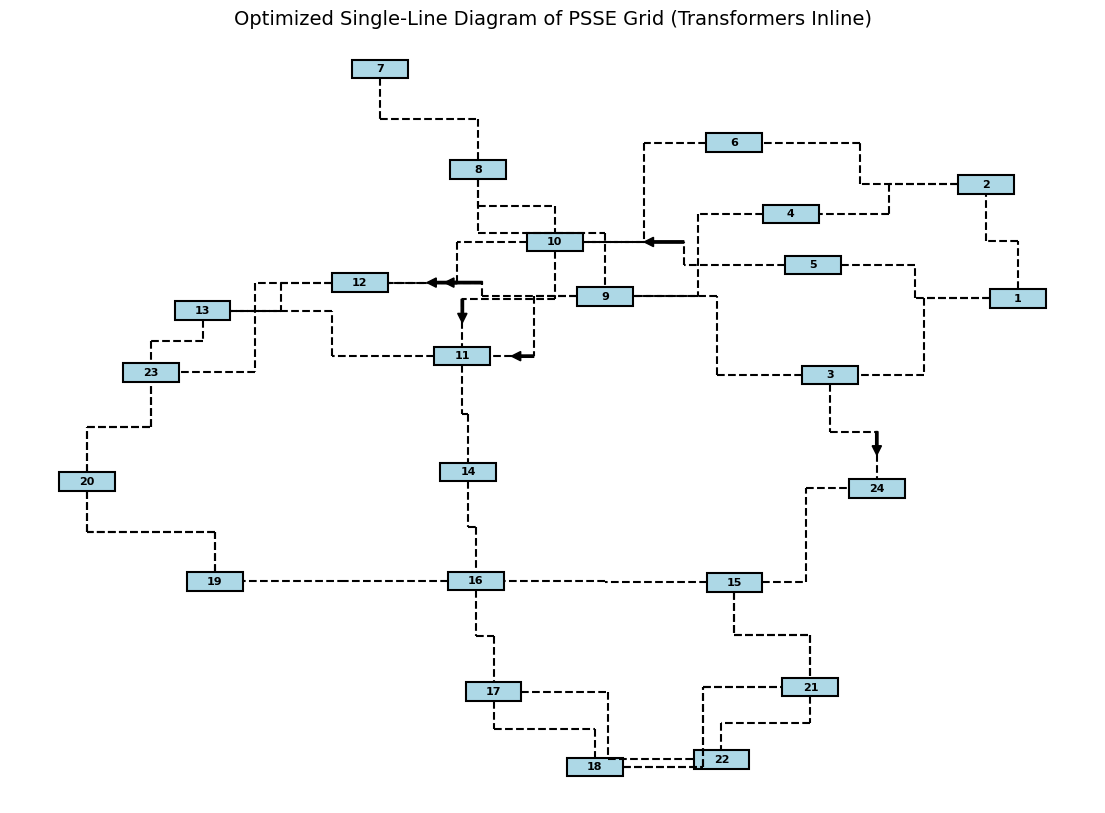

In [87]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow

def draw_transformer_arrow(ax, path):
    """
    Draws an arrow along the first segment of the transformer connection path.
    The arrow direction follows the first movement segment.
    """
    if len(path) < 2:
        return  # Not enough points to draw an arrow

    # 2nd segment direction
    x1, y1 = path[2]
    x2, y2 = path[3]
    
    dx = (x2 - x1) * 0.3  # Scale down for proper arrow placement
    dy = (y2 - y1) * 0.3

    ax.add_patch(FancyArrow(x1, y1, dx, dy, width=0.005, head_width=0.02, head_length=0.02, color='black'))

def viz():
    """Generates a structured single-line diagram with transformers drawn inline along the connection lines."""
    
    # --- Extract Data from PSSE ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, bus_types = psspy.abusint(-1, 1, "TYPE")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(
        sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"]
    )
    xfmr_pairs = set(zip(xfmr_from_buses, xfmr_to_buses))

    # Build Graph
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # Compute Layout
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store connection points
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # Draw bus connections and inline transformers
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

        # Draw transformer arrow if it's a transformer
        if (from_bus, to_bus) in xfmr_pairs or (to_bus, from_bus) in xfmr_pairs:
            draw_transformer_arrow(ax, path)  # Attach arrow to first segment of the path

    # Draw buses
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')
        

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Transformers Inline)", fontsize=14)
    plt.show()

# Usage:
viz()

In [78]:
ierr, (xfmr_from_buses, xfmr_to_buses, xfmr_owners, xfmr_from_stations, xfmr_to_stations, a,b) = psspy.atrnint(
    sid=-1, owner=1, ties=3, flag=2, entry=1, 
    string=["FROMNUMBER", "TONUMBER", "OWNERS", "FROMSTATION", "TOSTATION","METERNUMBER","NMETERNUMBER"]
)
a

[24, 5, 11, 9, 11, 12]

c:\Users\alexb\miniconda3\envs\happy\lib\site-packages\ipykernel_launcher.py:89: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.


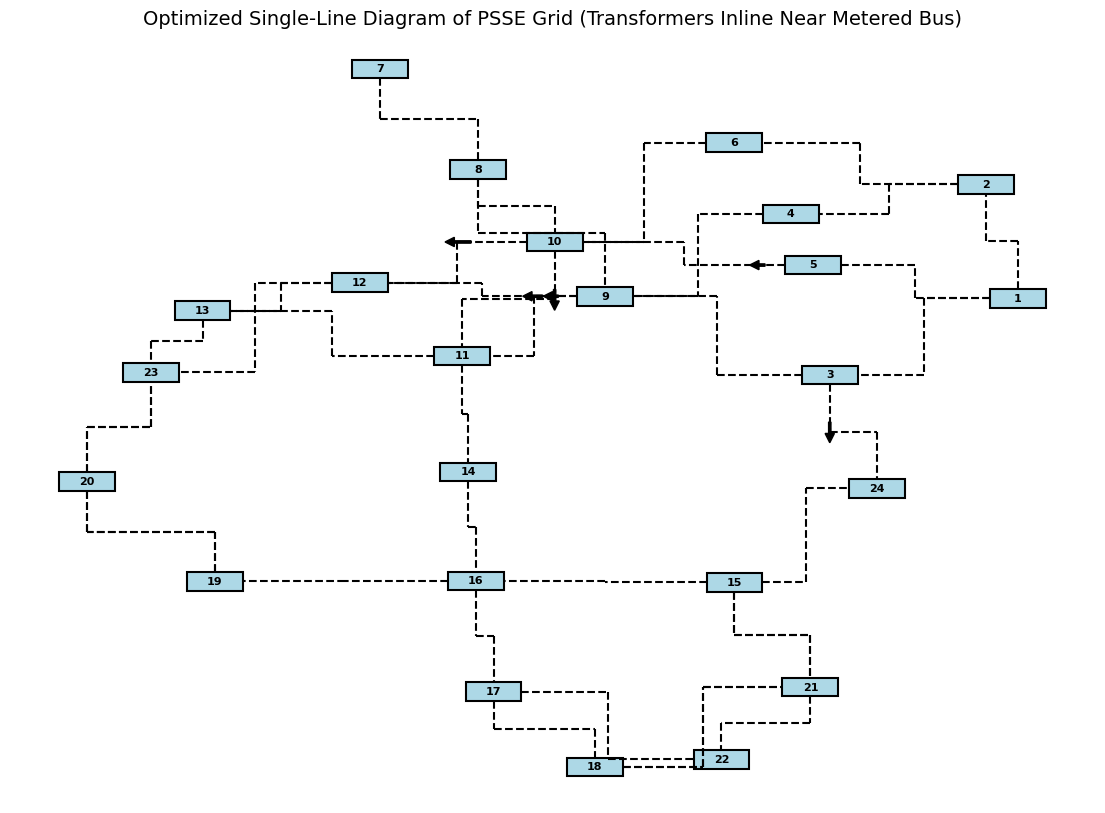

In [81]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Rectangle, Circle, FancyArrow

def draw_transformer_arrow(ax, path, metered_near_start=True):
    """
    Draws an arrow along the first segment of the transformer connection path.
    The arrow is placed near the **metered bus**.
    """
    if len(path) < 2:
        return  # Not enough points to draw an arrow

    # Select first segment for placement
    x1, y1 = path[0]
    x2, y2 = path[1]
    
    # Offset factor determines if it's closer to start or end
    offset_factor = 0.2 if metered_near_start else 0.8
    dx = (x2 - x1) * offset_factor  
    dy = (y2 - y1) * offset_factor  

    ax.add_patch(FancyArrow(x1 + dx, y1 + dy, dx * 0.3, dy * 0.3, 
                            width=0.005, head_width=0.02, head_length=0.02, color='black'))

def viz():
    """Generates a structured single-line diagram with transformers drawn inline along the connection lines."""
    
    # --- Extract Data from PSSE ---
    ierr, bus_numbers = psspy.abusint(-1, 1, "NUMBER")
    ierr, (from_buses, to_buses) = psspy.abrnint(sid=-1, flag=3, string=["FROMNUMBER", "TONUMBER"])
    
    # Extract transformers and their metered bus locations
    ierr, (xfmr_from_buses, xfmr_to_buses) = psspy.atrnint(sid=-1, owner=1, ties=3, flag=2, entry=1, string=["FROMNUMBER", "TONUMBER"])
    ierr, (xfmr_metered, xfmr_non_metered) = psspy.atrnint(sid=-1, owner=1, ties=3, flag=2, entry=1, string=["METERNUMBER", "NMETERNUMBER"])

    xfmr_pairs = {(xfmr_from_buses[i], xfmr_to_buses[i]): xfmr_metered[i] for i in range(len(xfmr_from_buses))}

    # --- Build Graph Representation ---
    G = nx.Graph()
    for bus in bus_numbers[0]:
        G.add_node(bus)
    for from_bus, to_bus in zip(from_buses, to_buses):
        G.add_edge(from_bus, to_bus)

    # --- Compute Layout ---
    pos = nx.kamada_kawai_layout(G)

    # Normalize positions
    pos_values = np.array(list(pos.values()))
    x_vals, y_vals = pos_values[:, 0], pos_values[:, 1]
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    for node in pos:
        pos[node] = (
            2 * (pos[node][0] - x_min) / (x_max - x_min) - 1,
            1.5 * (pos[node][1] - y_min) / (y_max - y_min) - 0.5
        )

    # --- Create Visualization ---
    fig, ax = plt.subplots(figsize=(14, 10))
    node_width, node_height = 0.12, 0.04

    # Store connection points
    bus_connections = {}
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        bus_connections[bus] = {
            "top": (x, y + node_height / 2),
            "bottom": (x, y - node_height / 2),
            "left": (x - node_width / 2, y),
            "right": (x + node_width / 2, y)
        }

    # --- Draw bus connections and inline transformers ---
    for from_bus, to_bus in zip(from_buses, to_buses):
        from_pos = pos[from_bus]
        to_pos = pos[to_bus]

        try:
            p1, p2, ctype = determine_connection_sides(from_bus, to_bus, from_pos, to_pos, bus_connections)
        except KeyError:
            continue

        path = route_line(p1, p2, ctype)

        # Draw path
        for i in range(len(path) - 1):
            ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")

        # Draw transformer arrow if it's a transformer
        if (from_bus, to_bus) in xfmr_pairs or (to_bus, from_bus) in xfmr_pairs:
            metered_bus = xfmr_pairs.get((from_bus, to_bus), from_bus)
            metered_near_start = (metered_bus == from_bus)
            draw_transformer_arrow(ax, path, metered_near_start)

    # --- Draw Bus Rectangles ---
    for bus in bus_numbers[0]:
        x, y = pos[bus]
        rect = Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                         linewidth=1.5, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x, y, str(bus), fontsize=8, fontweight="bold", ha='center', va='center')

    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title("Optimized Single-Line Diagram of PSSE Grid (Transformers Inline Near Metered Bus)", fontsize=14)
    plt.show()

# Usage:
viz()

In [82]:
ierr, (xfmr_from_buses, xfmr_to_buses, xfmr_owners, xfmr_from_stations, xfmr_to_stations, a,b) = psspy.atrnint(
    sid=-1, owner=1, ties=3, flag=2, entry=1, 
    string=["FROMNUMBER", "TONUMBER", "OWNERS", "FROMSTATION", "TOSTATION","METERNUMBER","NMETERNUMBER"]
)
print(a)
print(b)

[24, 5, 11, 9, 11, 12]
[3, 10, 9, 12, 10, 10]


In [41]:
psspy.atrnint??

Signature:
psspy.atrnint(
    sid=None,
    owner=None,
    ties=None,
    flag=None,
    entry=None,
    string=None,
    **kwds,
)
Docstring:
Use this API to return an array of integer values for subsystem two-winding transformers.

This API routine was first introduced in release 30.2.0.

Python syntax:
    ierr, iarray = atrnint(sid, owner, ties, flag, entry, string)

Arguments:
    SID (integer): Defines the bus subsystem to be used. (input; -1 by default).

    OWNER (integer): A flag indicating owner usage if ownership is a subsystem selection
        criterion (ignored if sid is negative). (input; 1 by default).

    TIES (integer): A flag indicating which subsystem two-winding transformers to include
        (ignored if sid is negative). (input; 1 by default).

    FLAG (integer): A flag indicating which subsystem two-winding transformers to include.
        (input; 1 by default).

    ENTRY (integer): A flag indicating organization. (input; 1 by default).

    STRING (charact

In [8]:
 ierr, mismatch_values = psspy.abusreal(-1, 2, "MISMATCH")
 mismatch_values

[[1.1920928955078125e-05,
  0.0,
  1.1920928955078125e-05,
  6.664001830358757e-06,
  0.0,
  6.365778972394764e-06,
  0.0,
  1.3431724710244453e-06,
  6.365778972394764e-06,
  1.2287812751310412e-05,
  0.0,
  2.9802322387695312e-06,
  0.0,
  1.2013700143143069e-05,
  2.9802322387695312e-06,
  1.81280447577592e-05,
  5.9604644775390625e-06,
  0.0,
  7.450580596923828e-07,
  5.972094641037984e-06,
  2.4027400286286138e-05,
  1.1920928955078125e-05,
  7.450580596923828e-07,
  0.0]]

In [11]:
bus_parameter = "MISMATCH"
psspy.abusreal(-1, string=bus_parameter)

(0,
 [[1.1920928955078125e-05,
   0.0,
   1.1920928955078125e-05,
   6.664001830358757e-06,
   0.0,
   6.365778972394764e-06,
   0.0,
   1.3431724710244453e-06,
   6.365778972394764e-06,
   1.2287812751310412e-05,
   0.0,
   2.9802322387695312e-06,
   0.0,
   1.2013700143143069e-05,
   2.9802322387695312e-06,
   1.81280447577592e-05,
   5.9604644775390625e-06,
   0.0,
   7.450580596923828e-07,
   5.972094641037984e-06,
   2.4027400286286138e-05,
   1.1920928955078125e-05,
   7.450580596923828e-07,
   0.0]])

In [14]:
ierr, pg_list = psspy.amachreal(-1, 1,"PGEN")
print(pg_list[0])
ierr, qg_list = psspy.amachreal(-1, 1,"QGEN")
print(qg_list[0])


[35.93006896972656, 67.0, 64.0, 200.0, 0.0, 274.0, 245.0, 144.0, 294.0, 150.0, 200.0]
[180.48858642578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 199.4558563232422, 0.0]


In [4]:
psspy.bus_data_2(2, flag=2)


 Keyword arguments not used: flag=2

 No power flow data changed for bus 2 [2           138.00]


0

In [4]:

# Bus information
ibus = 25
inode = 0
bus_name = "TESTBUS"

# Step 1: Add the bus
intgar_bus = [1, 1, 1, 1]
#realar_bus = [0.0, 1.0, 0.0, 1.1, 0.9, 1.1, 0.9]
realar_bus = [230.0, 1.0, 0.0, 1.1, 0.9, 1.1, 0.9]
ierr = psspy.bus_data_4(ibus, inode, intgar_bus, realar_bus, bus_name)
if ierr == 0:
    print(f"Bus {ibus} added successfully.")
else:
    print(f"Error adding bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Step 2: Add plant data
intgar_plant = [0, 0]
realar_plant = [1.0, 100.0]
ierr = psspy.plant_data_4(ibus, inode, intgar_plant, realar_plant)
if ierr == 0:
    print(f"Plant data added successfully to bus {ibus}.")
else:
    print(f"Error adding plant data to bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Step 3: Add the generator
gen_id = "1"
gen_name = ""
intgar_gen = [1, 1, 0, 0, 0, 0, 0]
realar_gen = [
    0.0,    # PG
    0.0,    # QG
    9999.0, # QT
   -9999.0, # QB
    9999.0, # PT
   -9999.0, # PB
    100.0,  # MBASE
    0.0,    # ZR
    1.0,    # ZX
    0.0,    # RT
    0.0,    # XT
    1.0,    # GTAP
    1.0,    # F1
    0.0,    # F2
    0.0,    # F3
    0.0,    # F4
    0.0     # WPF
]
ierr = psspy.machine_data_4(ibus, gen_id, intgar_gen, realar_gen, gen_name)
if ierr == 0:
    print(f"Generator {gen_id} added successfully to bus {ibus}.")
else:
    print(f"Error adding generator {gen_id} to bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Define the branch details
from_bus = 24  # Starting bus
to_bus = 25    # Ending bus

# Branch name (leave blank if not needed)
branch_name = ""

# Add the branch
ierr = psspy.branch_data_3(
    from_bus, to_bus)
if ierr == 0:
    print(f"Branch from {from_bus} to {to_bus} added successfully.")
else:
    print(f"Error adding branch from {from_bus} to {to_bus}. PSS®E error code: {ierr}")


 Bus 25 [TESTBUS     230.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    0.00000         230.000      BASKV
 "            "  "TESTBUS     "  NAME
Bus 25 added successfully.

 Plant at bus 25 [TESTBUS     230.00] added. Data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          0              25      IREG
Plant data added successfully to bus 25.

 Machine "1" at bus 25 [TESTBUS     230.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    1.00000         0.00000      WPF
Generator 1 added successfully to bus 25.

 Non-transformer branch circuit "1" from 24 [24          230.00] to 25 [TESTBUS     230.00] added with default data
Branch from 24 to 25 added successfully.


In [4]:

# Bus information
ibus = 25  # New bus number
inode = 0  # Node section number
bus_name = "TESTBUS"  # Bus name

# Add the bus
intgar_bus = [1, 1, 1, 1]  # Default values for bus type, area, zone, owner
realar_bus = [0.0, 1.0, 0.0, 1.1, 0.9, 1.1, 0.9]  # Default voltage and limits
ierr = psspy.bus_data_4(ibus, inode, intgar_bus, realar_bus, bus_name)
if ierr == 0:
    print(f"Bus {ibus} added successfully.")
else:
    print(f"Error adding bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Add plant data
intgar_plant = [0, 0]  # Default: no remote or regulated bus
realar_plant = [1.0, 100.0]  # Scheduled voltage = 1.0, reactive power contribution = 100%
ierr = psspy.plant_data_4(ibus, inode, intgar_plant, realar_plant)
if ierr == 0:
    print(f"Plant data added successfully to bus {ibus}.")
else:
    print(f"Error adding plant data to bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Add the generator
gen_id = "1"  # Generator identifier
gen_name = ""  # Leave blank to avoid droop control errors
intgar_gen = [1, 1, 0, 0, 0, 0, 0]  # In-service, owner 1, conventional machine
realar_gen = [
    0.0,  # PG: Active power output
    0.0,  # QG: Reactive power output
    9999.0,  # QT: Reactive power upper limit
    -9999.0,  # QB: Reactive power lower limit
    9999.0,  # PT: Active power upper limit
    -9999.0,  # PB: Active power lower limit
    100.0,  # MBASE: Machine MVA base
    0.0,  # ZR: Resistance
    1.0,  # ZX: Reactance
    0.0,  # RT: Transformer resistance
    0.0,  # XT: Transformer reactance
    1.0,  # GTAP: Transformer tap ratio
    1.0,  # F1: First owner fraction
    0.0,  # F2: Second owner fraction
    0.0,  # F3: Third owner fraction
    0.0,  # F4: Fourth owner fraction
    1.0,  # WPF: Power factor
]
ierr = psspy.machine_data_4(ibus, gen_id, intgar_gen, realar_gen, gen_name)
if ierr == 0:
    print(f"Generator {gen_id} added successfully to bus {ibus}.")
else:
    print(f"Error adding generator {gen_id} to bus {ibus}. PSS®E error code: {ierr}")


 Bus 25 [TESTBUS           ] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
 "            "  "TESTBUS     "  NAME
Bus 25 added successfully.

 Plant at bus 25 [TESTBUS           ] added. Data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          0              25      IREG
Plant data added successfully to bus 25.

 Machine "1" at bus 25 [TESTBUS           ] added with default data
Generator 1 added successfully to bus 25.


In [5]:

# Bus information
ibus = 25
inode = 0
bus_name = "TESTBUS"

# Step 1: Add the bus
intgar_bus = [1, 1, 1, 1]
realar_bus = [0.0, 1.0, 0.0, 1.1, 0.9, 1.1, 0.9]
ierr = psspy.bus_data_4(ibus, inode, intgar_bus, realar_bus, bus_name)
if ierr == 0:
    print(f"Bus {ibus} added successfully.")
else:
    print(f"Error adding bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Step 2: Add plant data
intgar_plant = [0, 0]
realar_plant = [1.0, 100.0]
ierr = psspy.plant_data_4(ibus, inode, intgar_plant, realar_plant)
if ierr == 0:
    print(f"Plant data added successfully to bus {ibus}.")
else:
    print(f"Error adding plant data to bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Step 3: Add the generator
gen_id = "1"
gen_name = ""
intgar_gen = [1, 1, 0, 0, 0, 0, 0]
realar_gen = [
    0.0,    # PG
    0.0,    # QG
    9999.0, # QT
   -9999.0, # QB
    9999.0, # PT
   -9999.0, # PB
    100.0,  # MBASE
    0.0,    # ZR
    1.0,    # ZX
    0.0,    # RT
    0.0,    # XT
    1.0,    # GTAP
    1.0,    # F1
    0.0,    # F2
    0.0,    # F3
    0.0,    # F4
    0.0     # WPF
]
ierr = psspy.machine_data_4(ibus, gen_id, intgar_gen, realar_gen, gen_name)
if ierr == 0:
    print(f"Generator {gen_id} added successfully to bus {ibus}.")
else:
    print(f"Error adding generator {gen_id} to bus {ibus}. PSS®E error code: {ierr}")
    exit()

# Step 4: Add a transmission line
from_bus = 24  # Connect from bus 1 (existing bus) to the new bus
ckt_id = "1"  # Circuit ID for the line

intgar_line = [1, 1, 1]  # Branch parameters: Owner, status, meter location
realar_line = [
    0.01,  # Resistance (R) in p.u.
    0.1,   # Reactance (X) in p.u.
    0.0,   # Line charging (B) in p.u.
    100.0, # Line MVA rating 1
    0.0,   # Line MVA rating 2
    0.0,   # Line MVA rating 3
]

ierr = psspy.branch_data(from_bus, ibus, ckt_id, intgar_line, realar_line)
if ierr == 0:
    print(f"Line added successfully from bus {from_bus} to bus {ibus}.")
else:
    print(f"Error adding line from bus {from_bus} to bus {ibus}. PSS®E error code: {ierr}")


 No power flow data changed for bus 25 [TESTBUS           ]
Bus 25 added successfully.

 No plant data changed at bus 25 [TESTBUS           ]
Plant data added successfully to bus 25.

 Power flow data changed for machine "1" at bus 25 [TESTBUS           ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.00000         0.00000      WPF
Generator 1 added successfully to bus 25.

 Messages for api BRANCH_DATA_3
 Messages for circuit "1" from 1 [1           138.00] to 25 [TESTBUS           ]:   (000510)
  Warn: Non-transformer branch connects buses with different base voltages   (000526)

 Non-transformer branch ckt "1" from 1 [1           138.00] to 25 [TESTBUS           ] added. Power flow data items with non-default values:
 X----------------DEFAULT-----------------X  X-----------------ACTUAL-----------------X  DATA ITEM
                  0.00000                                    0.100000E-01                R
                 0.100000E-03                                0.100000       

In [10]:
psspy.machine_data_2(7, "1", realar1=0.0)


 Power flow data changed for machine "1" at bus 7 [7           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    64.0000         0.00000      PG


0

In [11]:
psspy.bus_data_4(25, intgar1=1, realar1=1.0) 


 Messages for api BUS_DATA_4
 Messages for bus 25:   (000612)
 FATAL: INode = <omitted value> but must be 0 for a bus that is not in the case   (000631)


9

In [14]:
intgar = [1,  # IDE: Bus type code (1 by default, slack bus)
          1,  # AREA: Area number (1 by default)
          1,  # ZONE: Zone number (1 by default)
          1]  # OWNER: Owner number (1 by default)


realar = [0.0,  # BASKV: Bus base voltage in kV (0.0 by default)
          1.0,  # VM: Bus voltage magnitude in p.u. (1.0 by default)
          0.0,  # VA: Bus voltage phase angle in degrees (0.0 by default)
          1.1,  # NMAXV: Normal bus voltage high limit in p.u. (1.1 by default)
          0.9,  # NMINV: Normal bus voltage low limit in p.u. (0.9 by default)
          1.1,  # EMAXV: Emergency bus voltage high limit in p.u. (1.1 by default)
          0.9]  # EMINV: Emergency bus voltage low limit in p.u. (0.9 by default)


ibus = 25  # New bus number
inode = 0  # Node section number
name = "TestBus"  # Bus name


# Call bus_data_4 API
ierr = psspy.bus_data_4(ibus, inode, intgar, realar, name)
if ierr == 0:
    print(f"Bus {ibus} added successfully.")
else:
    print(f"Error adding bus {ibus}. PSS®E error code: {ierr}")
    
    

intgar = [1,  # STAT: Machine status (1 = in-service by default)
          1,  # O1: First owner number (default is 1)
          0,  # O2: Second owner number (default is 0)
          0,  # O3: Third owner number (default is 0)
          0,  # O4: Fourth owner number (default is 0)
          0,  # WMOD: Reactive power limits mode (0 = conventional machine)
          0]  # BASFLG: Baseload machine flag (0 = not baseload)

realar = [0.0,    # PG: Machine active power output (0.0 by default)
          0.0,    # QG: Machine reactive power output (0.0 by default)
          9999.0, # QT: Reactive power upper limit (9999.0 by default)
         -9999.0, # QB: Reactive power lower limit (-9999.0 by default)
          9999.0, # PT: Active power upper limit (9999.0 by default)
         -9999.0, # PB: Active power lower limit (-9999.0 by default)
          100.0,  # MBASE: Machine MVA base (100.0 by default)
          0.0,    # ZR: Machine resistance (0.0 by default)
          1.0,    # ZX: Machine reactance (1.0 by default)
          0.0,    # RT: Step-up transformer resistance (0.0 by default)
          0.0,    # XT: Step-up transformer reactance (0.0 by default)
          1.0,    # GTAP: Step-up transformer tap ratio (1.0 by default)
          1.0,    # F1: First owner fraction (1.0 by default)
          0.0,    # F2: Second owner fraction (0.0 by default)
          0.0,    # F3: Third owner fraction (0.0 by default)
          0.0,    # F4: Fourth owner fraction (0.0 by default)
          1.0]    # WPF: Non-conventional machine power factor (1.0 by default)

gen_id = '1'  # Generator identifier
gen_name = "TestGenerator"  # Generator name

# Call machine_data_4 API to add the generator
ierr = psspy.machine_data_4(ibus, gen_id, intgar, realar, gen_name)
if ierr == 0:
    print(f"Generator {gen_id} added successfully to bus {ibus}.")
else:
    print(f"Error adding generator {gen_id} to bus {ibus}. PSS®E error code: {ierr}")



 No power flow data changed for bus 25 [TESTBUS           ]
Bus 25 added successfully.

 Messages for api MACHINE_DATA_4
 Messages for machine "1" at bus 25 [TESTBUS           ]:   (002601)
 FATAL: No plant data at this bus   (002595)
Error adding generator 1 to bus 25. PSS®E error code: 3


In [ ]:
import psspy

ibus = 25  # New bus number
inode = 0  # Node section number
bus_name = "TESTBUS"  # Bus name

# Add the bus
intgar_bus = [1, 1, 1, 1]
realar_bus = [0.0, 1.0, 0.0, 1.1, 0.9, 1.1, 0.9]
ierr = psspy.bus_data_4(ibus, inode, intgar_bus, realar_bus, bus_name)
if ierr == 0:
    print(f"Bus {ibus} added successfully.")
else:
    print(f"Error adding bus {ibus}. PSS®E error code: {ierr}")

# Add plant data
ierr = psspy.plant_data(ibus, intgar=[0], realar=[0.0])
if ierr == 0:
    print(f"Plant data added successfully to bus {ibus}.")
else:
    print(f"Error adding plant data to bus {ibus}. PSS®E error code: {ierr}")

# Add the generator
intgar_gen = [1, 1, 0, 0, 0, 0, 0]
realar_gen = [0.0, 0.0, 9999.0, -9999.0, 9999.0, -9999.0, 100.0, 0.0, 1.0,
              0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
gen_id = '1'
gen_name = "TestGenerator"
ierr = psspy.machine_data_4(ibus, gen_id, intgar_gen, realar_gen, gen_name)
if ierr == 0:
    print(f"Generator {gen_id} added successfully to bus {ibus}.")
else:
    print(f"Error adding generator {gen_id} to bus {ibus}. PSS®E error code: {ierr}")


 No power flow data changed for bus 25 [TESTBUS           ]
Bus 25 added successfully.

 No plant data changed at bus 25 [TESTBUS           ]
Plant data added successfully to bus 25.

 Messages for api MACHINE_DATA_4
 Messages for machine "1" at bus 25 [TESTBUS           ]:   (002601)
 Error: Voltage droop control "TESTGENERATOR" not found   (002622)

 Power flow data changed for machine "1" at bus 25 [TESTBUS           ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
          0               1      WMOD
          1               0      BASFLG
Error adding generator 1 to bus 25. PSS®E error code: -1


In [ ]:
realar = [0.0, 1.0, 0.0, ]